In [1]:
'''
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import MeanEncoder
import sklearn
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.validation import check_array
from sklearn.utils.validation import check_is_fitted
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from scipy import stats
import phik
from phik.report import plot_correlation_matrix

from time import sleep
from tqdm import tqdm,trange
import pickle

from auxiliatory_functions import chi_squared_test_cramers_features_output
from auxiliatory_functions import association_categorical_features
from auxiliatory_functions import heat_map_significance
from auxiliatory_functions import create_cm_cramers_level
from auxiliatory_functions import association_to_number
from auxiliatory_functions import update_dictionary
from auxiliatory_functions import train_baseline
from auxiliatory_functions import train_model
from auxiliatory_functions import generating_new_samples
'''

'\nimport pandas as pd\nimport numpy as np\nimport gc\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport tensorflow as tf\n\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom tensorflow.keras.callbacks import ModelCheckpoint\nfrom tensorflow.keras.callbacks import ReduceLROnPlateau\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.impute import KNNImputer\nfrom sklearn.pipeline import Pipeline\nfrom imblearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import FunctionTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom feature_engine.encoding import RareLabelEncoder\nfrom feature_engine.encoding import MeanEncoder\nimport sklearn\nfrom sklearn.base import BaseEstimator\nfrom sklearn.base import TransformerMixin\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.utils.validation import check_array\nfrom sklearn.utils.validati

In [77]:
#análise de dados e computação cierntífica
import pandas as pd
import numpy as np

#visualização 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#pré-processamento
from sklearn.preprocessing import PowerTransformer

#estatística
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency

#feature engineering
from sklearn.impute import SimpleImputer 

#pacotes de machine learning em geral
import sklearn

# Introdução

## Motivação


## Objetivos


# Download Dataset

In [3]:
# O dataset está disponível no seguinte URL:
#https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data

path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/datasets/porto-seguro-safe-driver-prediction/'
train=pd.read_csv(path+'train.csv')

# Análise Inicial


Nos conjuntos de dados de treino e teste, as "features" que pertencem ao mesmo grupo estão com uma identificação em seus nomes (e.g., ind, reg, car, calc). Além disso, alguma features tem o sufixo bin ou cat em seus nomes, para indicar que são variáveis binárias e categóricas respectivamente. Já as features que não contêm um desses dois sufixos são ou contínuas ou ordinárias. Quando o valor de -1 foi usado para alguma feature isso indica que ela estava ausente (missing value). Por fim a coluna "target" indica se foi aberta ou não por um motorista a solicitação do seguro.




Identificações usadas para separar as "features pertencentes aos 4 grupos":

 -ind
 
 -reg
 
 -car 
 
 -calc


In [4]:
#Estilo que será usado nos gráficos
sns.set_style("darkgrid")

#sklearn vai retornar pandas dataframes
sklearn.set_config(transform_output="pandas")

In [5]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
#coluna id é somente um identificador e pode ser removida
train=train.drop(columns='id')


In [8]:
#Listas com variáveis binárias, categóricas e numéricas

cat_var     =[var for var in train.columns if 'cat' in var]
bin_var     =[var for var in train.columns if 'bin' in var]
num_var =[var for var in train.columns if 'cat' not in var and 'bin' not in var and var!='target']

# Target

- A coluna target é a resposta que deverá ser produzida pelos modelos de inteligência artificial
  - 0 - cliente não solicitou seguro
  - 1 - cliente solicitou seguro

In [9]:
#O dataset é desbalanceado
train['target'].value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [10]:
#3.64% dos motoristam reinvidicaram o seguro 
train['target'].value_counts()/train.target.size

target
0    0.963552
1    0.036448
Name: count, dtype: float64

# Missing Values

In [11]:
#"Features" com valores -1 indicam que estavam ausentes (o real valor da 'features não é conhecido')"
#Substituindo -1 por np.nan para facilitar identificação

train.replace(-1,np.nan,inplace=True)

In [12]:
#Valores ausentes (missing values)

(train.isna()).sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [13]:
#Proporção de missing values nas features categóricas

cat_var_with_na=[var for var in cat_var if train[var].isna().sum()!=0] #lista de variáveis categóricas com valores ausentes
(train[cat_var].isna()).sum()/len(train)

ps_ind_02_cat    0.000363
ps_ind_04_cat    0.000139
ps_ind_05_cat    0.009760
ps_car_01_cat    0.000180
ps_car_02_cat    0.000008
ps_car_03_cat    0.690898
ps_car_04_cat    0.000000
ps_car_05_cat    0.447825
ps_car_06_cat    0.000000
ps_car_07_cat    0.019302
ps_car_08_cat    0.000000
ps_car_09_cat    0.000956
ps_car_10_cat    0.000000
ps_car_11_cat    0.000000
dtype: float64

In [14]:
#Proporção de missing values nas features binárias
bin_var_with_na=[var for var in bin_var if train[var].isna().sum()!=0] #lista de variáveis binárias com valores ausentes
(train[bin_var].isna()).sum()/len(train)

ps_ind_06_bin     0.0
ps_ind_07_bin     0.0
ps_ind_08_bin     0.0
ps_ind_09_bin     0.0
ps_ind_10_bin     0.0
ps_ind_11_bin     0.0
ps_ind_12_bin     0.0
ps_ind_13_bin     0.0
ps_ind_16_bin     0.0
ps_ind_17_bin     0.0
ps_ind_18_bin     0.0
ps_calc_15_bin    0.0
ps_calc_16_bin    0.0
ps_calc_17_bin    0.0
ps_calc_18_bin    0.0
ps_calc_19_bin    0.0
ps_calc_20_bin    0.0
dtype: float64

In [15]:
#Proporção de missing values nas features numéricas
num_var_with_na=[var for var in num_var if train[var].isna().sum()!=0] #lista de variáveis numéricas com valores ausentes
(train[num_var].isna()).sum()/len(train)

ps_ind_01     0.000000
ps_ind_03     0.000000
ps_ind_14     0.000000
ps_ind_15     0.000000
ps_reg_01     0.000000
ps_reg_02     0.000000
ps_reg_03     0.181065
ps_car_11     0.000008
ps_car_12     0.000002
ps_car_13     0.000000
ps_car_14     0.071605
ps_car_15     0.000000
ps_calc_01    0.000000
ps_calc_02    0.000000
ps_calc_03    0.000000
ps_calc_04    0.000000
ps_calc_05    0.000000
ps_calc_06    0.000000
ps_calc_07    0.000000
ps_calc_08    0.000000
ps_calc_09    0.000000
ps_calc_10    0.000000
ps_calc_11    0.000000
ps_calc_12    0.000000
ps_calc_13    0.000000
ps_calc_14    0.000000
dtype: float64

## Relação entre missing values e target

Verificar a influência de dados ausentes no target value.

Considerando um feature qualquer, o target value será agupado considerando a presença de missing values na feature. Será então calculada a média do target  quando os dados da feature estão ausentes e quando estão presente para verificar se há diferença entre as duas médias.

In [16]:
def plot_relacao_missing_target(dados, column_name , y='target',label_y='Média do target'):
    
    '''
    Função para identificar se a ocorrência de missing values para um determinada feature tem influência no target. Para isso a média do target será calculada para os dados separados em dois 
    grupos: um com dados ausentes para a feature e outro com dados disponíveis para a feature. A média dos dados para os dois grupos será então plotada em uma gráfico de barras
    
    
    Inputs
        dados        - Pandas dataframes com os dados
        column_name  - (str) Coluna com os missing values. Essa coluna será usada para dividir os dados em dois grupos
        y            - (str) Nome da coluna com os target values
        label_y      - (str) Label para o eixo y do gráfico
    
    '''

    

    x=dados.copy()
    x['missing_or_not']=np.where(x[column_name].isna(),'missing value','value available')
    x=x.groupby('missing_or_not')[y].mean()
    plt.figure()
    plt.xlabel(column_name)
    plt.ylabel(label_y)
    sns.barplot(x)


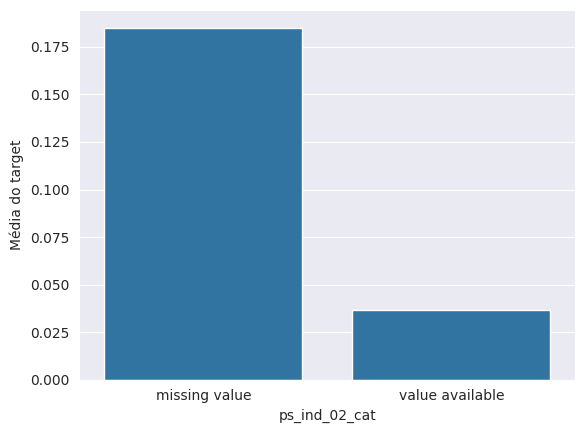

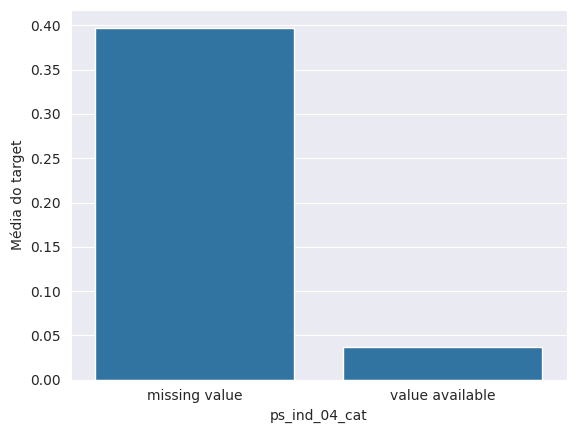

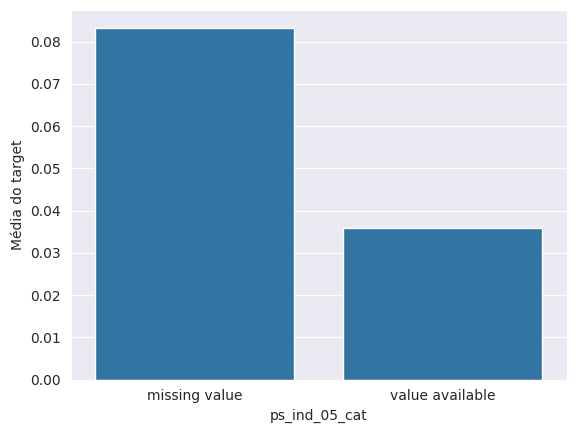

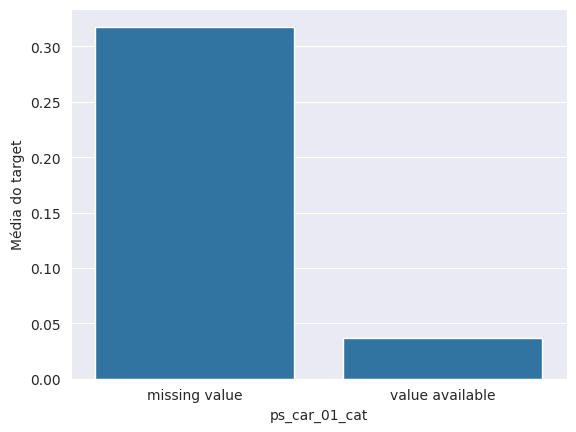

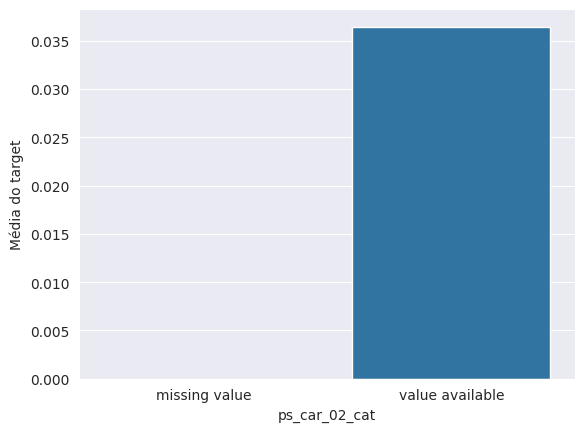

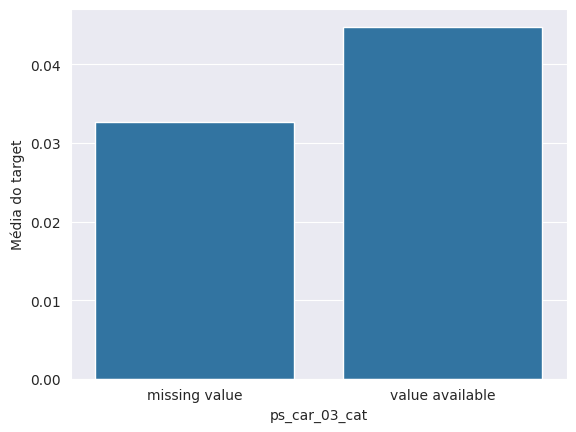

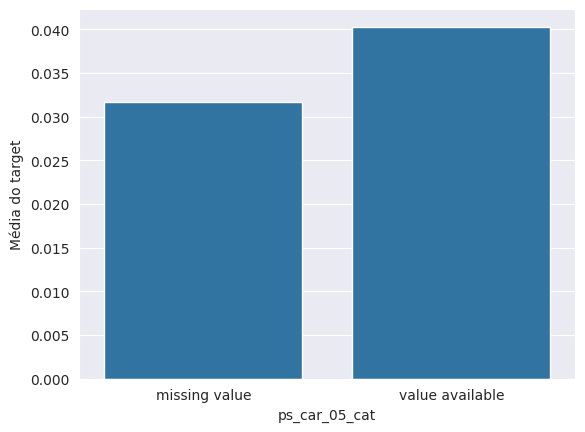

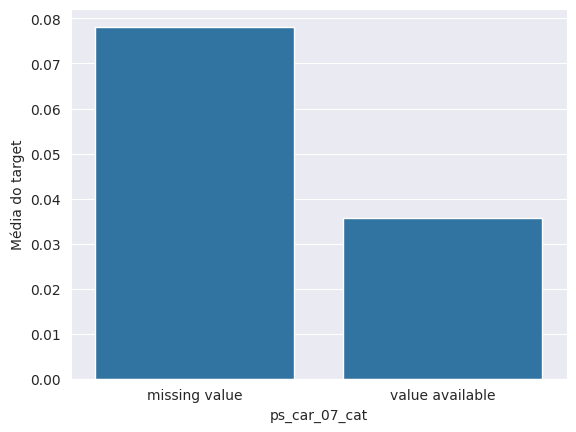

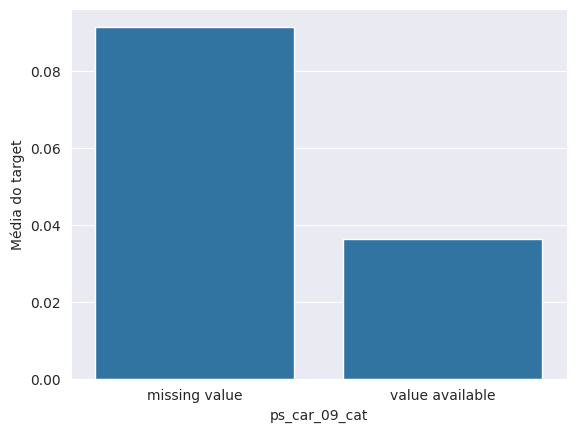

In [17]:
#Plotar gráficos das variáveis categóricas

for var in cat_var_with_na:
    plot_relacao_missing_target(train,var)

In [18]:
#Plotar gráfico das variáveis binárias
#nenhuma variável binária tem missing values
for var in bin_var_with_na:
    plot_relacao_missing_target(train,var)

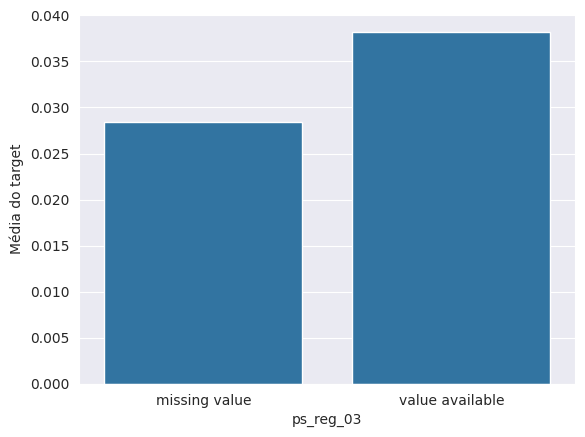

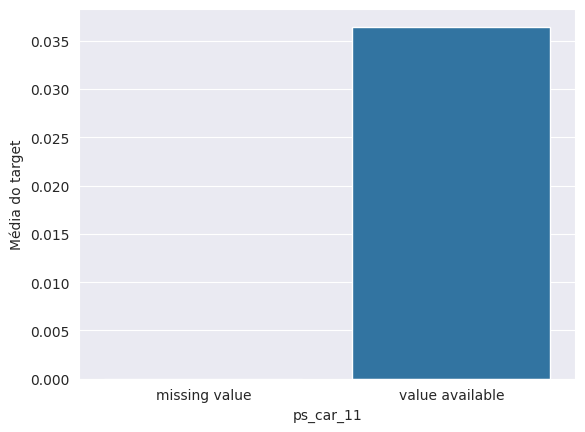

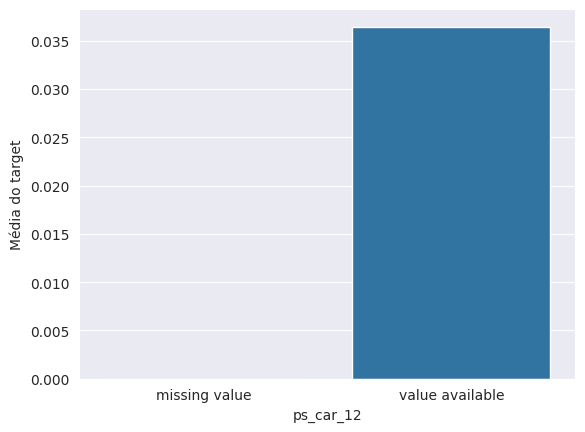

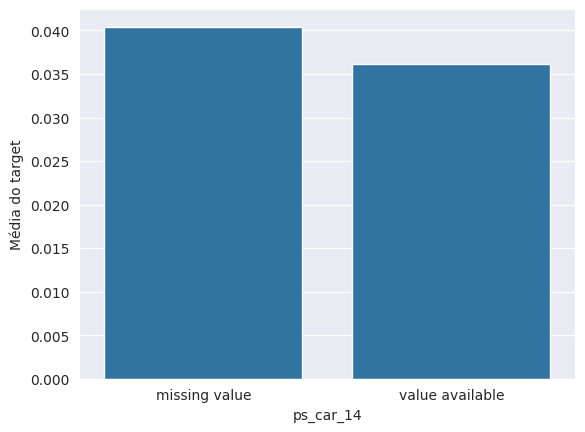

In [19]:
#Plotar gráfico das variáveis numéricas
#nenhuma variável binária tem missing values
for var in num_var_with_na:
    plot_relacao_missing_target(train,var)

A média dos target values e diferente para os missing values de algumas das features, o que indica que os missing values podem conter informações importantes.

# Variáveis Numéricas

In [20]:
#Agumas são contínuas e outras são discreta
# A maior parte delas são discretas

train[num_var].nunique()

ps_ind_01         8
ps_ind_03        12
ps_ind_14         5
ps_ind_15        14
ps_reg_01        10
ps_reg_02        19
ps_reg_03      5012
ps_car_11         4
ps_car_12       183
ps_car_13     70482
ps_car_14       849
ps_car_15        15
ps_calc_01       10
ps_calc_02       10
ps_calc_03       10
ps_calc_04        6
ps_calc_05        7
ps_calc_06       11
ps_calc_07       10
ps_calc_08       11
ps_calc_09        8
ps_calc_10       26
ps_calc_11       20
ps_calc_12       11
ps_calc_13       14
ps_calc_14       24
dtype: int64

In [21]:
#Features com menos de 30 categorias serão consideradas discretas e as com mais de 30 categorias como continuas

threshold_numero_categorias=30

num_var_continuas=[var for var in num_var if train[var].nunique()>30]
num_var_discretas=[var for var in num_var if train[var].nunique()<=30]


In [22]:
num_var_continuas

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']

array([[<Axes: title={'center': 'ps_reg_03'}>,
        <Axes: title={'center': 'ps_car_12'}>],
       [<Axes: title={'center': 'ps_car_13'}>,
        <Axes: title={'center': 'ps_car_14'}>]], dtype=object)

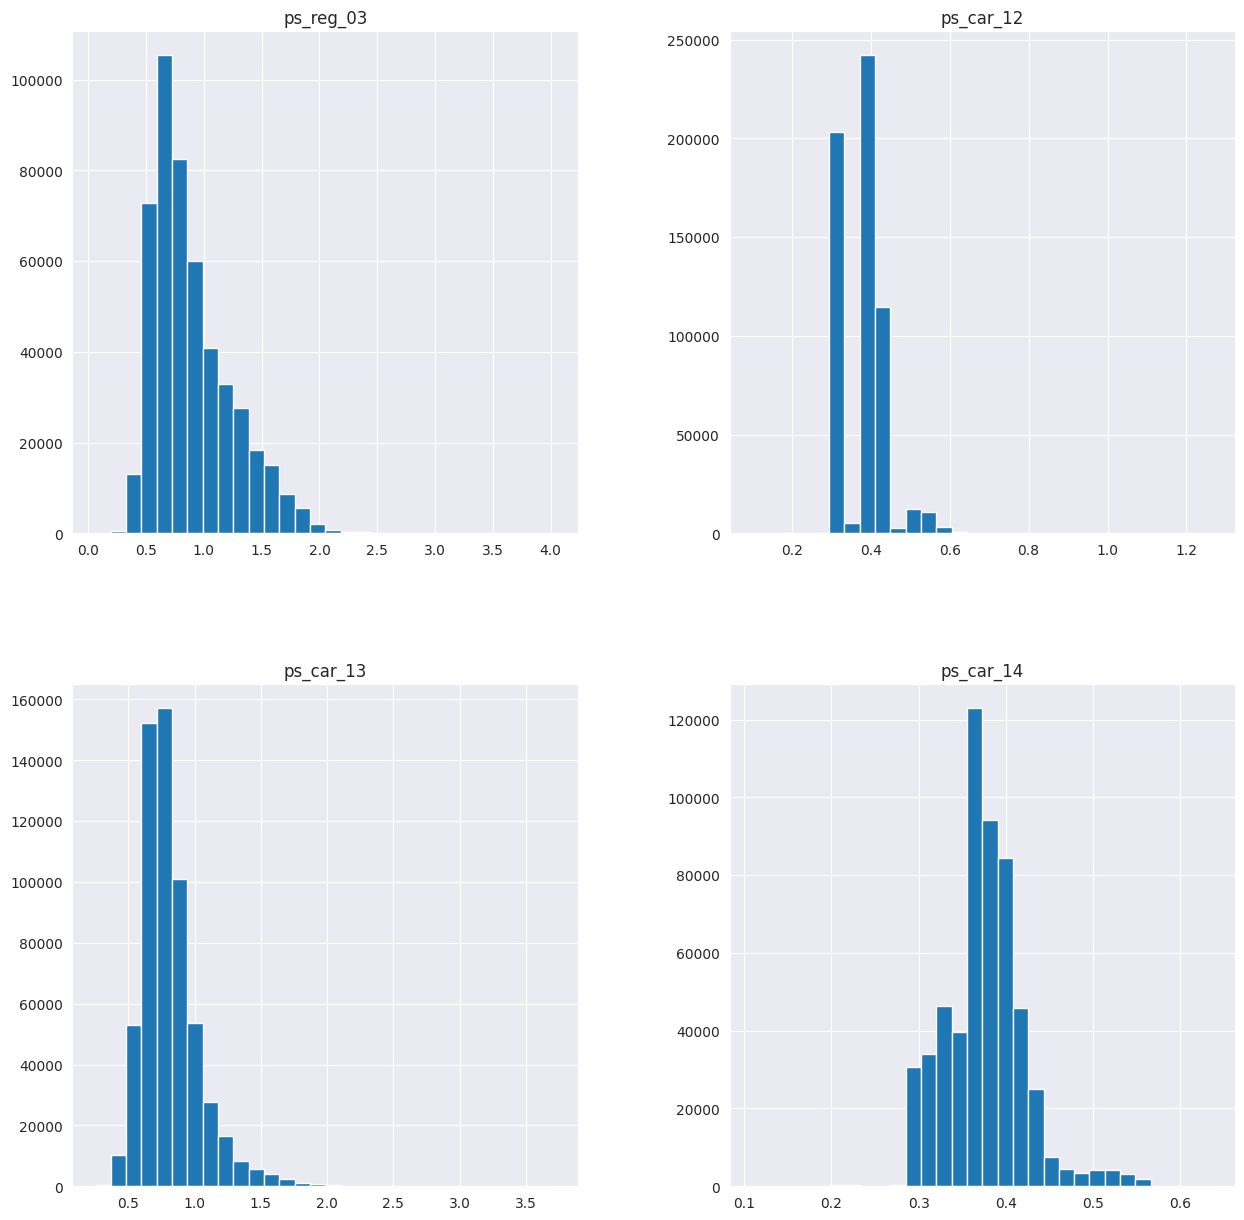

In [23]:
#plotar a distribuição das features numéricas contínuas
train[num_var_continuas].hist(bins=30,figsize=(15,15))

array([[<Axes: title={'center': 'ps_ind_01'}>,
        <Axes: title={'center': 'ps_ind_03'}>,
        <Axes: title={'center': 'ps_ind_14'}>,
        <Axes: title={'center': 'ps_ind_15'}>,
        <Axes: title={'center': 'ps_reg_01'}>],
       [<Axes: title={'center': 'ps_reg_02'}>,
        <Axes: title={'center': 'ps_car_11'}>,
        <Axes: title={'center': 'ps_car_15'}>,
        <Axes: title={'center': 'ps_calc_01'}>,
        <Axes: title={'center': 'ps_calc_02'}>],
       [<Axes: title={'center': 'ps_calc_03'}>,
        <Axes: title={'center': 'ps_calc_04'}>,
        <Axes: title={'center': 'ps_calc_05'}>,
        <Axes: title={'center': 'ps_calc_06'}>,
        <Axes: title={'center': 'ps_calc_07'}>],
       [<Axes: title={'center': 'ps_calc_08'}>,
        <Axes: title={'center': 'ps_calc_09'}>,
        <Axes: title={'center': 'ps_calc_10'}>,
        <Axes: title={'center': 'ps_calc_11'}>,
        <Axes: title={'center': 'ps_calc_12'}>],
       [<Axes: title={'center': 'ps_calc_13'

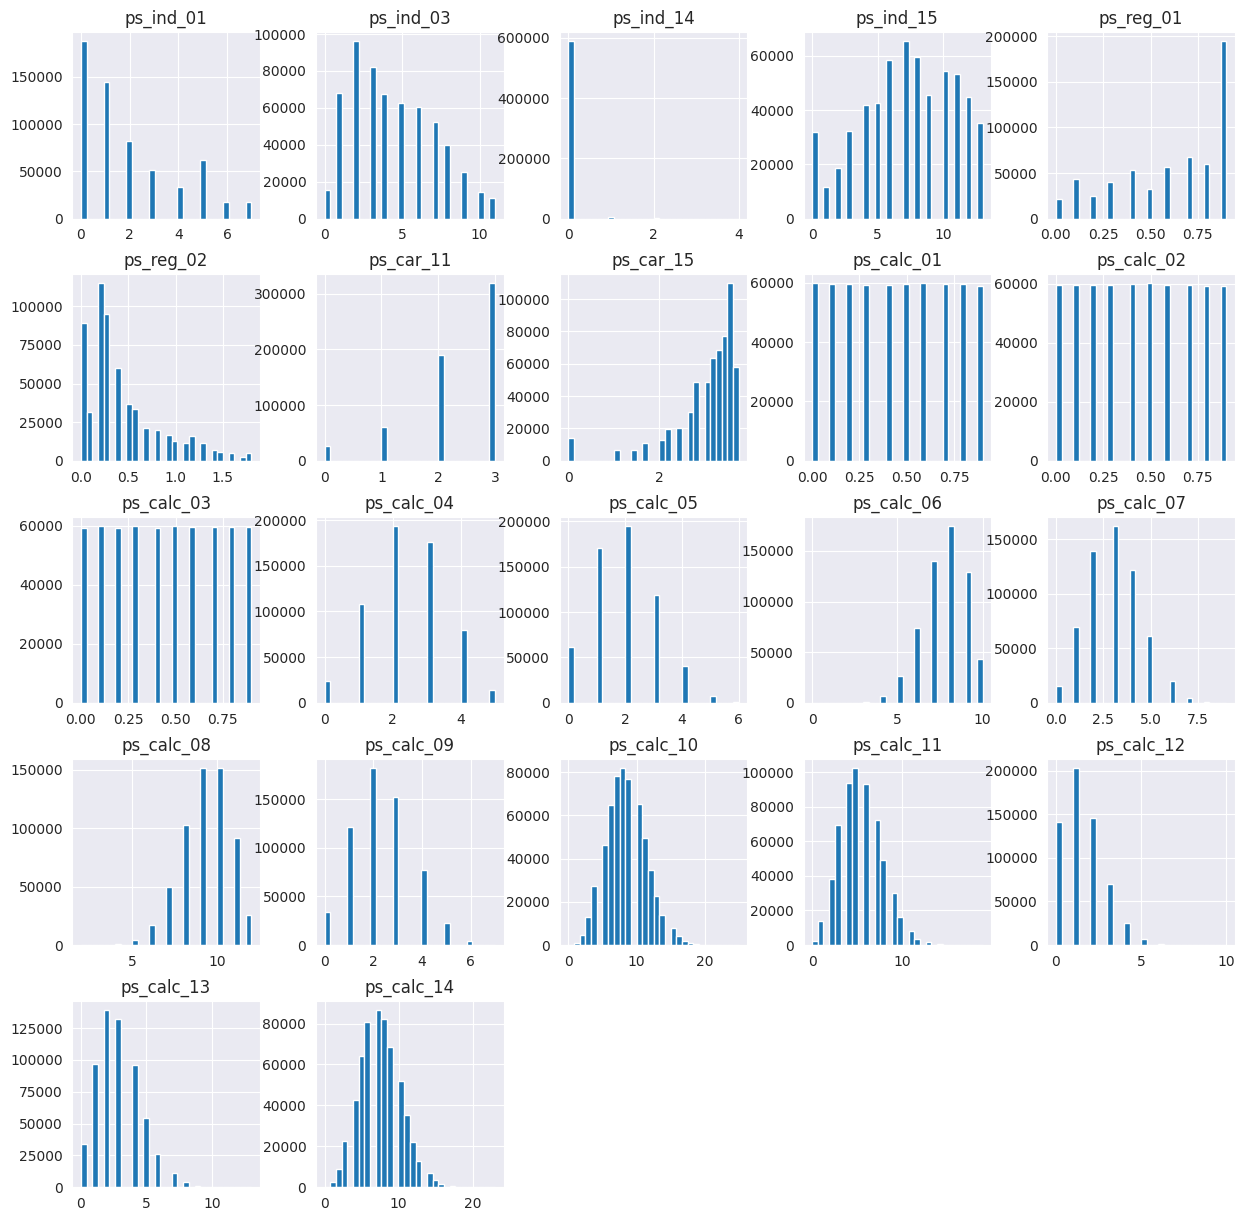

In [24]:
#plotar a distribuição das features numéricas discretas
train[num_var_discretas].hist(bins=30,figsize=(15,15))

## Variáveis Numéricas Contínuas

### Missing Values

In [25]:
#Número de missing values
train[num_var_continuas].isna().sum()

ps_reg_03    107772
ps_car_12         1
ps_car_13         0
ps_car_14     42620
dtype: int64

In [26]:
#Proporção de missing values
(train[num_var_continuas].isna().sum())/len(train)

ps_reg_03    0.181065
ps_car_12    0.000002
ps_car_13    0.000000
ps_car_14    0.071605
dtype: float64

In [27]:
#Substituir missing values 
train_num_var_cont=train[num_var_continuas].copy()
imputer=imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
train_num_var_cont=imputer.fit_transform(train_num_var_cont)


In [28]:
#Nenhum missing value
train_num_var_cont.isna().sum()

ps_reg_03    0
ps_car_12    0
ps_car_13    0
ps_car_14    0
dtype: int64

### Tranformações

Aplicação de transformações para aproximar a distribuição dos dados da normalidade. Muitas vezes a ocorrência de dados com distribuições inclinadas (skewd) em certa direção pode prejudicar o aprendizado dos modelos.

Variáveis numéricas contínuas

- ps_reg_03
- ps_car_12
- ps_car_13
- ps_car_14

Resumo após análise:

A transformação Yeo Jhonson será aplicada nas seguintes features:

- ps_car_13
- ps_reg_03

#### Transformação Logarítimica

In [29]:
#Aplicar transformação logaritmica aos dados numéricos continuos
#Os graficos mostram lado a lado cada variável numérica continua antes e depois da aplicação da transformação

def plot_original_transformed(data,features=None,tranformation='log'):
    '''
    Função para plotar lado a lado um histograma com os dados originais e os dados transformados. As transformações que pode
    ser aplicadas são logarítmica e Yeo Jhonson.

    inputs:
        data           - Panda dataframe com as features que serão transformadas e plotadas
        features       - (list) lista com as features que serão transformadas
        transformation - (str) Dois possíveis valores: yeo ou log. Se log será aplicada a transformação logaritmica e se yeo será aplicada a 
                               transformação de Yeo Jhonson
    '''
    if features is None:
        features=data.columns
    
    if tranformation not in ['log','yeo']:
        raise Exception('Tranfomação desconhecida. Escolha log para transformação logaritmica ou yeo para transformaçao de Yeo Jhonson')
    n_cols=2
    n_rows=len(features)
    fig, axs= plt.subplots(n_rows,n_cols,figsize=(15,15))
    for i in range(len(features)):
        sns.histplot(data[features[i]],ax=axs[i,0])
        if tranformation=='log':
            sns.histplot(np.log(data[features[i]]),ax=axs[i,1])
        if tranformation=='yeo':
            pt=PowerTransformer()
            sns.histplot(pt.fit_transform(data[[features[i]]]),ax=axs[i,1])
        axs[i,0].set_xlabel(features[i]+' original')
        axs[i,1].set_xlabel(features[i]+' transformed')



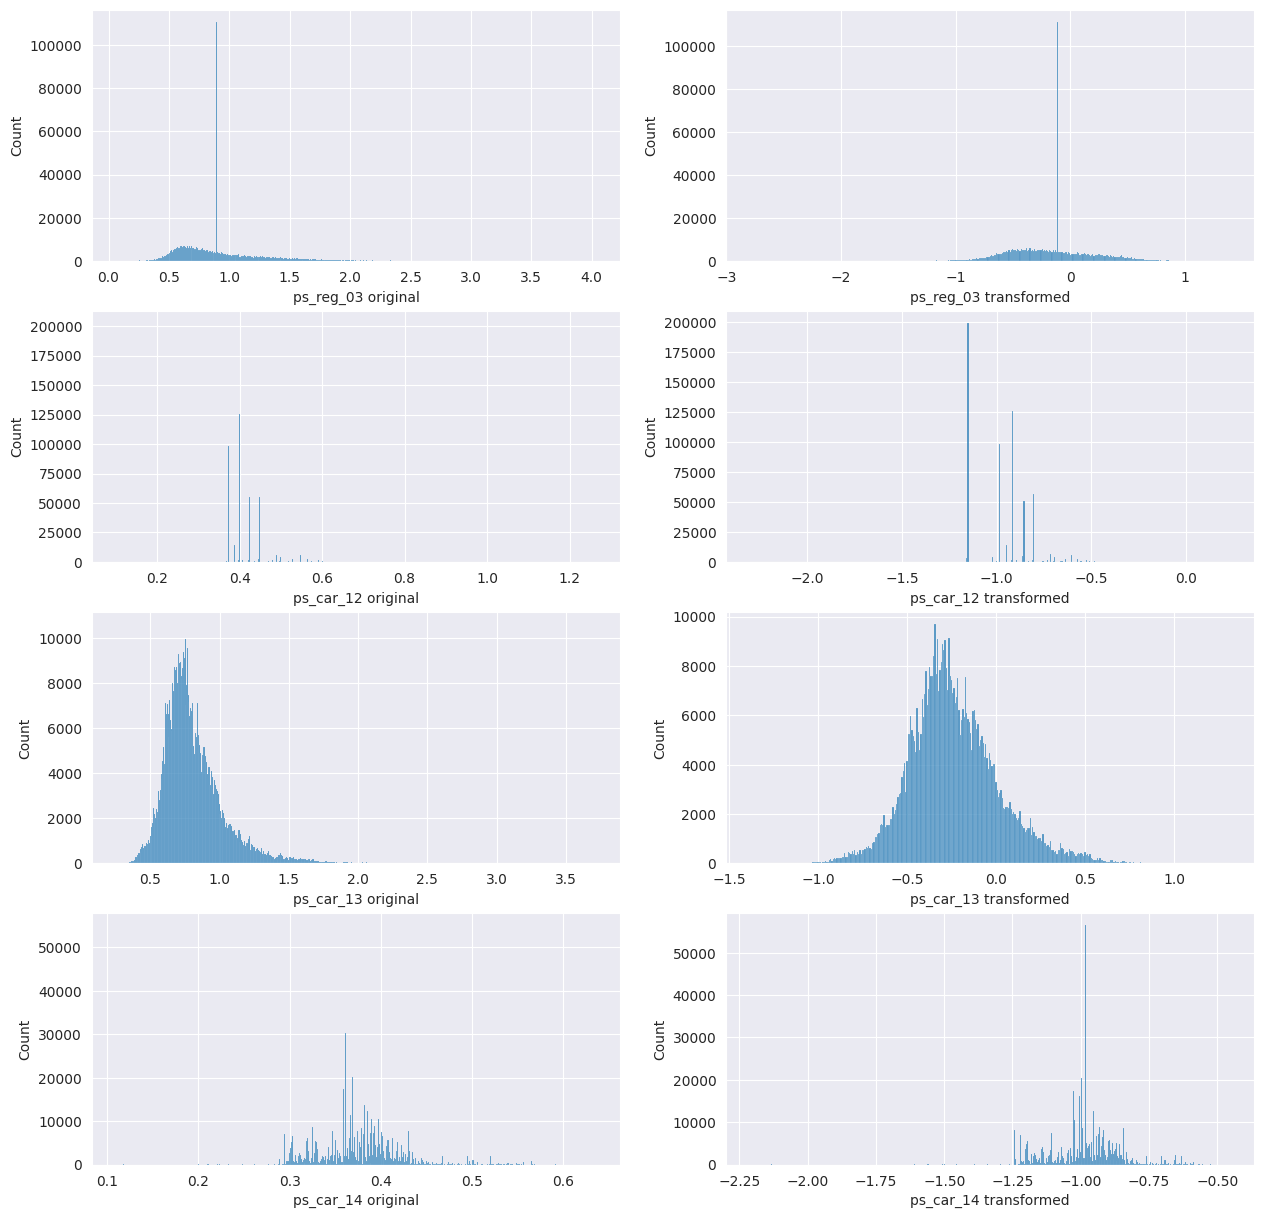

In [30]:
plot_original_transformed(train_num_var_cont,features=num_var_continuas)


A aplicação da tranfomação logarítimica aparentemente melhorou a distribuição dos dados para a variável ps_car_13

#### Transformação Yeo Jhonson

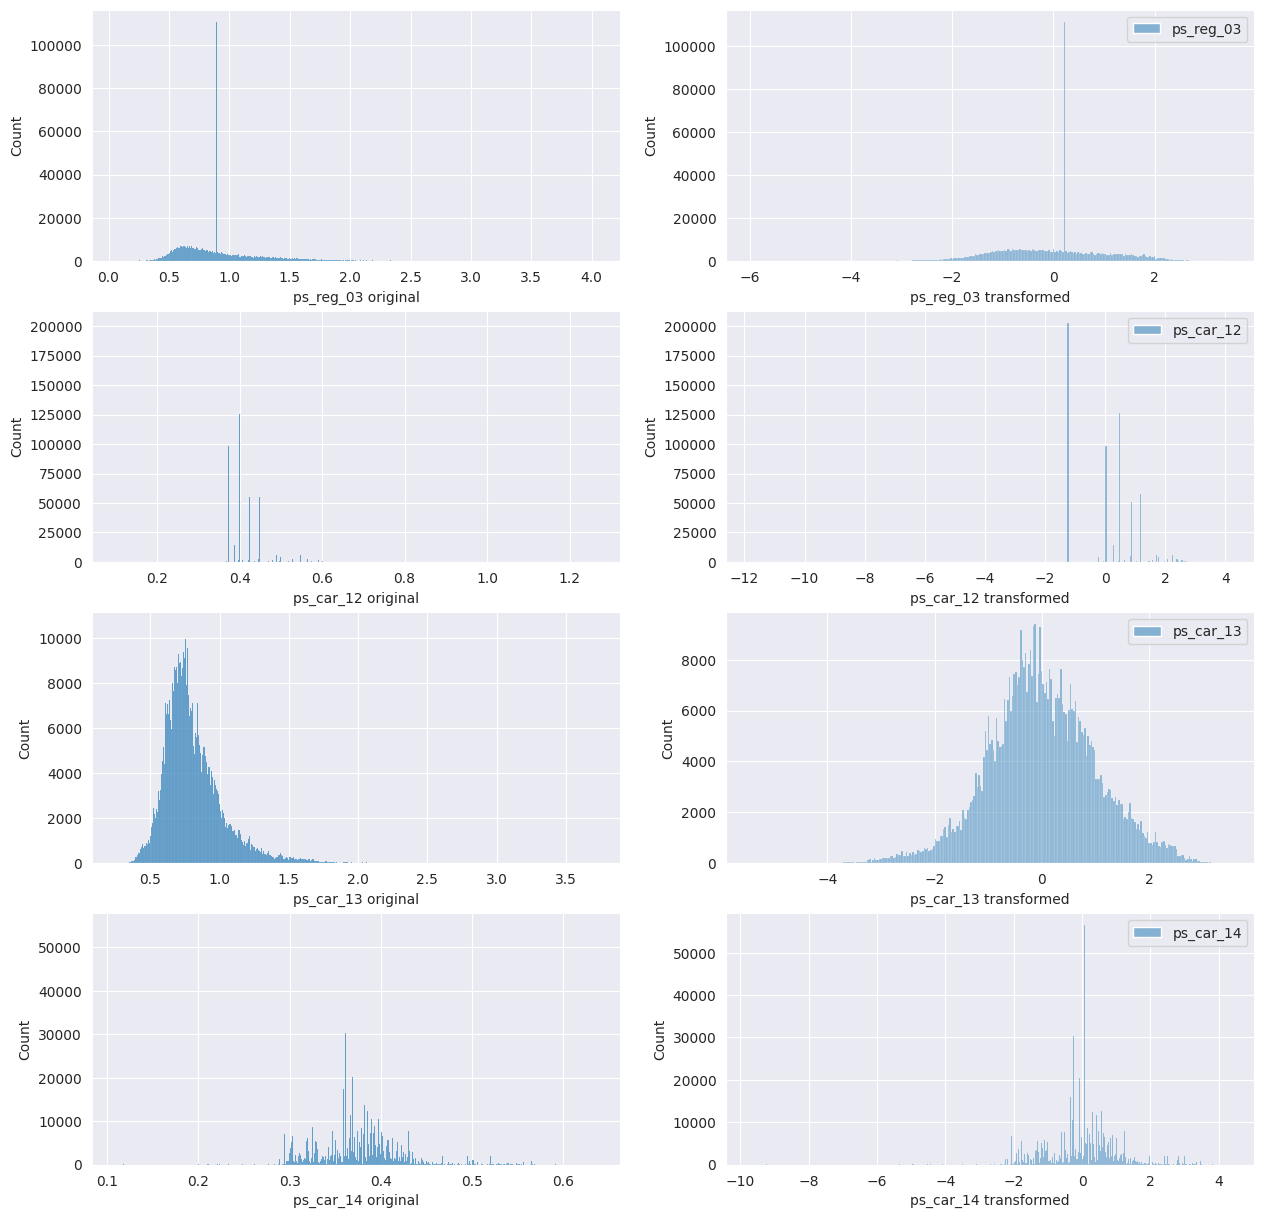

In [31]:
#Aplicar transformação Yeo-Jhonson aos dados numéricos continuos

plot_original_transformed(train_num_var_cont,features=num_var_continuas,tranformation='yeo')



A aplicação da transformação de Yeo_Jhonson aparentemente melhorou a distribuição de ps_reg_03 e ps_car_13

### Correlação

- Variáveis altamente correlacionadas podem ser redundantes;
- Variaveis correlacionadas com o output provavelmente são úteis para preve-lo.

#### Correlação entre as variáveis numéricas contínuas

Para interpretar os valores calculados para os coeficientes de correlação serão usados os seguintes limites:

- Muito forte        : entre 0.8 e 1
- Forte              : entre 0.6 e 0.8
- Moderada           : entre 0.4 e 0.6
- Fraca              : entre 0.2 e 0.4
- Muito fraca        : entre 0 e 0.2
- Nenhuma correlação : 0

In [32]:
train_num_var_cont.corr()

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14
ps_reg_03,1.000000,0.204535,0.239819,0.077204
ps_car_12,0.204535,1.000000,0.672014,0.577472
ps_car_13,0.239819,0.672014,1.000000,0.434238
ps_car_14,0.077204,0.577472,0.434238,1.000000


- Correlação forte entre ps_car_12 e ps_car_13;
- Correlação moderada entre ps_car_12 e ps_car_14;
- Correlação moderada entre ps_car_13 e ps_car_14

#### Correlação entre variáveis numéricas contínuas e o output binário

##### Point Biserial Correlation Coefficient

In [33]:
#Calcular a correlação entre cada variável numérica e o output

def calcular_corr_ponto_bisserial(dados,features=None,y=train['target']):
    '''
    Função para cacular a correlação entre variáveis numéricas e e o output binário

    inputs
        dados    - Pandas dataframe com as features numéricas
        features - (list) Lista com features numéricas. Se não for passado serão usadas todas as features em dados
        y        - Pandas dataframe com um feature binária

    output
        coeff_df  - Pandas dataframe com duas colunas. Coluna corr com o coeficente de correlção calculado entre a feature e o output binário e 
                    colunas p_value para indicar se a correlação calculada tem significância estatistica (hipótese nula é que não existe correlação)   
    '''
    if features is None:
        features=dados.columns
    corr_df={'feature':[],'corr':[],'p_value':[]}
    for coluna in features:
        coef,p=stats.pointbiserialr(dados[coluna],y)
        corr_df['feature'].append(coluna)
        corr_df['corr'].append(coef)
        corr_df['p_value'].append(p)
    corr_df=pd.DataFrame.from_dict(corr_df)
    return corr_df



In [34]:
#A correlação entre o target e cada variável numérica contínua é pequena. Porém os p-values indicam que a correlação existe
corr_num_cont_out=calcular_corr_ponto_bisserial(train_num_var_cont)
corr_num_cont_out

,feature,corr,p_value
0,ps_reg_03,0.031258,1.503582e-128
1,ps_car_12,0.038800,5.009406e-197
2,ps_car_13,0.053899,0.000000e+00
3,ps_car_14,0.011203,5.467304e-18


##### T-test

Aplicação de teste t para testar se as médias das variáveis numéricas contínuas são agrupadas em dois grupos: o primeiro com cliente que solicitaram seguro e o segundo com clientes que não solicitaram.

In [35]:
train_num_var_cont=pd.concat([train_num_var_cont,train['target']],axis=1)
train_num_var_cont.head()

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,target
0,0.718070,0.400000,0.883679,0.370810,0
1,0.766078,0.316228,0.618817,0.388716,0
2,0.894047,0.316228,0.641586,0.347275,0
3,0.580948,0.374166,0.542949,0.294958,0
4,0.840759,0.316070,0.565832,0.365103,0


In [36]:
#média e desvio padrão das variáveis numéricas contínuas agrupadas de acordo com o target
train_num_var_cont.groupby(by='target').agg(['mean','std'])

ps_reg_03           ps_car_12           ps_car_13           ps_car_14  \
            mean       std      mean       std      mean       std      mean   
target                                                                         
0       0.892147  0.311467  0.379507  0.058049  0.810910  0.222710  0.374595   
1       0.944284  0.336871  0.391578  0.063481  0.875505  0.261968  0.377222   

                  
             std  
target            
0       0.043772  
1       0.048264

In [37]:
#Para o calculo do t-test vai será considerado que as variâncias são iguais

t_test={'feature':[],'p_value':[]}

for feature in num_var_continuas:
    a=train_num_var_cont.loc[train_num_var_cont['target']==1,feature]	
    b=train_num_var_cont.loc[train_num_var_cont['target']==0,feature]	
    t_test['feature'].append(feature)
    t_test['p_value'].append(ttest_ind(a,b)[1])
t_test=pd.DataFrame.from_dict(t_test)
t_test

#De acordo com os p-values encontrados as médias não são iguais.
#Por exemplo, considerando a feature ps_reg_03. A média dessa feature entre os clientes que solicitaram o seguro é diferente da média para os clientes 
#que não solicitam. Portanto ela pode usada para predizer se um cliente solicitará ou não o seguro

,feature,p_value
0,ps_reg_03,1.503582e-128
1,ps_car_12,5.009406e-197
2,ps_car_13,0.000000e+00
3,ps_car_14,5.467304e-18


In [38]:
#remover a coluna target que foi adicionada anteriormente
train_num_var_cont.drop(columns='target',inplace=True)

## Variáveis Numéricas Discretas

### Missing Values

In [39]:
#Número de missing values
train[num_var_discretas].isna().sum()

ps_ind_01     0
ps_ind_03     0
ps_ind_14     0
ps_ind_15     0
ps_reg_01     0
ps_reg_02     0
ps_car_11     5
ps_car_15     0
ps_calc_01    0
ps_calc_02    0
ps_calc_03    0
ps_calc_04    0
ps_calc_05    0
ps_calc_06    0
ps_calc_07    0
ps_calc_08    0
ps_calc_09    0
ps_calc_10    0
ps_calc_11    0
ps_calc_12    0
ps_calc_13    0
ps_calc_14    0
dtype: int64

In [40]:
#Proporção de missing values
(train[num_var_discretas].isna().sum())/len(train)

ps_ind_01     0.000000
ps_ind_03     0.000000
ps_ind_14     0.000000
ps_ind_15     0.000000
ps_reg_01     0.000000
ps_reg_02     0.000000
ps_car_11     0.000008
ps_car_15     0.000000
ps_calc_01    0.000000
ps_calc_02    0.000000
ps_calc_03    0.000000
ps_calc_04    0.000000
ps_calc_05    0.000000
ps_calc_06    0.000000
ps_calc_07    0.000000
ps_calc_08    0.000000
ps_calc_09    0.000000
ps_calc_10    0.000000
ps_calc_11    0.000000
ps_calc_12    0.000000
ps_calc_13    0.000000
ps_calc_14    0.000000
dtype: float64

In [41]:
#Substituir missing values para calcular da correlação

train_num_var_disc=train[num_var_discretas].copy()
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train_num_var_disc=imputer.fit_transform(train_num_var_disc)


In [42]:
#Nenhum missing value
train_num_var_disc.isna().sum()

ps_ind_01     0
ps_ind_03     0
ps_ind_14     0
ps_ind_15     0
ps_reg_01     0
ps_reg_02     0
ps_car_11     0
ps_car_15     0
ps_calc_01    0
ps_calc_02    0
ps_calc_03    0
ps_calc_04    0
ps_calc_05    0
ps_calc_06    0
ps_calc_07    0
ps_calc_08    0
ps_calc_09    0
ps_calc_10    0
ps_calc_11    0
ps_calc_12    0
ps_calc_13    0
ps_calc_14    0
dtype: int64

### Transformações

A transformação de Yeo Jhonson será aplicada para tentar melhorar a distribuição dos dados. A transformação logaritmica não será aplicada porque os dados tem valores nulos. A transformação serã aplicada em duas das variáveis, são elas:

- ps_car_15
- ps_reg_02

In [43]:
num_var_discretas_transformar=['ps_car_15','ps_reg_02']

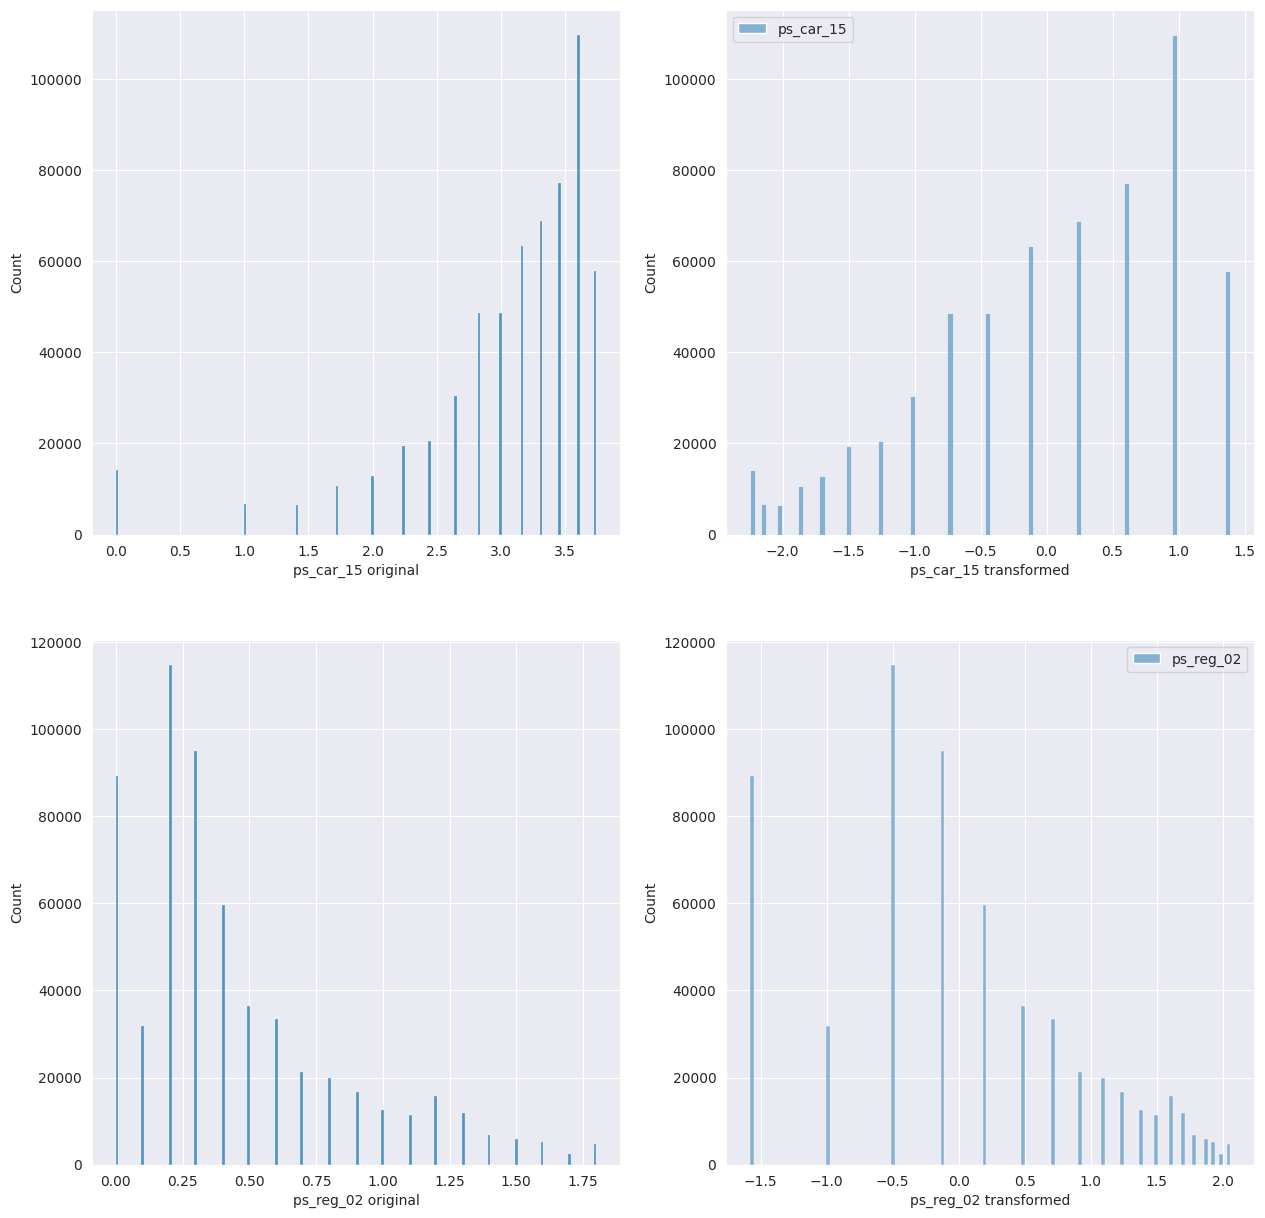

In [44]:
plot_original_transformed(train_num_var_disc,features=num_var_discretas_transformar,tranformation='yeo')

A transformação de Yeo Jhonson aparentemente melhorou a distribuição das duas variáveis numéricas discretas.

### Correlação

- Variáveis altamente correlacionadas podem ser redundantes;
- Variaveis correlacionadas com o output provavelmente são úteis para preve-lo.

#### Correlação entre as variáveis numéricas discretas

##### Spearman’s Rank Correlation Coefficient

Para interpretar os valores calculados para os coeficientes de correlação serão usados os seguintes limites:

- Muito forte        : entre 0.8 e 1
- Forte              : entre 0.6 e 0.8
- Moderada           : entre 0.4 e 0.6
- Fraca              : entre 0.2 e 0.4
- Muito fraca        : entre 0 e 0.2
- Nenhuma correlação : 0

In [45]:
#Calcular a correlação
corr_spearman=train_num_var_disc.corr(method='spearman')


In [46]:
fig = px.imshow(corr_spearman)
fig.show()

In [47]:
#A correlação  mais alta ocorre entre ps_reg_01 e ps_reg_02. A correlação entre as duas pode ser considerada moderada.
#Nenhuma das variáveis tem correlação positiva alta
corr_spearman.where(corr_spearman!=1,0).max()


ps_ind_01     0.206180
ps_ind_03     0.206180
ps_ind_14     0.016130
ps_ind_15     0.163889
ps_reg_01     0.537269
ps_reg_02     0.537269
ps_car_11     0.066333
ps_car_15     0.052734
ps_calc_01    0.002876
ps_calc_02    0.002949
ps_calc_03    0.002949
ps_calc_04    0.002876
ps_calc_05    0.002707
ps_calc_06    0.002685
ps_calc_07    0.002325
ps_calc_08    0.004105
ps_calc_09    0.001545
ps_calc_10    0.002607
ps_calc_11    0.002750
ps_calc_12    0.002607
ps_calc_13    0.002750
ps_calc_14    0.002242
dtype: float64

In [48]:
#Nenhuma das variáveis tem correlação negativa alta

corr_spearman.where(corr_spearman!=1,0).min()

ps_ind_01    -0.102031
ps_ind_03    -0.065286
ps_ind_14    -0.110297
ps_ind_15    -0.110297
ps_reg_01    -0.058662
ps_reg_02    -0.002294
ps_car_11    -0.065286
ps_car_15    -0.102031
ps_calc_01   -0.002416
ps_calc_02   -0.002416
ps_calc_03   -0.001639
ps_calc_04   -0.002464
ps_calc_05   -0.002275
ps_calc_06   -0.002464
ps_calc_07   -0.002275
ps_calc_08   -0.003057
ps_calc_09   -0.001800
ps_calc_10   -0.003057
ps_calc_11   -0.002332
ps_calc_12   -0.002324
ps_calc_13   -0.002624
ps_calc_14   -0.001999
dtype: float64

#### Correlação entre as variáveis numéricas discretas e o output

##### Point Biserial Correlation Coefficient

In [69]:
#Calculo da correlação das features com output
corr_num_disc_out=calcular_corr_ponto_bisserial(train_num_var_disc)
corr_num_disc_out

,feature,corr,p_value
0,ps_ind_01,0.018570,1.459427e-46
1,ps_ind_03,0.008360,1.122037e-10
2,ps_ind_14,0.007443,9.344864e-09
3,ps_ind_15,-0.021506,7.710477e-62
4,ps_reg_01,0.022888,8.463962e-70
5,ps_reg_02,0.034800,7.122481e-159
6,ps_car_11,-0.001221,3.460798e-01
7,ps_car_15,0.027667,3.954460e-101
8,ps_calc_01,0.001782,1.692009e-01
9,ps_calc_02,0.001360,2.941790e-01


In [70]:
#A correlação entra cada variável e o output é pequena
#Para algumas variáveis existe evidência para afirmar que não existe correlação (considerando alpha=5%). As variáveis que não tem correlação 
# tem valor False na coluna Correlated_or_not?

corr_num_disc_out['Correlated_or_not?']=corr_num_disc_out['p_value']<2.5/100
corr_num_disc_out

,feature,corr,p_value,Correlated_or_not?
0,ps_ind_01,0.018570,1.459427e-46,True
1,ps_ind_03,0.008360,1.122037e-10,True
2,ps_ind_14,0.007443,9.344864e-09,True
3,ps_ind_15,-0.021506,7.710477e-62,True
4,ps_reg_01,0.022888,8.463962e-70,True
5,ps_reg_02,0.034800,7.122481e-159,True
6,ps_car_11,-0.001221,3.460798e-01,False
7,ps_car_15,0.027667,3.954460e-101,True
8,ps_calc_01,0.001782,1.692009e-01,False
9,ps_calc_02,0.001360,2.941790e-01,False


##### X-squared Test

In [93]:
def teste_chi_quadrado(dados,features=None,y=train['target']):

    if features is None:
        features=dados.columns
    results={'feature':[],'chi2':[],'p':[],'dof':[]}
    for coluna in features:
        x=dados[coluna]
        contingency_table=pd.crosstab(x,y)
        chi2, p, dof, con_table = chi2_contingency(contingency_table)
        results['feature'].append(coluna)
        results['chi2'].append(chi2)
        results['p'].append(p)
        results['dof'].append(dof)
    results=pd.DataFrame.from_dict(results)
    return results



In [94]:
teste=teste_chi_quadrado(train_num_var_disc,features=num_var_discretas)

In [97]:
teste['correlated_or_not?']=teste['p']<2.5/100
teste

,feature,chi2,p,dof,correlated_or_not?
0,ps_ind_01,255.048796,2.332355e-51,7,True
1,ps_ind_03,660.122256,1.892496e-134,11,True
2,ps_ind_14,38.016092,1.112027e-07,4,True
3,ps_ind_15,334.553739,1.369891e-63,13,True
4,ps_reg_01,453.999931,4.002503e-92,9,True
5,ps_reg_02,906.076883,7.928386e-181,18,True
6,ps_car_11,255.655891,3.912781e-55,3,True
7,ps_car_15,591.589403,3.276969e-117,14,True
8,ps_calc_01,14.110901,1.184346e-01,9,False
9,ps_calc_02,10.272100,3.289097e-01,9,False


In [87]:
x

,ps_ind_01
0,2.0
1,1.0
2,5.0
3,0.0
4,0.0
...,...
595207,3.0
595208,5.0
595209,1.0
595210,5.0


In [ ]:
def agrupar_rare_label(dados,features=None,prop=0.01,value=-1):
    if features is None:
        features=dados.columns
    for coluna in features:
        x=(dados[coluna].value_counts())/len(dados)
        x=x[x<prop].index.to_list()
        
        if len(x)>1:
            print(coluna)
            dados[coluna]=dados[coluna].map(lambda z:z if z not in x else value)
    return dados
        

### Visualização das "features"

"Features de um mesmo grupo serão mostradas nas mesma figura"
Os grupos são 'ind','reg','car' e 'calc'.

#### Features do grupo ind

In [12]:
features_list=train.columns.to_list()

array([[<Axes: title={'center': 'ps_ind_01'}>,
        <Axes: title={'center': 'ps_ind_02_cat'}>,
        <Axes: title={'center': 'ps_ind_03'}>,
        <Axes: title={'center': 'ps_ind_04_cat'}>],
       [<Axes: title={'center': 'ps_ind_05_cat'}>,
        <Axes: title={'center': 'ps_ind_06_bin'}>,
        <Axes: title={'center': 'ps_ind_07_bin'}>,
        <Axes: title={'center': 'ps_ind_08_bin'}>],
       [<Axes: title={'center': 'ps_ind_09_bin'}>,
        <Axes: title={'center': 'ps_ind_10_bin'}>,
        <Axes: title={'center': 'ps_ind_11_bin'}>,
        <Axes: title={'center': 'ps_ind_12_bin'}>],
       [<Axes: title={'center': 'ps_ind_13_bin'}>,
        <Axes: title={'center': 'ps_ind_14'}>,
        <Axes: title={'center': 'ps_ind_15'}>,
        <Axes: title={'center': 'ps_ind_16_bin'}>],
       [<Axes: title={'center': 'ps_ind_17_bin'}>,
        <Axes: title={'center': 'ps_ind_18_bin'}>, <Axes: >, <Axes: >]],
      dtype=object)

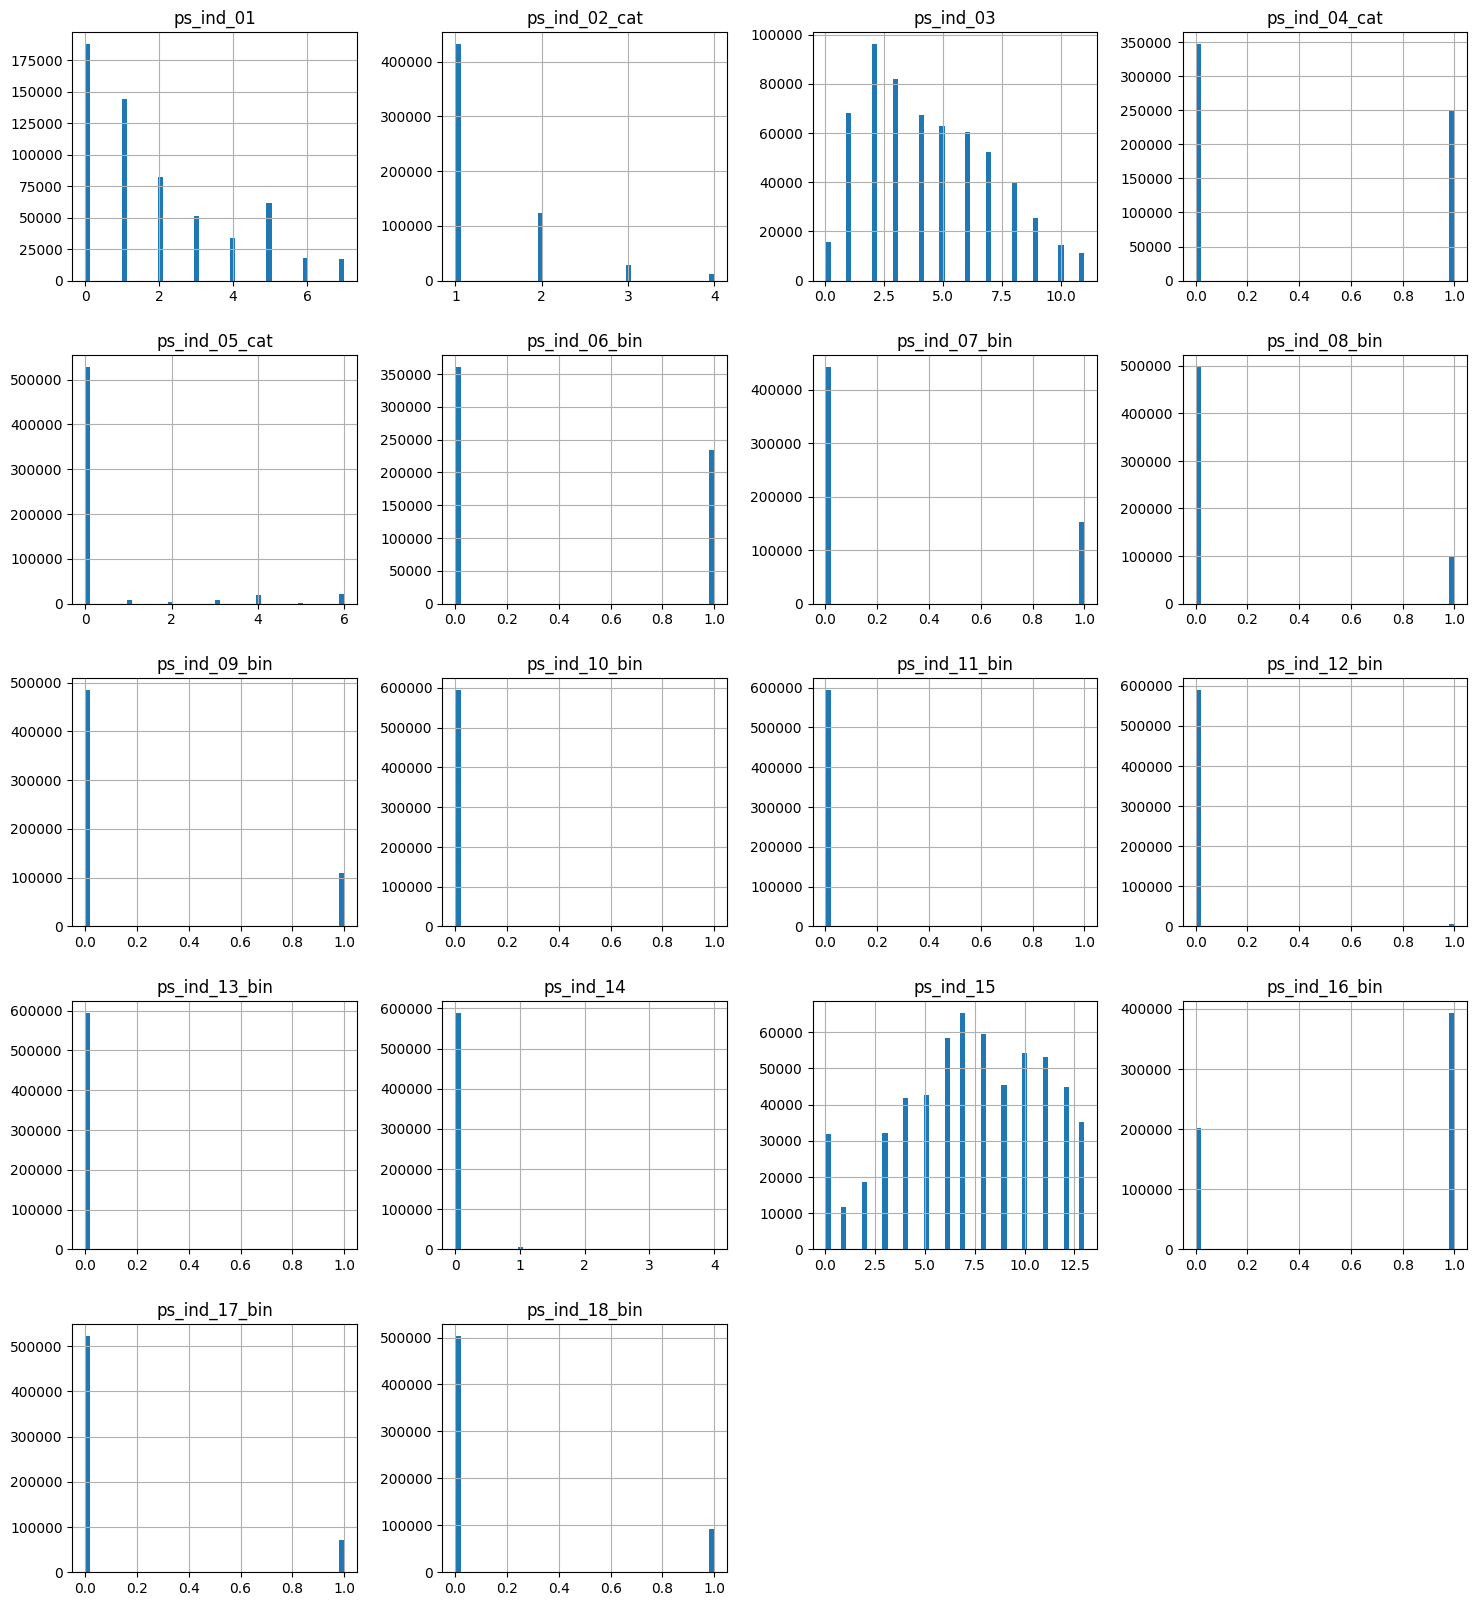

In [14]:
train[[i for i in features_list if 'ind' in i]].hist(bins=50,figsize=(18,20))

In [13]:
#Pela figura acima,apantemente três features (ps_ind_10_bin,ps_ind_11_bin e ps_ind_12_bin) tem a grande 
#maioria das amostras com um único valor.Por exemplo, para ps_ind_10_bin apenas 0,037298% das amostras tem 
#valor 1 e restante valor 0. Isso pode indicar que elas não tem informações relevantes para a classificação, 
#por esse motivo serão analisadas mais a fundo.

train[["ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin"]].mean()*100

ps_ind_10_bin    0.037298
ps_ind_11_bin    0.169183
ps_ind_12_bin    0.943865
dtype: float64

In [14]:
#Proporção entre as amostras das duas classes que tem o valor 1 para as "features"
#ps_ind_10_bin",ps_ind_11_bin" e ps_ind_12_bin
#Por exemplo, para a feature ps_ind_10_bin o valor 1 aparece em 0.0553% dos motoristas que abriram uma r
#reinvidicação de seguro e 0.0366% dentre os que não abriram. Essa diferença se repete nas três features,
# o que pode significar que elas tem informações relevantes para a classificação desejada.

train[["ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","target"]].groupby("target").mean()

,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin
target,,,
0,0.000366,0.001676,0.009292
1,0.000553,0.002120,0.013322


In [15]:
#Calcula da diferença percentual entre as duas classes para o número de amostras com valor 1 para as três
#features
#Por exemplo, considerando a "feature" ps_ind_10_bin a proporção de amostras com valor 1 para essa feature
#é aproximadamente 30% entre as amostras da classe 1 

delta_percentual=train[["ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","target"]].groupby("target").mean()
((delta_percentual.loc[1,:]-delta_percentual.loc[0,:])/delta_percentual.loc[1,:])*100

ps_ind_10_bin    33.804170
ps_ind_11_bin    20.976158
ps_ind_12_bin    30.250603
dtype: float64

<Axes: title={'center': 'ps_ind_12_bin'}, xlabel='target'>

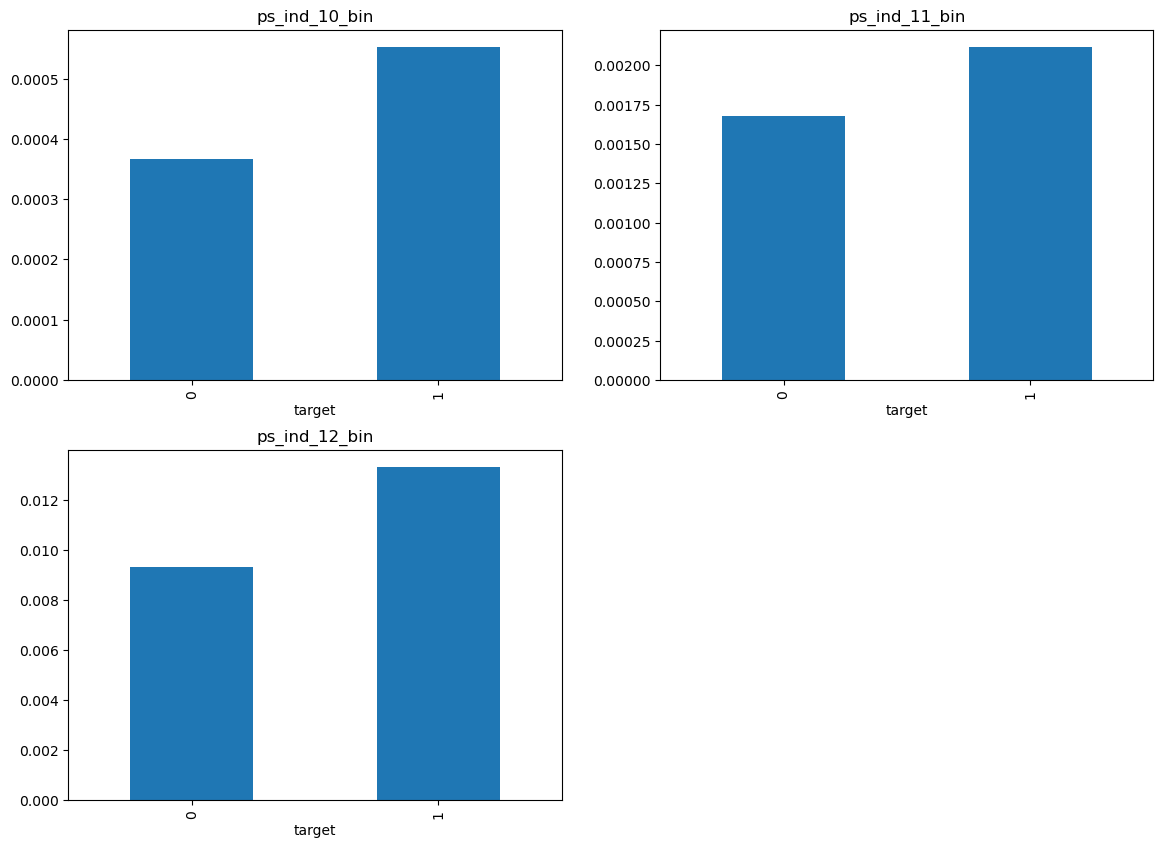

In [16]:
#Propoção entre amostras das duas classes com valor 1 para as três features analisadas 
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
bin_features_mean=train[["ps_ind_10_bin","ps_ind_11_bin","ps_ind_12_bin","target"]].groupby("target").mean()
bin_features_mean['ps_ind_10_bin'].plot(kind='bar',ax=ax1,title='ps_ind_10_bin')
bin_features_mean['ps_ind_11_bin'].plot(kind='bar',ax=ax2,title='ps_ind_11_bin')
bin_features_mean['ps_ind_12_bin'].plot(kind='bar',ax=ax3,title='ps_ind_12_bin')

#### Features do grupo reg

array([[<Axes: title={'center': 'ps_reg_01'}>,
        <Axes: title={'center': 'ps_reg_02'}>],
       [<Axes: title={'center': 'ps_reg_03'}>, <Axes: >]], dtype=object)

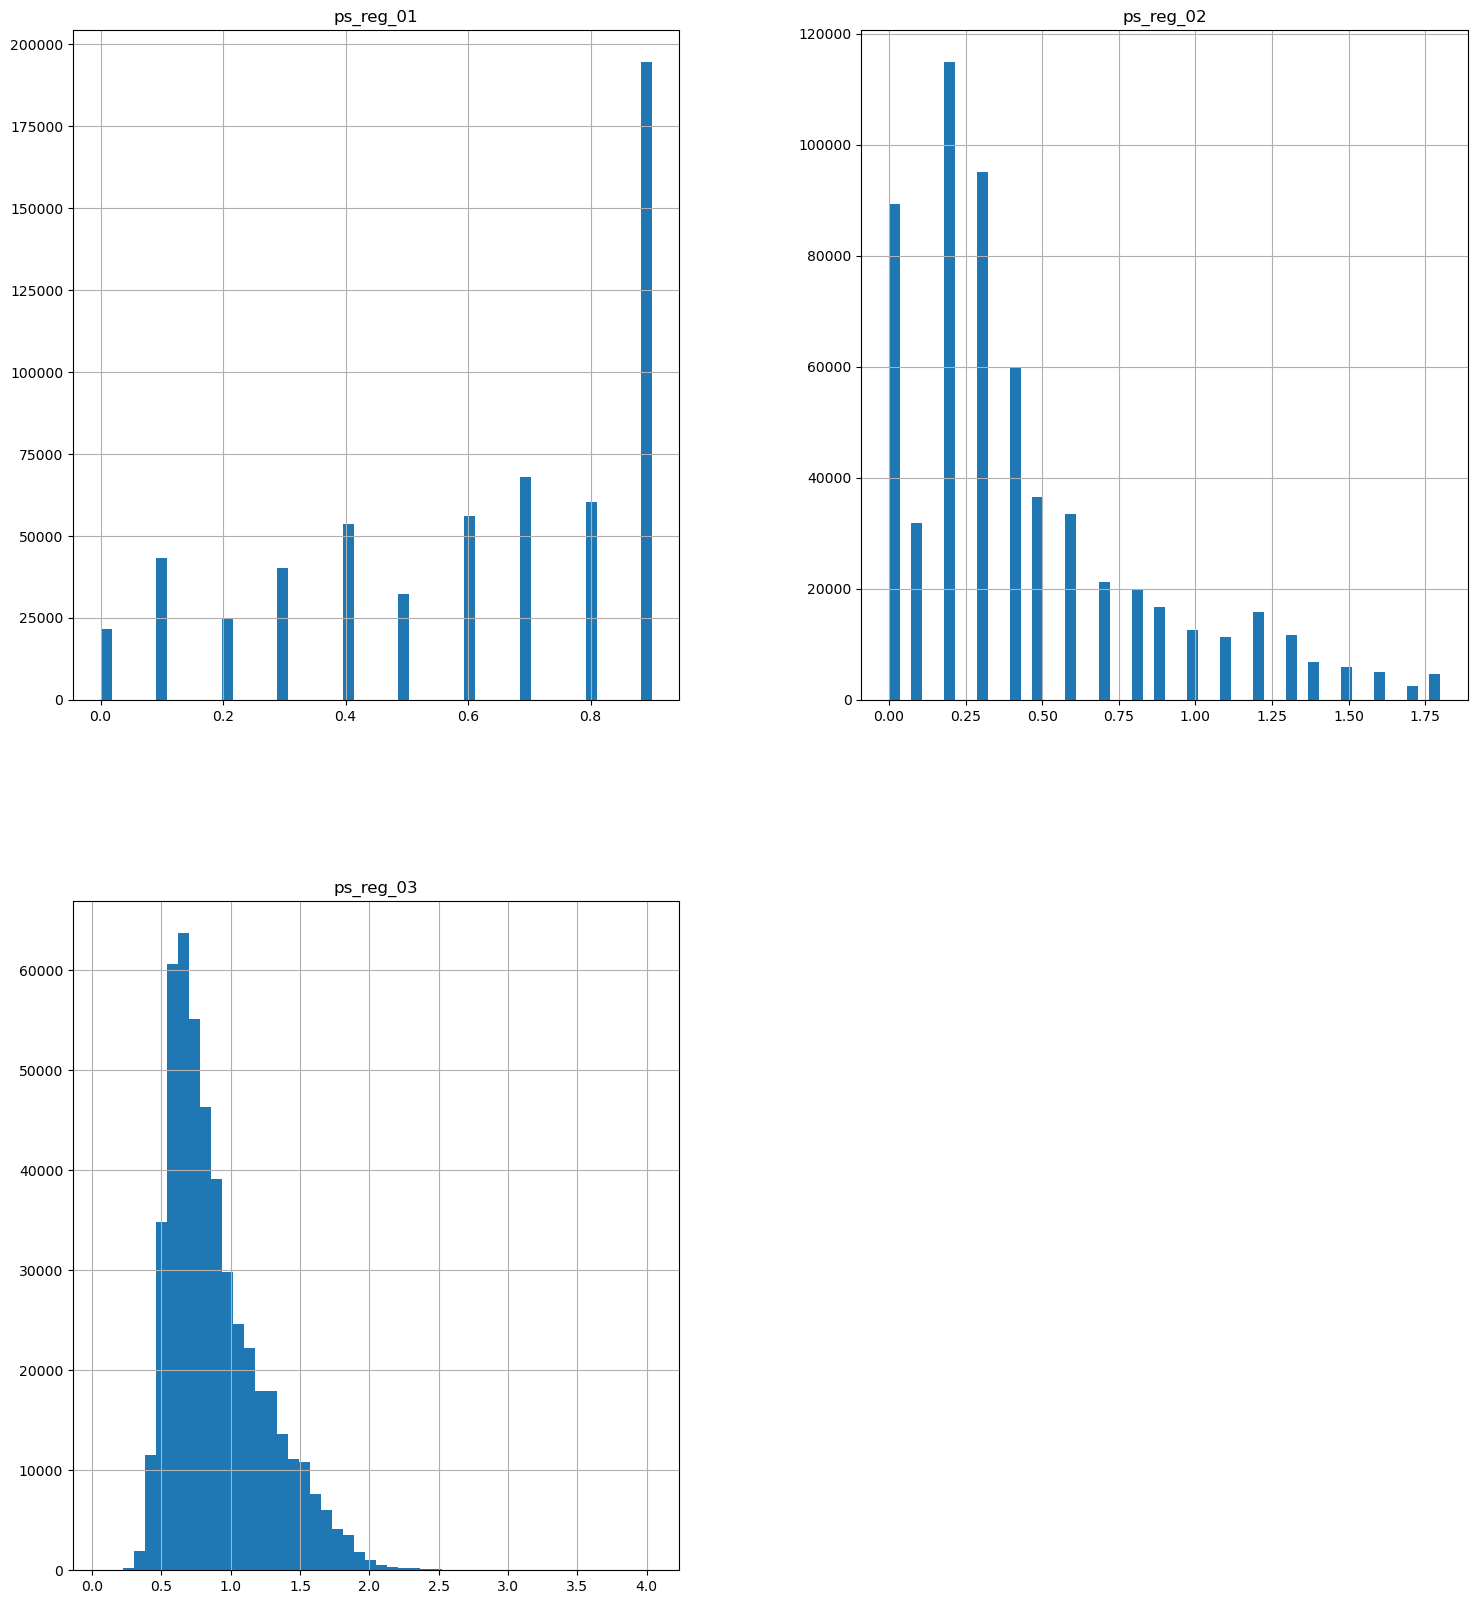

In [17]:
train[[i for i in features_list if 'reg' in i]].hist(bins=50,figsize=(18,20))

#### Features do grupo car

array([[<Axes: title={'center': 'ps_car_01_cat'}>,
        <Axes: title={'center': 'ps_car_02_cat'}>,
        <Axes: title={'center': 'ps_car_03_cat'}>,
        <Axes: title={'center': 'ps_car_04_cat'}>],
       [<Axes: title={'center': 'ps_car_05_cat'}>,
        <Axes: title={'center': 'ps_car_06_cat'}>,
        <Axes: title={'center': 'ps_car_07_cat'}>,
        <Axes: title={'center': 'ps_car_08_cat'}>],
       [<Axes: title={'center': 'ps_car_09_cat'}>,
        <Axes: title={'center': 'ps_car_10_cat'}>,
        <Axes: title={'center': 'ps_car_11_cat'}>,
        <Axes: title={'center': 'ps_car_11'}>],
       [<Axes: title={'center': 'ps_car_12'}>,
        <Axes: title={'center': 'ps_car_13'}>,
        <Axes: title={'center': 'ps_car_14'}>,
        <Axes: title={'center': 'ps_car_15'}>]], dtype=object)

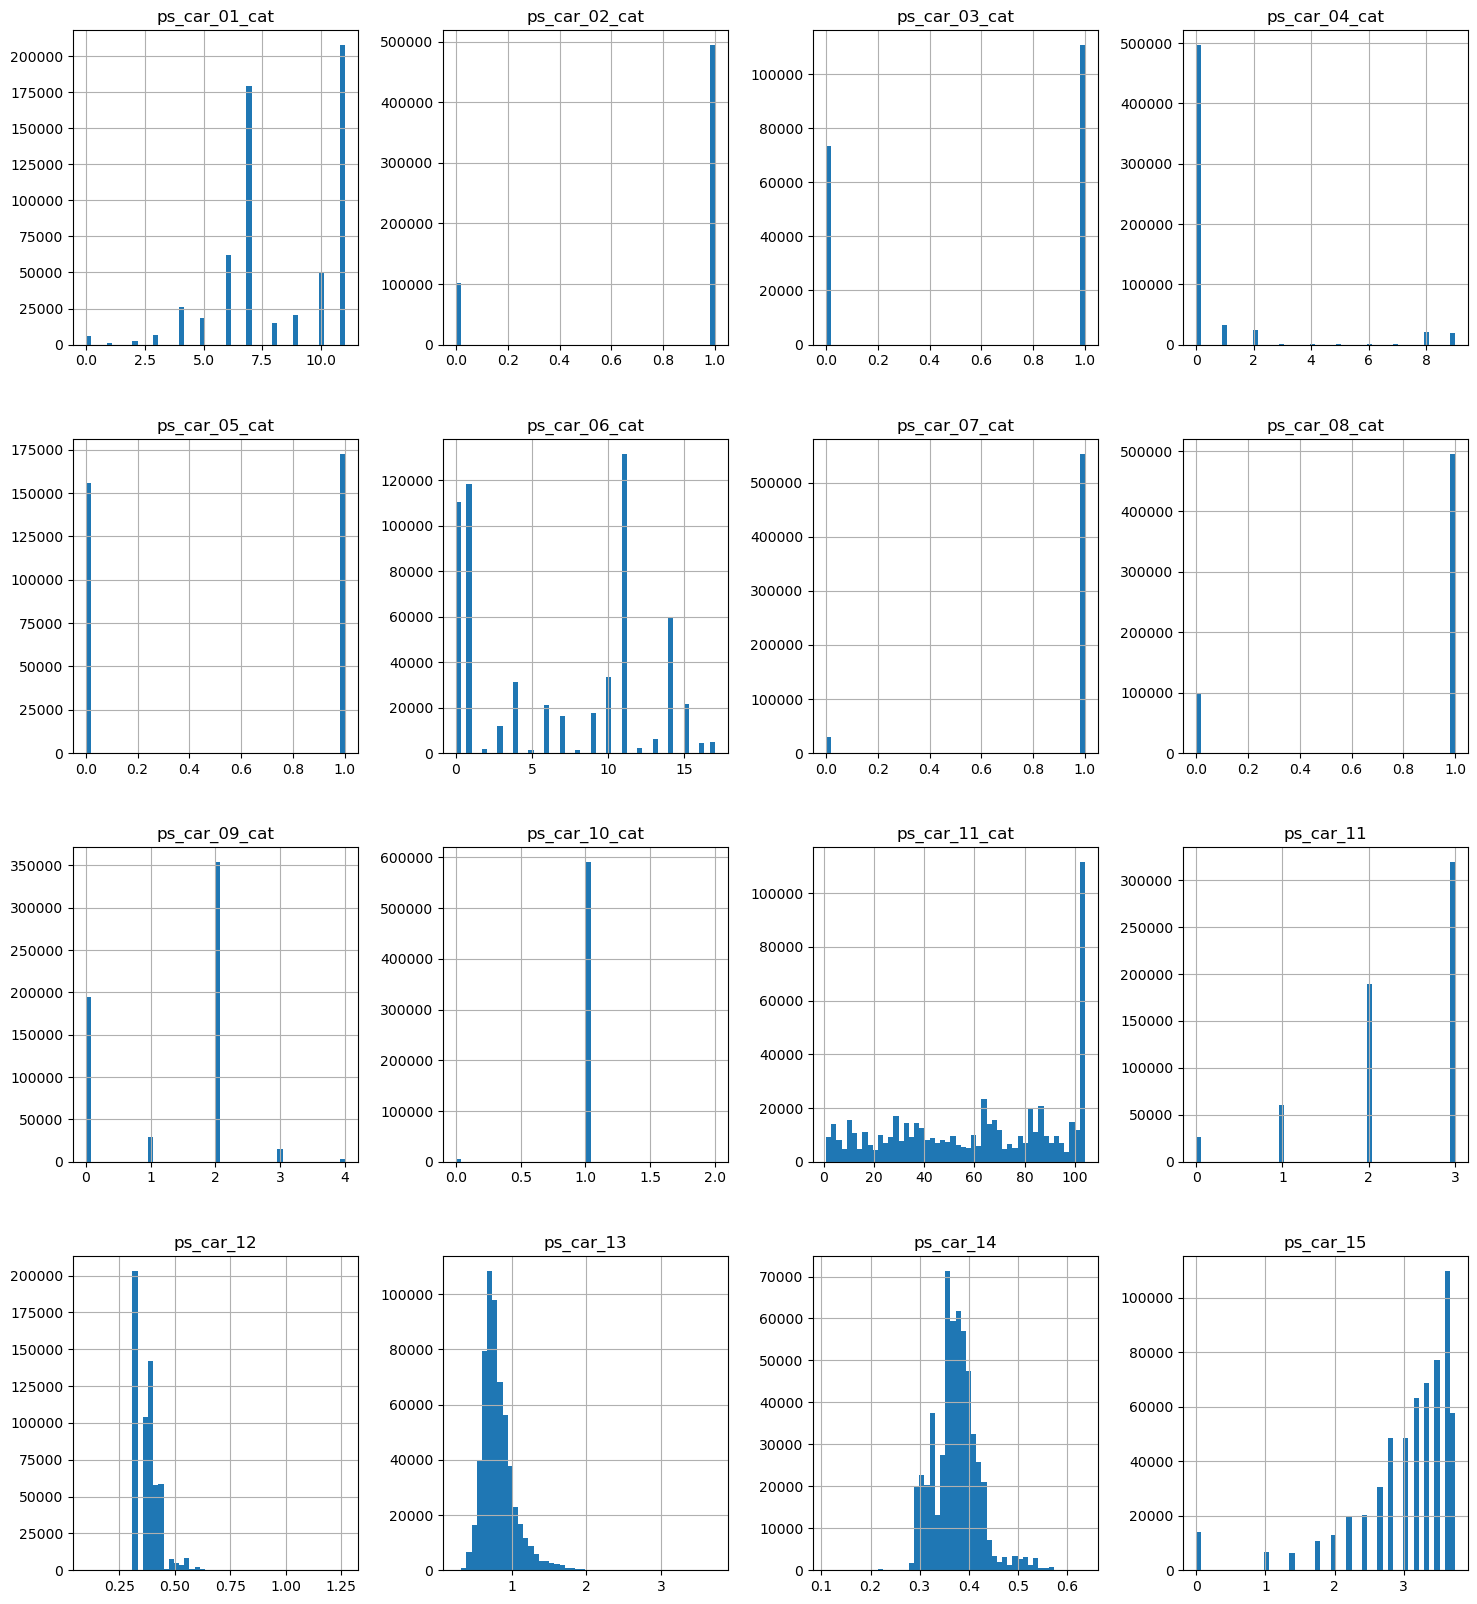

In [18]:
train[[i for i in features_list if 'car' in i]].hist(bins=50,figsize=(18,20))

In [19]:
#Algumas Features também tem uma grande proporção de amsotras com um único valor. São elas ps_car_07_cat, 
#ps_car_10_cat. Para a feature ps_car_10_cat 99,2136% das amostras tem o mesmo valor, por isso ela será 
#analisada com mais cuidado.

train [['ps_car_07_cat','ps_car_10_cat']].mean()

ps_car_07_cat    0.947621
ps_car_10_cat    0.992136
dtype: float64

In [20]:
#A proporção das amostras com valor 1 para a feature considerada parace ser semelhante para as duas classes.
train [['ps_car_07_cat','target']].groupby('target').mean()

,ps_car_07_cat
target,
0,0.948466
1,0.924745


In [21]:
#A diferença percentual é pequena. A proporção das amostras com valor unitário para a "feature" considerada
#é 2,565% maior entre  as amostras da classe 0
calculo_percentual=train [['ps_car_07_cat','target']].groupby('target').mean()
((calculo_percentual.loc[0]-calculo_percentual.loc[1])/calculo_percentual.loc[1])*100

ps_car_07_cat    2.565101
dtype: float64

#### Features do grupo calc

array([[<Axes: title={'center': 'ps_calc_01'}>,
        <Axes: title={'center': 'ps_calc_02'}>,
        <Axes: title={'center': 'ps_calc_03'}>,
        <Axes: title={'center': 'ps_calc_04'}>],
       [<Axes: title={'center': 'ps_calc_05'}>,
        <Axes: title={'center': 'ps_calc_06'}>,
        <Axes: title={'center': 'ps_calc_07'}>,
        <Axes: title={'center': 'ps_calc_08'}>],
       [<Axes: title={'center': 'ps_calc_09'}>,
        <Axes: title={'center': 'ps_calc_10'}>,
        <Axes: title={'center': 'ps_calc_11'}>,
        <Axes: title={'center': 'ps_calc_12'}>],
       [<Axes: title={'center': 'ps_calc_13'}>,
        <Axes: title={'center': 'ps_calc_14'}>,
        <Axes: title={'center': 'ps_calc_15_bin'}>,
        <Axes: title={'center': 'ps_calc_16_bin'}>],
       [<Axes: title={'center': 'ps_calc_17_bin'}>,
        <Axes: title={'center': 'ps_calc_18_bin'}>,
        <Axes: title={'center': 'ps_calc_19_bin'}>,
        <Axes: title={'center': 'ps_calc_20_bin'}>]], dtype=obje

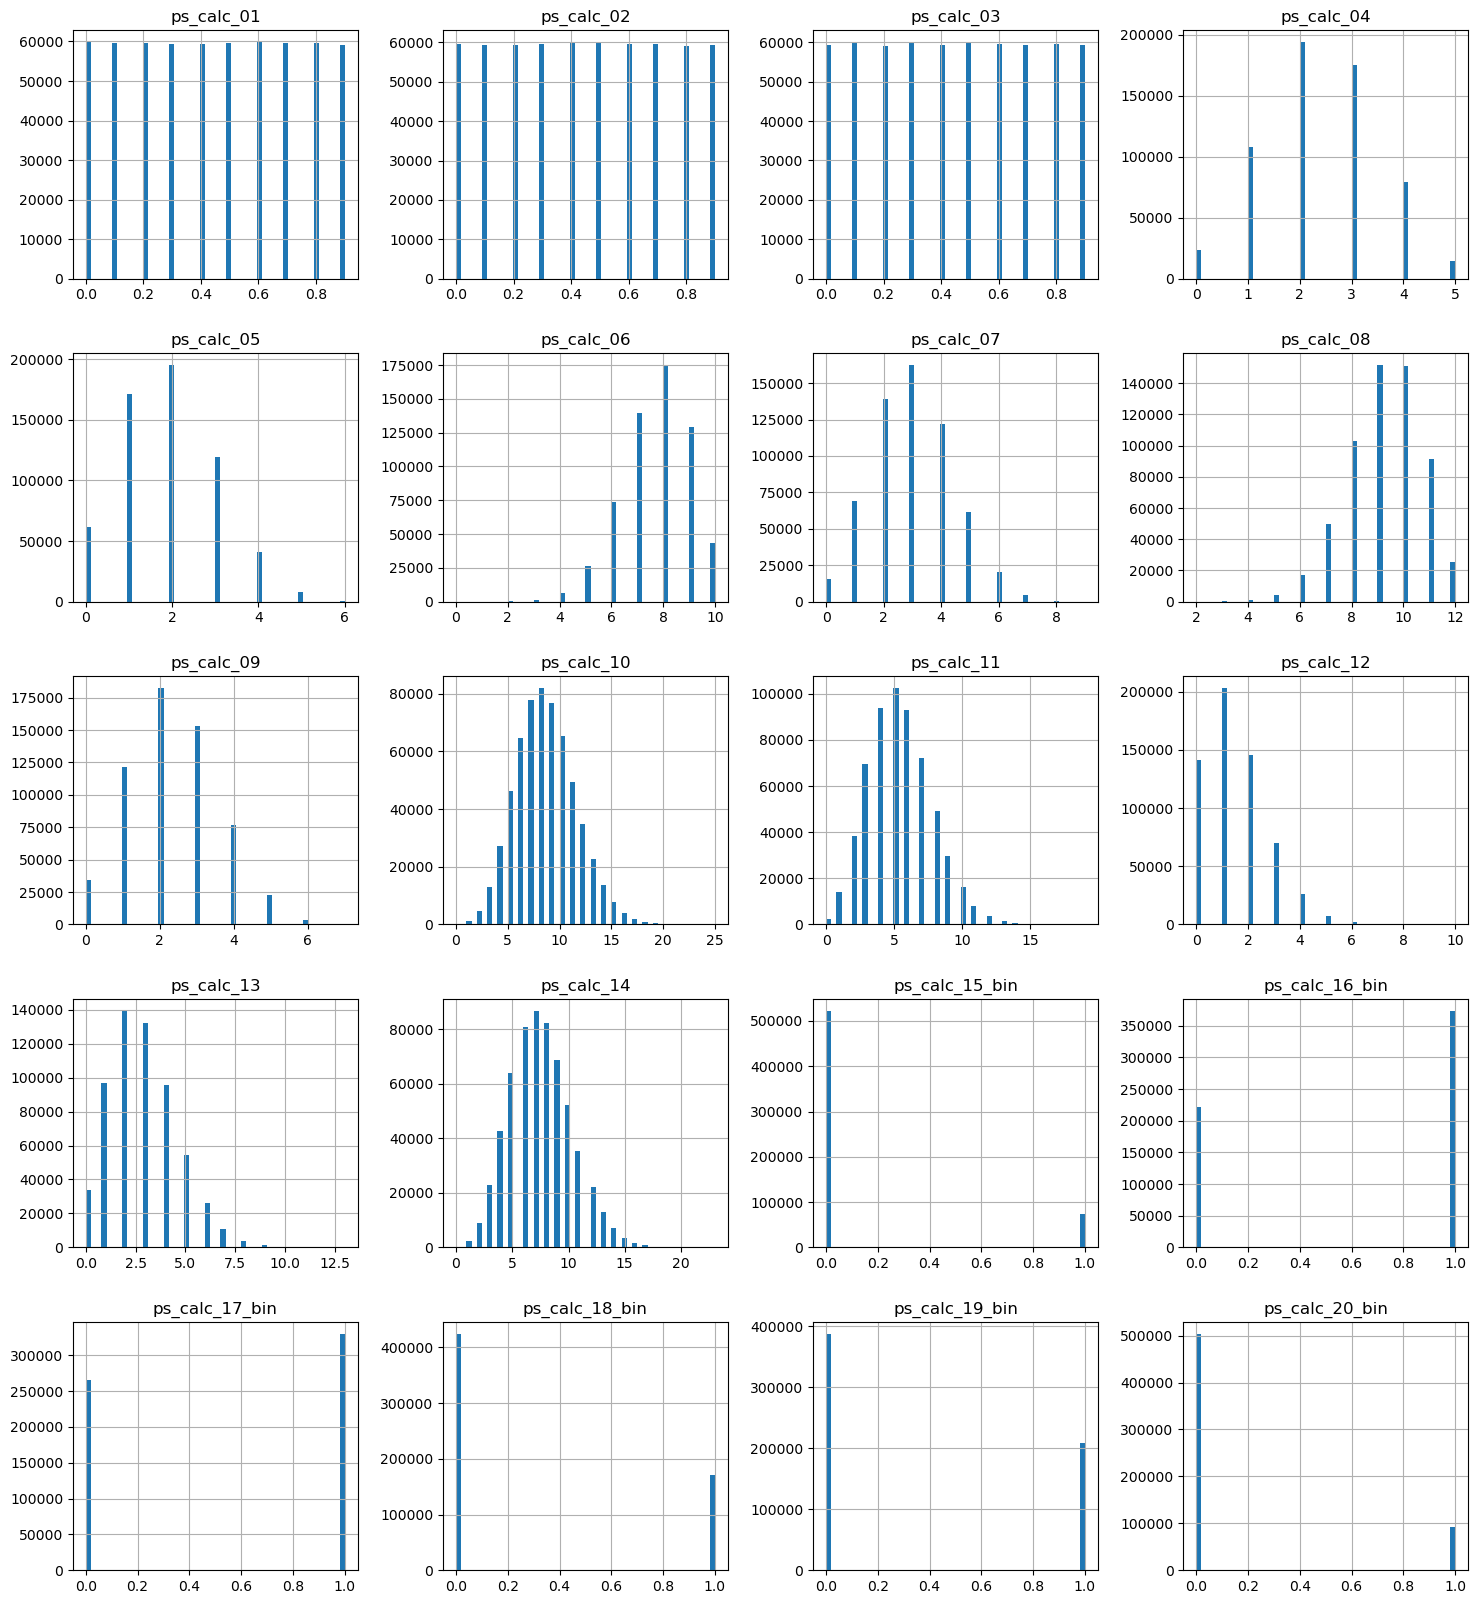

In [22]:
train[[i for i in features_list if 'calc' in i]].hist(bins=50,figsize=(18,20))

#### Conclusão

Entre as "features" do grupo "ind", três apresentaram um proporção elevada (acima de 99%) de amostras com o mesmo 
valor.Isso pode ser um indicativo que as elas não contêm informações relevantes para a classificação. Porém, em uma análise mais etalhada, comparando-se separadamente as amostras das duas classes, constatou-se que existe uma discrepância considerável nos valores dessas três "features", ou seja, membros de classes diferentes tendem a ter valores diferentes para essas features.

Já para as "features" do grupo cat, apenas 1 tem  quase a totalidade das amostras com um único valor. Porém, comparando-se as duas classes, os valores dessa "feature" apareceram com frequência parecida entre os membros das duas classes, o que pode indicar que essa feature não contém informação relevante para a classificação. 

### Correlation

Analisando a correlação entre as "features". O objetivo dessa análise é reduzir o número de features, buscando as
que tem um nivel alto de correlação. Essas "feaures" tem efeitos prejudiciais para algoritmos de aprendizado de máquina. Além disso, a redução do número de "features" tem o efeito benéfico de aumentar a velocidade do treinamento de modelos de aprendizado de máquina.

A análise das correlações será conduzida de forma separada para as "features" do tipo categóricas, binárias e para as contínuas ou ordinárias. O motivo é que certos tipos de caĺculos são específicos para determinado tipo de variável. 

In [23]:
#Criação de listas com os nomes das "features" de cada tipo

categorical_features  =[i for i in features_list if 'cat' in i] #list of categorical features
binary_features       =[i for i in features_list if 'bin' in i] #list of binary features 
cont_ordinal_features =[i for i in features_list if 'bin' not in i and 'cat' not in i] #list of continuous or ordinal features
cont_ordinal_features.remove('id')

#### Features Categóricas

Análise da correlação entre as variáveis categóricas

Os teste do Chi-quadrado e do nível de associação Chamer serão conduzidos para medir o nível de associação entre pares de "features categóricas" e entre cada uma dela e a resposta esperada (coluna target com a classe de cada amostra)


In [24]:
train_categorical=train[categorical_features+['target']]

array([[<Axes: title={'center': 'ps_ind_02_cat'}>,
        <Axes: title={'center': 'ps_ind_04_cat'}>,
        <Axes: title={'center': 'ps_ind_05_cat'}>,
        <Axes: title={'center': 'ps_car_01_cat'}>],
       [<Axes: title={'center': 'ps_car_02_cat'}>,
        <Axes: title={'center': 'ps_car_03_cat'}>,
        <Axes: title={'center': 'ps_car_04_cat'}>,
        <Axes: title={'center': 'ps_car_05_cat'}>],
       [<Axes: title={'center': 'ps_car_06_cat'}>,
        <Axes: title={'center': 'ps_car_07_cat'}>,
        <Axes: title={'center': 'ps_car_08_cat'}>,
        <Axes: title={'center': 'ps_car_09_cat'}>],
       [<Axes: title={'center': 'ps_car_10_cat'}>,
        <Axes: title={'center': 'ps_car_11_cat'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

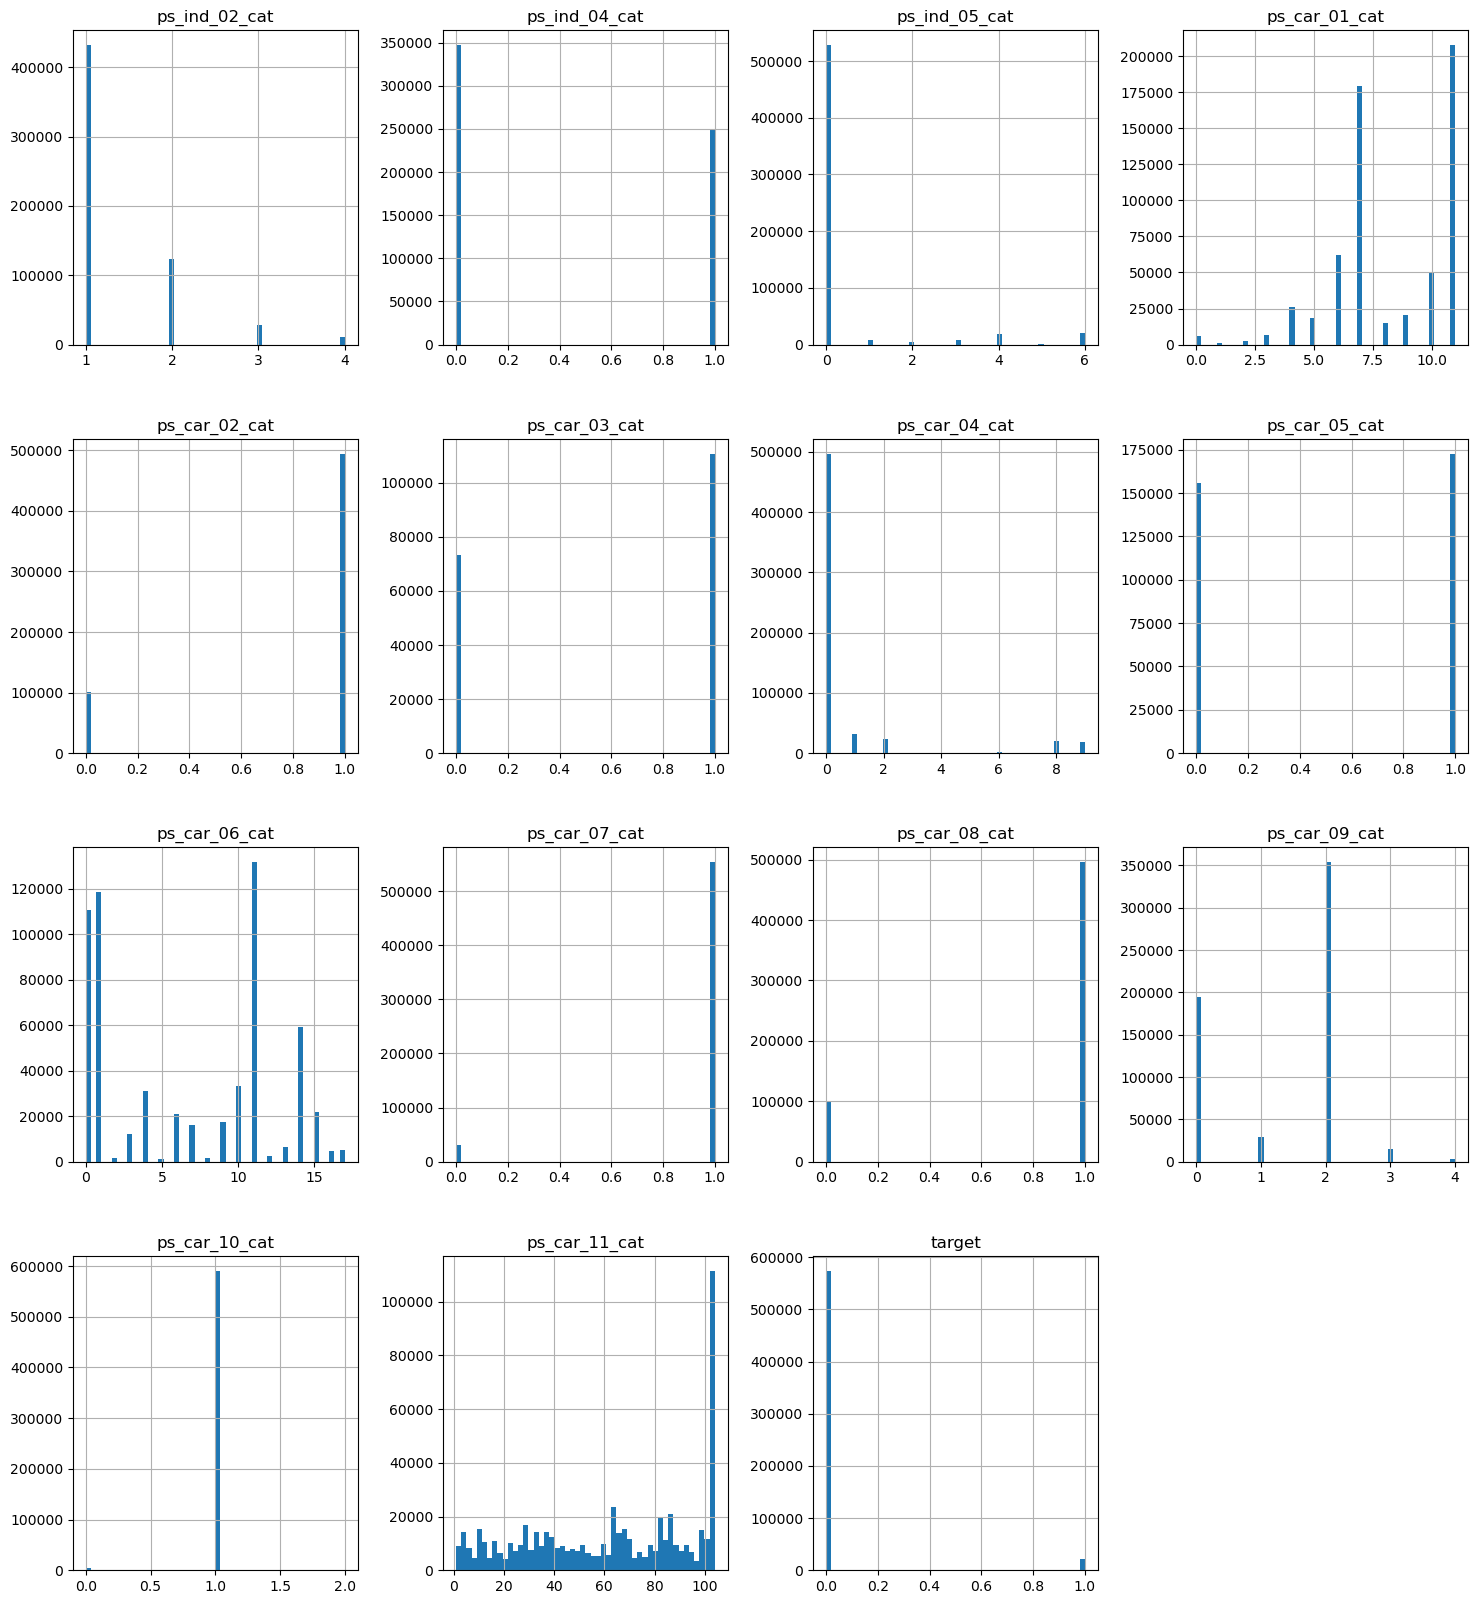

In [25]:
train_categorical[[i for i in train_categorical.columns]].hist(bins=50,figsize=(18,20))

In [26]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ps_ind_02_cat  594996 non-null  float64
 1   ps_ind_04_cat  595129 non-null  float64
 2   ps_ind_05_cat  589403 non-null  float64
 3   ps_car_01_cat  595105 non-null  float64
 4   ps_car_02_cat  595207 non-null  float64
 5   ps_car_03_cat  183981 non-null  float64
 6   ps_car_04_cat  595212 non-null  int64  
 7   ps_car_05_cat  328661 non-null  float64
 8   ps_car_06_cat  595212 non-null  int64  
 9   ps_car_07_cat  583723 non-null  float64
 10  ps_car_08_cat  595212 non-null  int64  
 11  ps_car_09_cat  594643 non-null  float64
 12  ps_car_10_cat  595212 non-null  int64  
 13  ps_car_11_cat  595212 non-null  int64  
 14  target         595212 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 68.1 MB


In [27]:
train_categorical.nunique()


ps_ind_02_cat      4
ps_ind_04_cat      2
ps_ind_05_cat      7
ps_car_01_cat     12
ps_car_02_cat      2
ps_car_03_cat      2
ps_car_04_cat     10
ps_car_05_cat      2
ps_car_06_cat     18
ps_car_07_cat      2
ps_car_08_cat      2
ps_car_09_cat      5
ps_car_10_cat      3
ps_car_11_cat    104
target             2
dtype: int64

In [28]:
train_categorical.describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,target
count,594996.000000,595129.000000,589403.000000,595105.000000,595207.000000,183981.000000,595212.000000,328661.000000,595212.000000,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000,595212.000000
mean,1.359799,0.416992,0.419038,8.297605,0.829947,0.601741,0.725192,0.525365,6.555340,0.947621,0.832080,1.331118,0.992136,62.215674,0.036448
std,0.663193,0.493062,1.350023,2.505396,0.375680,0.489541,2.153463,0.499357,5.501445,0.222791,0.373796,0.976559,0.091619,33.012455,0.187401
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,0.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,1.000000


Usando o teste de hipóteses Chi quadrado de Pearson para avaliar a independência entre pares de "features categóricas".A hipótese nula é que as duas variáveis são independentes. O coficiente V de Cramer também será usado para mensurar o nível de associação entre pares de "features categóricas" 


In [29]:
#alpha é o nível de significância que será usado para os testes de hipóteses
alpha=0.05

In [30]:
#A função chi_squared_test_cramers_features_output será usada para calcular o coeficiente Crames's V statistic 
#e o teste chi-quadrado entre cada "feature" categórica e o output.

dependence_categorical_outputs=chi_squared_test_cramers_features_output(train_categorical,0.05)
dependence_categorical_outputs



,chi2,p,dof,conclusion,cramers_v,cramers_df
ps_car_11_cat,1490.117417,1.463440e-244,103,Dependente,0.048275,1
ps_car_04_cat,866.457340,1.041262e-180,9,Dependente,0.037955,1
ps_car_06_cat,831.485524,8.853000e-166,17,Dependente,0.036992,1
ps_ind_05_cat,771.160950,2.618063e-163,6,Dependente,0.036031,1
ps_car_01_cat,770.783979,3.541428e-158,11,Dependente,0.035731,1
ps_car_02_cat,591.823590,1.005202e-130,1,Dependente,0.031506,1
ps_car_09_cat,420.388749,1.092510e-89,4,Dependente,0.026462,1
ps_car_03_cat,78.848480,6.706101e-19,1,Dependente,0.020570,1
ps_car_08_cat,246.005000,1.929360e-55,1,Dependente,0.020289,1
ps_car_07_cat,226.866524,2.875553e-51,1,Dependente,0.019671,1


Analisando os resultados, apenas duas "features" podem ser consideradas independentes do target (classe de cada amostra). Com relação ao coeficiente de Cramer, todos eles estão abaixo de 0,1 para o degree of freedom de 1, o que significa que o nível de assosiação entre cada "feature" e o target é muito baixo. 

Considerando esses dois resultados, pode ser vantajoso remover as features ps_car_05_cat e ps_car_10_cat (ambas 
são indepnendentes da target feature pelo teste Chi quadrado e o nível de associação entre cada uma delas e a target feature é negligenciável).

In [31]:
#A função association_categorical_features será usada para calcular coeficiente Crames's V e o teste 
#chi-quadrado entre todos os pares de "features" categóricas

cm_chisquared_categorical,cm_cramers_categorical,cm_cramersdf_categorical=association_categorical_features(train_categorical)

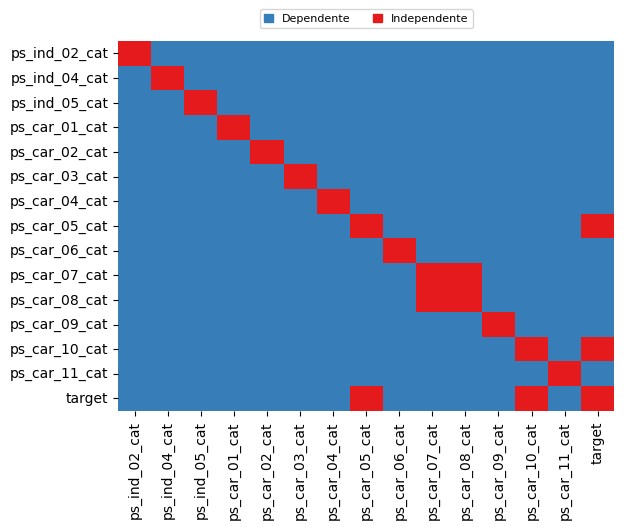

In [32]:
#Plotando os resultados dos testes chi-quadrado
heat_map_significance(cm_chisquared_categorical,alpha)

In [33]:
'''
Existem diversas regras que já foram desenvolvidas para interpretar os coeficientes Cramer V. Uma delas é a 
desenvolvida por Cohen (1988). Os resultado para o nivel de associação Cramer baseado na regras de Cohen estão
no dataframe abaixo.
'''

cm_cramers_association=create_cm_cramers_level(cm_cramers_categorical,cm_cramersdf_categorical)
cm_cramers_association

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,target
ps_ind_02_cat,grande,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel
ps_ind_04_cat,pequeno,grande,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel
ps_ind_05_cat,negligenciavel,negligenciavel,grande,pequeno,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,negligenciavel
ps_car_01_cat,negligenciavel,pequeno,negligenciavel,grande,pequeno,negligenciavel,pequeno,negligenciavel,pequeno,medio,negligenciavel,grande,negligenciavel,pequeno,negligenciavel
ps_car_02_cat,negligenciavel,negligenciavel,negligenciavel,pequeno,grande,negligenciavel,medio,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,grande,negligenciavel
ps_car_03_cat,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,medio,pequeno,negligenciavel,medio,negligenciavel
ps_car_04_cat,negligenciavel,pequeno,negligenciavel,negligenciavel,medio,negligenciavel,grande,negligenciavel,grande,pequeno,negligenciavel,pequeno,negligenciavel,grande,negligenciavel
ps_car_05_cat,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,pequeno,negligenciavel
ps_car_06_cat,negligenciavel,pequeno,negligenciavel,negligenciavel,grande,pequeno,medio,negligenciavel,grande,negligenciavel,pequeno,pequeno,negligenciavel,grande,negligenciavel
ps_car_07_cat,negligenciavel,negligenciavel,negligenciavel,medio,negligenciavel,negligenciavel,pequeno,negligenciavel,negligenciavel,grande,negligenciavel,negligenciavel,negligenciavel,pequeno,negligenciavel


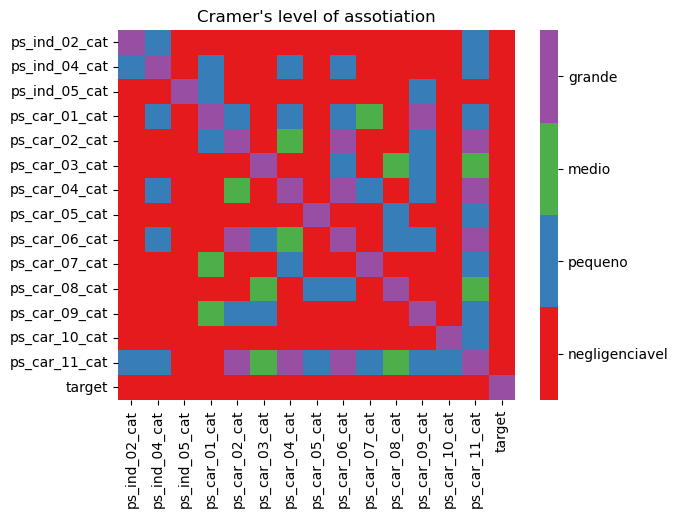

In [34]:
#Plotando um mapa de calor para visualizar o nível de associação entre as features baseado no critério
#Cramer
x=cm_cramers_association.applymap(association_to_number)
n=4
cmap = sns.color_palette("Set1",n,True)
ax=sns.heatmap(x, cmap=cmap) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(['negligenciavel','pequeno','medio','grande'])                                          
plt.title("Cramer's level of assotiation")
plt.show()

In [35]:
'''
Considerando o nivel de associação entre as feautures baseado no teste de Cramer,  há um nível negligenciável
de associação entre todos os pares formados por uma feature e a feature target. Além disso, o nível de associação 
entre a maioria de pares de features é negligenciável ou pequena
'''

'\nConsiderando o nivel de associação entre as feautures baseado no teste de Cramer,  há um nível negligenciável\nde associação entre todos os pares formados por uma feature e a feature target. Além disso, o nível de associação \nentre a maioria de pares de features é negligenciável ou pequena\n'

Conclusão:

Considerando o teste Chi quadrado, a maior parte dos pares formados por duas features categóricas não são independentes. E com relaçao a pares formados por uma feature categórica e a feature target, apenas duas das 14 features são independentes da target feature.

Por outro lado, o resultado do teste Cramer mostrou que o nivel de associaçao entre cada feature categórica e 
a target feature e negligenciável para todas elas. Já entre os pares formados por duas features categóricas, a maior parte dos niveis de associação encontrados foi pequeno ou negligenciável.

Vale a pena analisar o impacto da remoção das variáveis ps_car_05_cat e ps_car_10_cat (são independentes da target feature e o nivel de associação entre cada uma delas e a target feature é negligenciável). Também vale analisar o impacto causado pela remoção de variáveis com nível alto de associação de acordo com o coeficiente Cramer.

In [36]:
#Removendo o dataframe para liberar memória
del train_categorical 
gc.collect()

5193

#### Features Binárias


Analisando as features binárias:

O teste Chi-quadrado e o teste do coeficiente Phi vão ser conduzidos para medir a associação entre pares de features binárias e entre cada feature binária e a target feature.


array([[<Axes: title={'center': 'ps_ind_06_bin'}>,
        <Axes: title={'center': 'ps_ind_07_bin'}>,
        <Axes: title={'center': 'ps_ind_08_bin'}>,
        <Axes: title={'center': 'ps_ind_09_bin'}>],
       [<Axes: title={'center': 'ps_ind_10_bin'}>,
        <Axes: title={'center': 'ps_ind_11_bin'}>,
        <Axes: title={'center': 'ps_ind_12_bin'}>,
        <Axes: title={'center': 'ps_ind_13_bin'}>],
       [<Axes: title={'center': 'ps_ind_16_bin'}>,
        <Axes: title={'center': 'ps_ind_17_bin'}>,
        <Axes: title={'center': 'ps_ind_18_bin'}>,
        <Axes: title={'center': 'ps_calc_15_bin'}>],
       [<Axes: title={'center': 'ps_calc_16_bin'}>,
        <Axes: title={'center': 'ps_calc_17_bin'}>,
        <Axes: title={'center': 'ps_calc_18_bin'}>,
        <Axes: title={'center': 'ps_calc_19_bin'}>],
       [<Axes: title={'center': 'ps_calc_20_bin'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

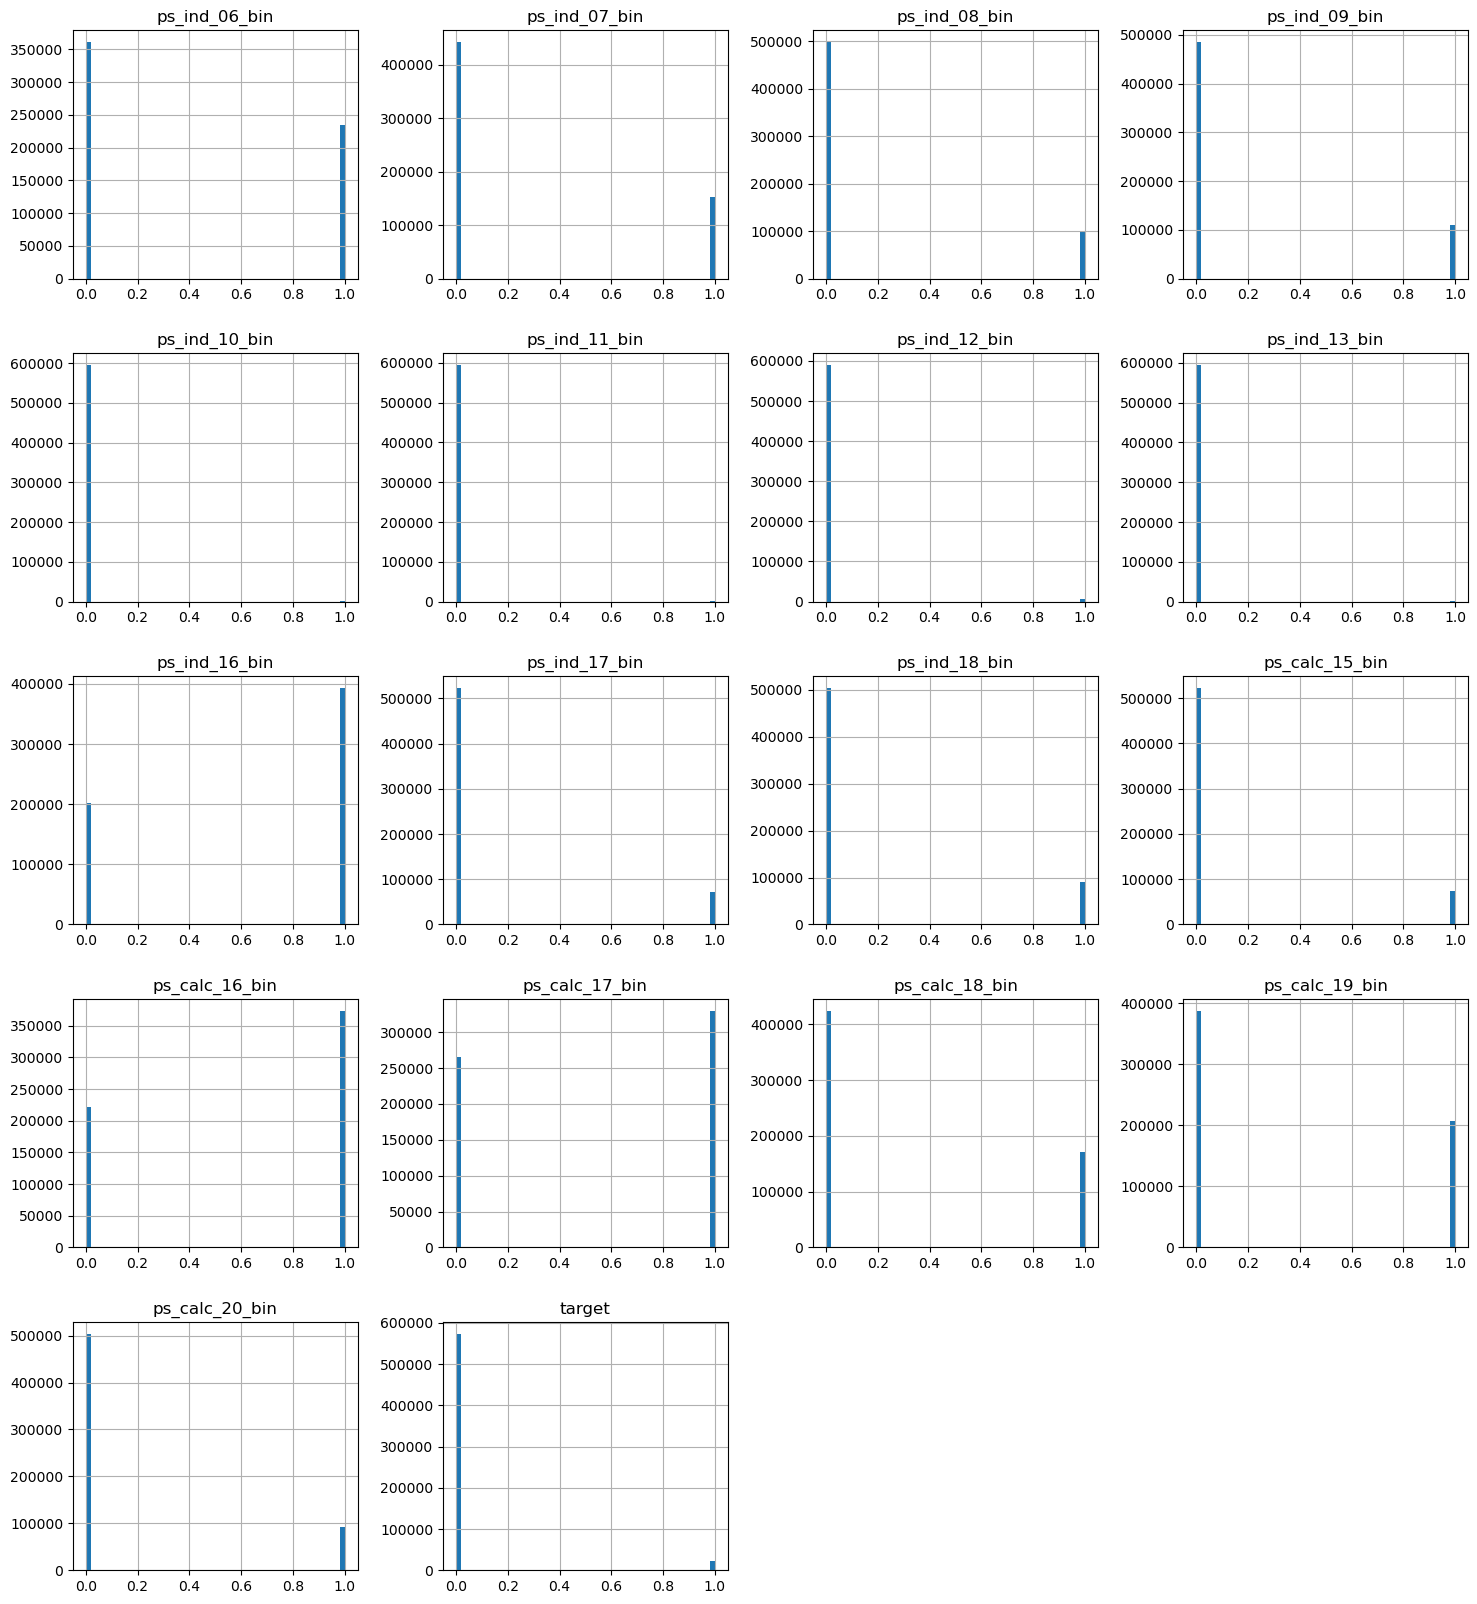

In [37]:
train_binary=train[binary_features+['target']].copy()
train_binary[[i for i in train_binary.columns]].hist(bins=50,figsize=(18,20))

In [38]:
train_binary.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [39]:
train_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ps_ind_06_bin   595212 non-null  int64
 1   ps_ind_07_bin   595212 non-null  int64
 2   ps_ind_08_bin   595212 non-null  int64
 3   ps_ind_09_bin   595212 non-null  int64
 4   ps_ind_10_bin   595212 non-null  int64
 5   ps_ind_11_bin   595212 non-null  int64
 6   ps_ind_12_bin   595212 non-null  int64
 7   ps_ind_13_bin   595212 non-null  int64
 8   ps_ind_16_bin   595212 non-null  int64
 9   ps_ind_17_bin   595212 non-null  int64
 10  ps_ind_18_bin   595212 non-null  int64
 11  ps_calc_15_bin  595212 non-null  int64
 12  ps_calc_16_bin  595212 non-null  int64
 13  ps_calc_17_bin  595212 non-null  int64
 14  ps_calc_18_bin  595212 non-null  int64
 15  ps_calc_19_bin  595212 non-null  int64
 16  ps_calc_20_bin  595212 non-null  int64
 17  target          595212 non-null  int64
dtypes: i

In [40]:
'''
O coeficiente Phi pode ser usado para medir o nivel de associação entre "features" binárias.Existe uma 
biblioteca no  Python que calcula esse coeficiente. Mais informações sobre essa biblioteca podem ser 
encontradas na seguinte URL:

https://phik.readthedocs.io/en/latest/ - link to phik library
https://nbviewer.org/github/KaveIO/PhiK/blob/master/phik/notebooks/phik_tutorial_basic.ipynb (This is a link to a notebook tutorial on how to use the phik library).
'''

'\nO coeficiente Phi pode ser usado para medir o nivel de associação entre "features" binárias.Existe uma \nbiblioteca no  Python que calcula esse coeficiente. Mais informações sobre essa biblioteca podem ser \nencontradas na seguinte URL:\n\nhttps://phik.readthedocs.io/en/latest/ - link to phik library\nhttps://nbviewer.org/github/KaveIO/PhiK/blob/master/phik/notebooks/phik_tutorial_basic.ipynb (This is a link to a notebook tutorial on how to use the phik library).\n'

In [41]:
#Calculando o nível de associação entre todos os pares de variáveis binárias

phik_binary=train_binary.phik_matrix(interval_cols=[])

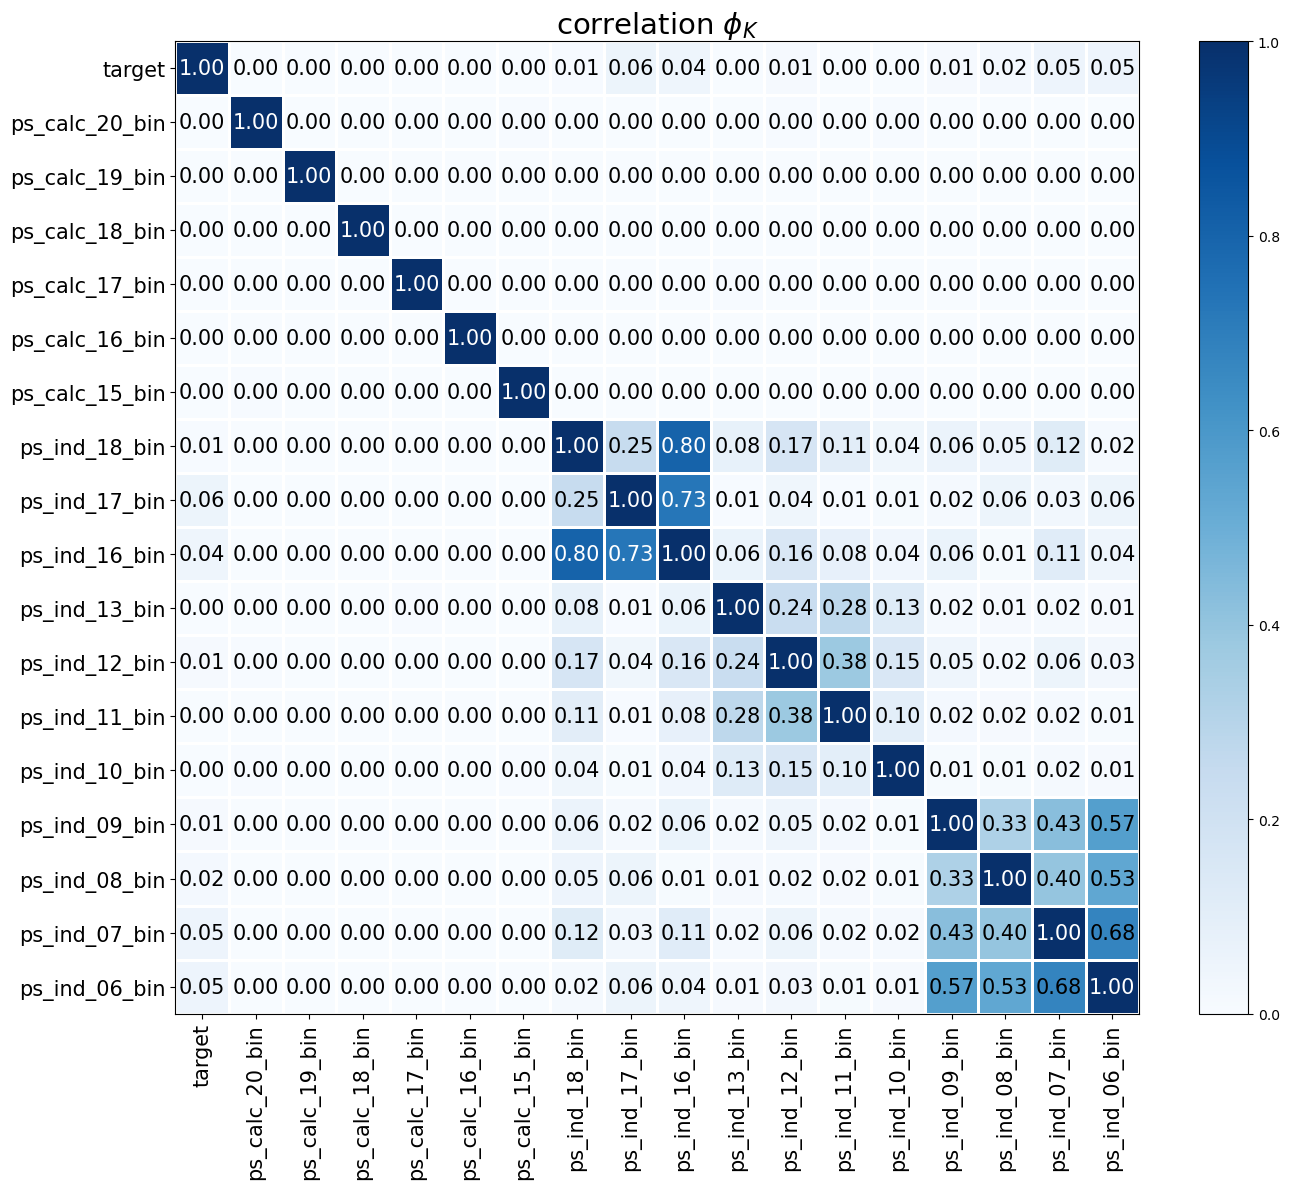

In [42]:
#plotando o coeficiente Phi entre os pares de variáveis binárias
plot_correlation_matrix(phik_binary.values, x_labels=phik_binary.columns, y_labels=phik_binary.index, 
                        vmin=0, vmax=1, color_map='Blues', title
                        =r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(14,12))

In [43]:
#Usando o teste Chi quadrado para determinar se as features binárias são independentes
cm_chisquared_binary,_,_ =association_categorical_features(train_binary)
cm_chisquared_binary

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
ps_ind_06_bin,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.009100e-12,6.275862e-05,1.881239e-41,1.277545e-10,4.925767e-106,2.476299e-180,1.278618e-19,0.108112,0.770634,1.000000,0.559980,0.031534,0.878387,1.007693e-151
ps_ind_07_bin,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.233463e-16,7.805030e-15,2.094714e-175,1.326769e-20,0.000000e+00,8.652617e-58,0.000000e+00,0.660612,0.348256,0.692342,0.891241,0.295082,0.461037,1.723298e-153
ps_ind_08_bin,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.847427e-07,1.316303e-14,3.876120e-21,1.573397e-09,6.380829e-06,4.833635e-170,2.882681e-145,0.032258,0.114980,0.657382,0.961455,0.480582,0.445427,3.921476e-24
ps_ind_09_bin,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.202059e-07,2.247771e-28,4.287681e-125,4.186466e-16,3.385036e-210,1.904220e-17,2.990652e-205,0.635432,0.415956,0.383104,0.531841,0.396885,0.927980,2.212703e-10
ps_ind_10_bin,7.009100e-12,2.233463e-16,8.847427e-07,1.202059e-07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.207560e-76,5.407205e-05,2.259366e-97,0.016767,0.477113,0.842474,0.911909,0.258898,0.011666,2.220863e-01
ps_ind_11_bin,6.275862e-05,7.805030e-15,1.316303e-14,2.247771e-28,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.684979e-03,0.000000e+00,0.645286,0.288578,0.429970,0.415055,0.355414,0.785551,1.387174e-01
ps_ind_12_bin,1.881239e-41,2.094714e-175,3.876120e-21,4.287681e-125,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.831173e-84,0.000000e+00,0.215363,0.180479,0.291619,0.301312,0.174232,0.015342,2.099882e-09
ps_ind_13_bin,1.277545e-10,1.326769e-20,1.573397e-09,4.186466e-16,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.312298e-215,1.769298e-03,0.000000e+00,0.752733,0.242938,0.027203,0.965058,0.118765,0.485030,7.414551e-02
ps_ind_16_bin,4.925767e-106,0.000000e+00,6.380829e-06,3.385036e-210,4.207560e-76,0.000000e+00,0.000000e+00,1.312298e-215,1.000000e+00,0.000000e+00,0.000000e+00,0.476158,0.704867,0.740808,0.945398,0.817970,0.242698,8.073342e-102
ps_ind_17_bin,2.476299e-180,8.652617e-58,4.833635e-170,1.904220e-17,5.407205e-05,7.684979e-03,6.831173e-84,1.769298e-03,0.000000e+00,1.000000e+00,0.000000e+00,0.222258,0.873868,0.854945,0.974770,0.552413,0.139448,1.355511e-179


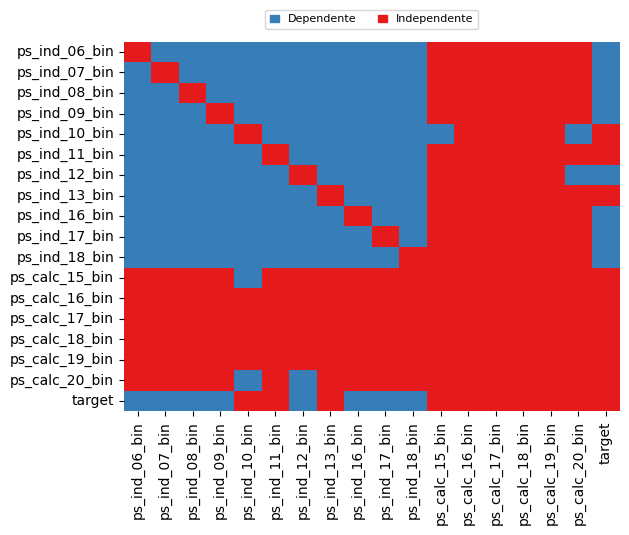

In [44]:
#Mapa de calor para mostrar o resultados do teste Chi-quadrado
heat_map_significance(cm_chisquared_binary,alpha)

In [45]:
#Removing the dataframe to save memory
del train_binary
gc.collect()

18976

Conclusão

O coeficiente Phi é desprezível (abaixo de 0.3) para todos os pares formados por uma variável binária e a target feature.É também desprezível para a maioria dos pares formados por duas variáveis binárias. Nenhum par apresenta correlção muito forte (acima de 0.9) e somente um par (formado pelas variáveis ps_ind_16_bin e ps_ind_18_bin) tem correlação forte (entre 0.8 e 0.9).


#### Continuous and Ordinal Variables

Analisando as variáveis contínuas e ordinárias:

A correlação ponto biserial será usada para calcular a correlação entre as variáveis contínuas e a target feature.
Já para o cálculo da correlação entre as variáveis ordinárias e a target feature será usada a correlação  ponto biserial correlacionada.

O coeficiente Phi será calculado para determinar a correlação entre todos os possíveis pares formados por variáveis continuas e ordinárias.

In [46]:
train_cont_ordinal=train[cont_ordinal_features]

In [47]:
train_cont_ordinal.shape

(595212, 27)

In [48]:
train_cont_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   target      595212 non-null  int64  
 1   ps_ind_01   595212 non-null  int64  
 2   ps_ind_03   595212 non-null  int64  
 3   ps_ind_14   595212 non-null  int64  
 4   ps_ind_15   595212 non-null  int64  
 5   ps_reg_01   595212 non-null  float64
 6   ps_reg_02   595212 non-null  float64
 7   ps_reg_03   487440 non-null  float64
 8   ps_car_11   595207 non-null  float64
 9   ps_car_12   595211 non-null  float64
 10  ps_car_13   595212 non-null  float64
 11  ps_car_14   552592 non-null  float64
 12  ps_car_15   595212 non-null  float64
 13  ps_calc_01  595212 non-null  float64
 14  ps_calc_02  595212 non-null  float64
 15  ps_calc_03  595212 non-null  float64
 16  ps_calc_04  595212 non-null  int64  
 17  ps_calc_05  595212 non-null  int64  
 18  ps_calc_06  595212 non-null  int64  
 19  ps

In [49]:
train_cont_ordinal.nunique()
#Pelo número de valores únicos aparentemente as variáveis ps_reg_03,ps_car_12,ps_car_13 and ps_car_14 são
#contínuas enquanto as demais são ordinárias.

target            2
ps_ind_01         8
ps_ind_03        12
ps_ind_14         5
ps_ind_15        14
ps_reg_01        10
ps_reg_02        19
ps_reg_03      5012
ps_car_11         4
ps_car_12       183
ps_car_13     70482
ps_car_14       849
ps_car_15        15
ps_calc_01       10
ps_calc_02       10
ps_calc_03       10
ps_calc_04        6
ps_calc_05        7
ps_calc_06       11
ps_calc_07       10
ps_calc_08       11
ps_calc_09        8
ps_calc_10       26
ps_calc_11       20
ps_calc_12       11
ps_calc_13       14
ps_calc_14       24
dtype: int64

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'ps_ind_01'}>,
        <Axes: title={'center': 'ps_ind_03'}>,
        <Axes: title={'center': 'ps_ind_14'}>,
        <Axes: title={'center': 'ps_ind_15'}>],
       [<Axes: title={'center': 'ps_reg_01'}>,
        <Axes: title={'center': 'ps_reg_02'}>,
        <Axes: title={'center': 'ps_reg_03'}>,
        <Axes: title={'center': 'ps_car_11'}>,
        <Axes: title={'center': 'ps_car_12'}>],
       [<Axes: title={'center': 'ps_car_13'}>,
        <Axes: title={'center': 'ps_car_14'}>,
        <Axes: title={'center': 'ps_car_15'}>,
        <Axes: title={'center': 'ps_calc_01'}>,
        <Axes: title={'center': 'ps_calc_02'}>],
       [<Axes: title={'center': 'ps_calc_03'}>,
        <Axes: title={'center': 'ps_calc_04'}>,
        <Axes: title={'center': 'ps_calc_05'}>,
        <Axes: title={'center': 'ps_calc_06'}>,
        <Axes: title={'center': 'ps_calc_07'}>],
       [<Axes: title={'center': 'ps_calc_08'}>,
    

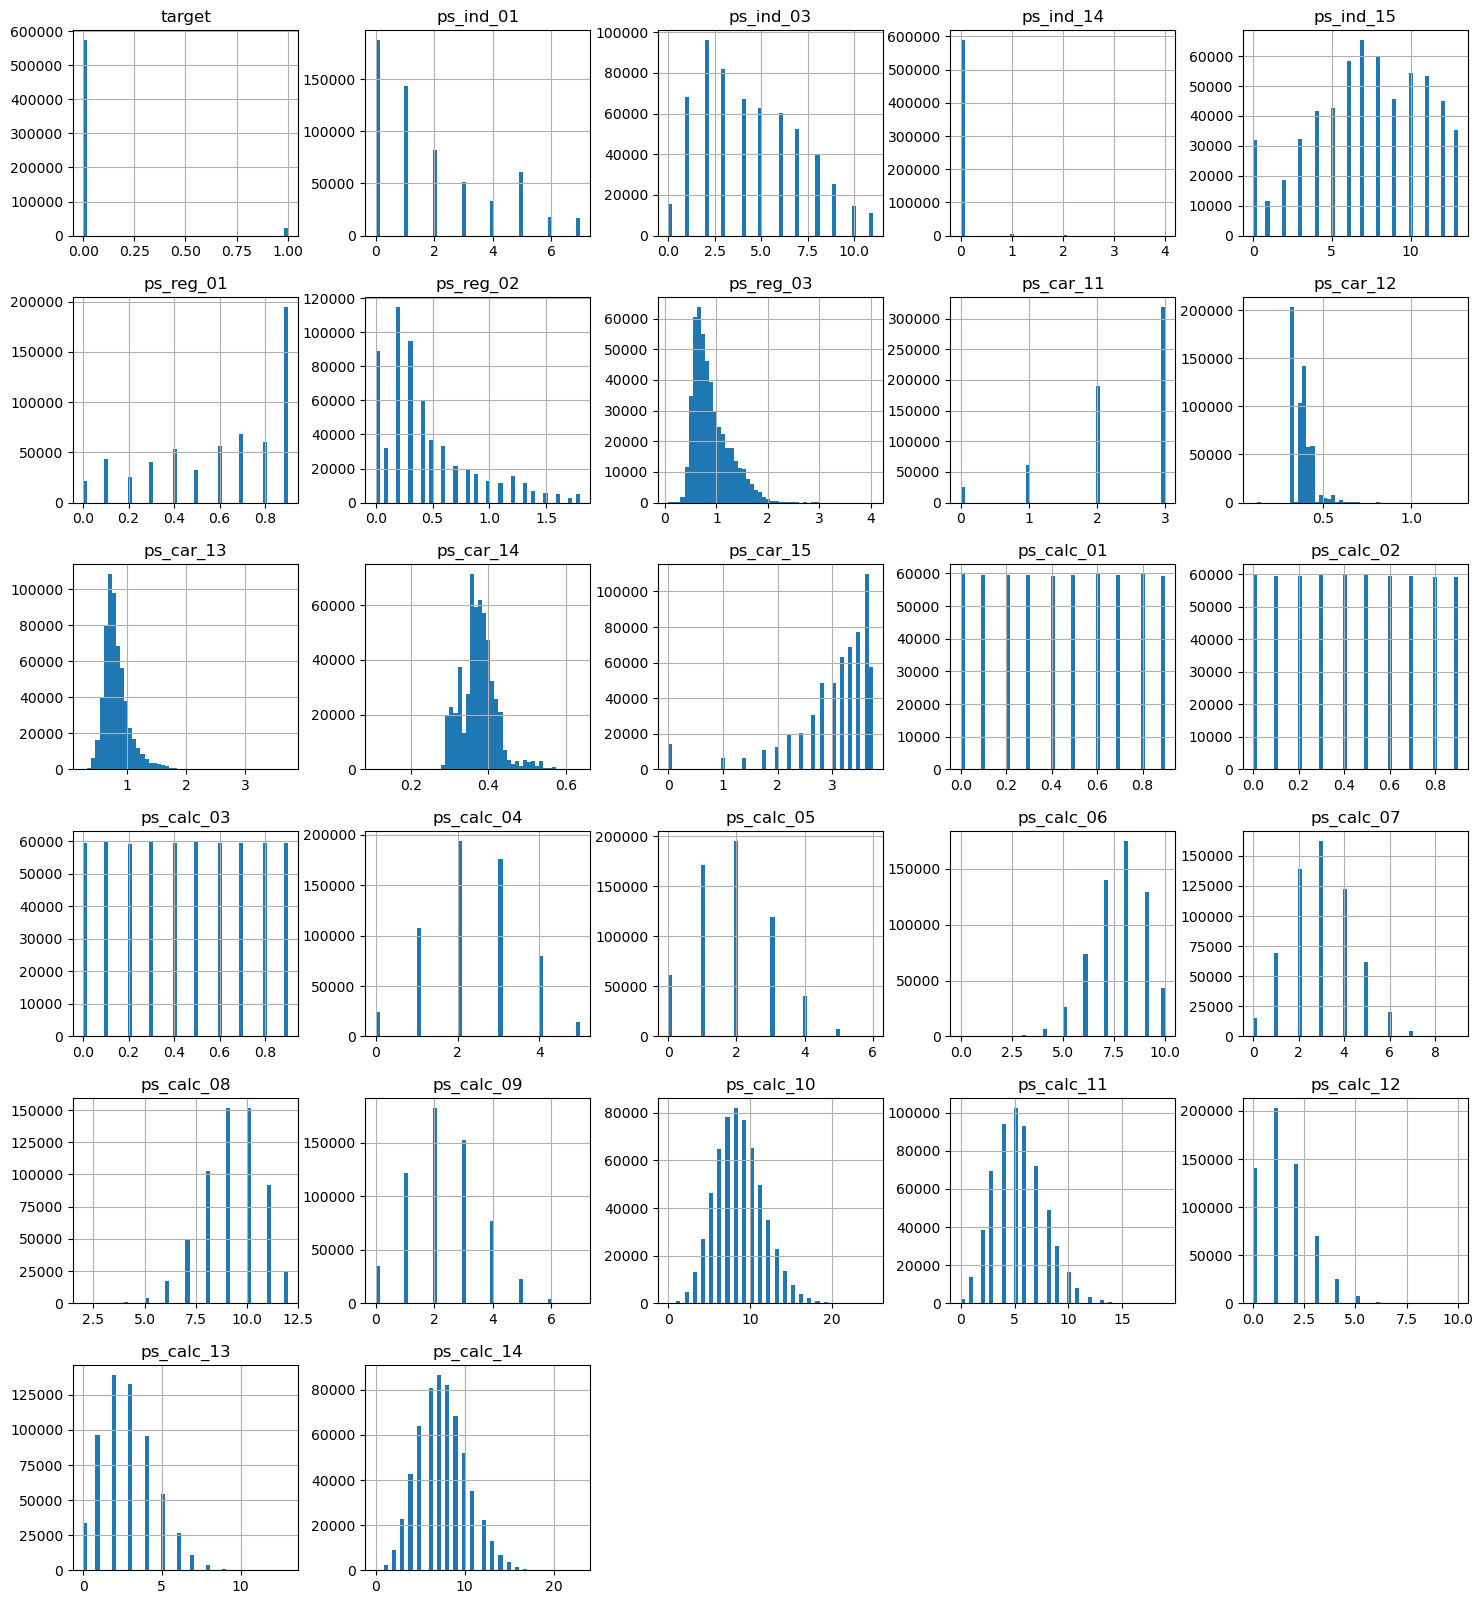

In [50]:
train_cont_ordinal[[i for i in train_cont_ordinal.columns]].hist(bins=50,figsize=(18,20))

In [51]:
#O coeficiente Phi pode ser aplicado para medir o nível de associação entre qualquer combinação entre variáveis
#categóricas, ordinárias e contínuas.Já a correlação ponto bisserial pode ser aplicada a combinações entre 
#variáveis contínuas-categóricas e ordinárias-categŕicas.

continuous_features=['ps_reg_03','ps_car_12','ps_car_13','ps_car_14']

In [52]:
#Calculando o Phi coeficiente para determinar o nivel de associação
phik_cont_ordinal= train_cont_ordinal.phik_matrix(interval_cols=continuous_features)

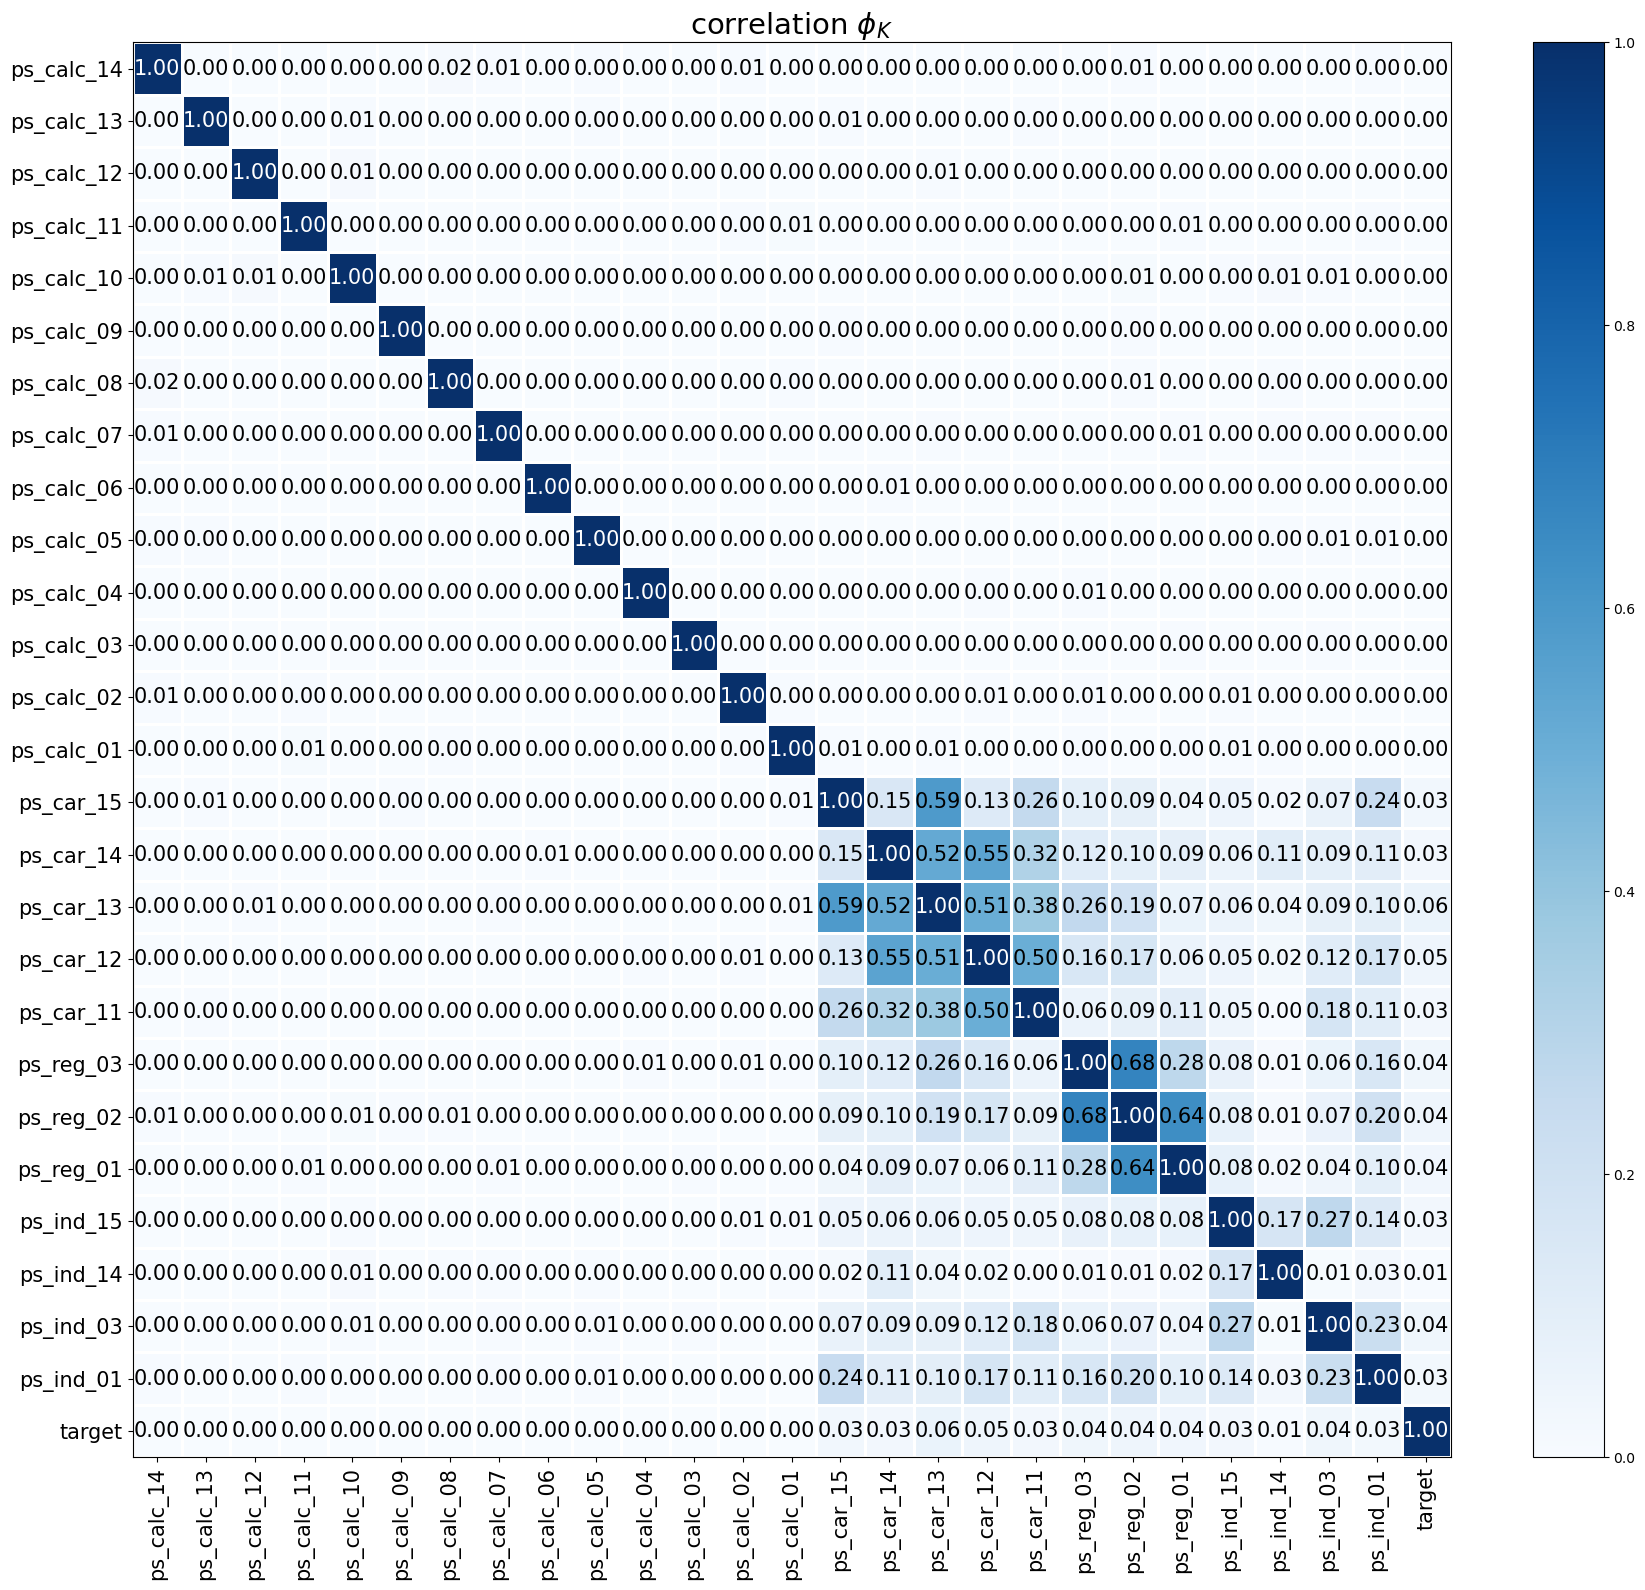

In [53]:
#plotando os coeficiente Phi para as variáveis contínuas e ordinárias
plot_correlation_matrix(phik_cont_ordinal.values, x_labels=phik_cont_ordinal.columns, y_labels=phik_cont_ordinal.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(18,16))

In [54]:
#variáveis contínuas
train_cont_ordinal[continuous_features]

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14
0,0.718070,0.400000,0.883679,0.370810
1,0.766078,0.316228,0.618817,0.388716
2,NaN,0.316228,0.641586,0.347275
3,0.580948,0.374166,0.542949,0.294958
4,0.840759,0.316070,0.565832,0.365103
...,...,...,...,...
595207,0.692820,0.374166,0.684631,0.385487
595208,1.382027,0.387298,0.972145,NaN
595209,0.659071,0.397492,0.596373,0.398748
595210,0.698212,0.374166,0.764434,0.384968


In [55]:
#calculando a correlação ponto bisserial entre as variáveis contínuas e a target feature
cont_point_biserial={'feature':[],'corr':[],'p_value':[]}
for feat in continuous_features:
    df=train_cont_ordinal[[feat,'target']].copy()
    df.dropna(inplace=True)
    corr,p_value=stats.pointbiserialr(df[feat],df['target'])
    cont_point_biserial['feature']=cont_point_biserial['feature']+[feat]
    cont_point_biserial['corr']   =cont_point_biserial['corr']   +[corr]
    cont_point_biserial['p_value']=cont_point_biserial['p_value']+[p_value]
cont_point_biserial=pd.DataFrame(cont_point_biserial)
cont_point_biserial.set_index('feature')    

,corr,p_value
feature,,
ps_reg_03,0.033758,6.912418e-123
ps_car_12,0.038800,5.013042e-197
ps_car_13,0.053899,0.000000e+00
ps_car_14,0.011674,4.012445e-18


In [56]:
'''
Hipótese Nula: O coeficiente de correlação é zero r = 0 (Não há correlação)
Hipótese Alternativa: O coeficiente de correlação é diferente de zero (Existe correlação)

O coeficiente de correlação calculado são extremenente pequenos. Existe informação suficiente para afirmar 
que a correlação não e nula.
'''

'\nHipótese Nula: O coeficiente de correlação é zero r = 0 (Não há correlação)\nHipótese Alternativa: O coeficiente de correlação é diferente de zero (Existe correlação)\n\nO coeficiente de correlação calculado são extremenente pequenos. Existe informação suficiente para afirmar \nque a correlação não e nula.\n'

In [57]:
#Calculando a matriz de correlação entre as variáveis contínuas
corr_matrix_continuous=train_cont_ordinal[continuous_features].corr()
corr_matrix_continuous

,ps_reg_03,ps_car_12,ps_car_13,ps_car_14
ps_reg_03,1.000000,0.228926,0.264800,0.090909
ps_car_12,0.228926,1.000000,0.672014,0.603361
ps_car_13,0.264800,0.672014,1.000000,0.459047
ps_car_14,0.090909,0.603361,0.459047,1.000000


<Axes: >

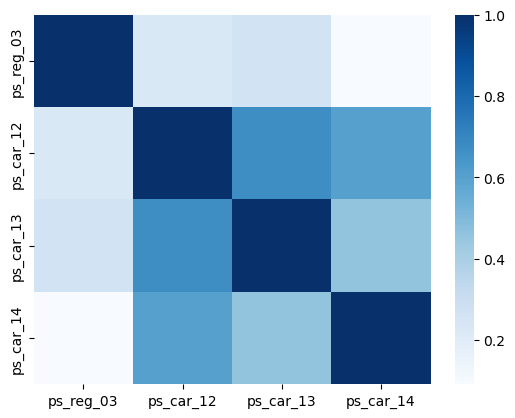

In [58]:
'''
Há uma correlação positiva moderada entre ps_car_12 e ps_car_13 e um correlação positiva moderada entre
ps_car_12 e ps_car_14.
'''

#Plotando o mapa de calor
sns.heatmap(corr_matrix_continuous,cmap='Blues')

In [59]:
#Removing the dataframe to save memory
del train_cont_ordinal
gc.collect()

19570

In [60]:
#The correlation between ordinal variables still needs to be calculated.

#### Conclusion

In [61]:
#Remover ps_car_05_cat, ps_car_10_cat
#Remover 'ps_calc_20_bin','ps_calc_19_bin','ps_calc_18_bin','ps_calc_17_bin','ps_calc_16_bin','ps_calc_15_bin'
#Remover 'ps_ind_13_bin', 'ps_ind_11_bin', 'ps_ind_10_bin'

In [62]:
features_to_remove=['id','ps_car_05_cat','ps_car_10_cat',
                   'ps_calc_20_bin','ps_calc_19_bin','ps_calc_18_bin','ps_calc_17_bin','ps_calc_16_bin','ps_calc_15_bin',
                   'ps_ind_13_bin', 'ps_ind_11_bin', 'ps_ind_10_bin']

In [63]:
features_to_remove


['id',
 'ps_car_05_cat',
 'ps_car_10_cat',
 'ps_calc_20_bin',
 'ps_calc_19_bin',
 'ps_calc_18_bin',
 'ps_calc_17_bin',
 'ps_calc_16_bin',
 'ps_calc_15_bin',
 'ps_ind_13_bin',
 'ps_ind_11_bin',
 'ps_ind_10_bin']

In [64]:
np.shape(train)

(595212, 59)

In [65]:
train=train.drop(columns=features_to_remove)

In [66]:
features_list=train.columns.to_list()

In [67]:
categorical_features  =[i for i in features_list if 'cat' in i] #list of categorical features
binary_features       =[i for i in features_list if 'bin' in i] #list of binary features 
cont_ordinal_features =[i for i in features_list if 'bin' not in i and 'cat' not in i] #list of continuous or ordinal features
#cont_ordinal_features.remove('id')

# - Pre-processing

## Missing Values

In [68]:
# Convertendo o formato dos dados das variáveis binárias e das categóricas

train[binary_features]     =train[binary_features].astype('object')
train[categorical_features]=train[categorical_features].astype('object')

In [69]:
#Analisando as variáveis binárias:
# Para essas variáveis não há nenhum dados ausente
train[binary_features].isna().sum()

ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_12_bin    0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
dtype: int64

In [70]:
#Variáveis ausentes
#Número de valores ausentes
train[categorical_features].isna().sum()

ps_ind_02_cat       216
ps_ind_04_cat        83
ps_ind_05_cat      5809
ps_car_01_cat       107
ps_car_02_cat         5
ps_car_03_cat    411231
ps_car_04_cat         0
ps_car_06_cat         0
ps_car_07_cat     11489
ps_car_08_cat         0
ps_car_09_cat       569
ps_car_11_cat         0
dtype: int64

In [71]:
#Proporção de valores ausentes para as variáveis categóricas
(train[categorical_features].isna().sum()/len(train))*100

ps_ind_02_cat     0.036290
ps_ind_04_cat     0.013945
ps_ind_05_cat     0.975955
ps_car_01_cat     0.017977
ps_car_02_cat     0.000840
ps_car_03_cat    69.089837
ps_car_04_cat     0.000000
ps_car_06_cat     0.000000
ps_car_07_cat     1.930237
ps_car_08_cat     0.000000
ps_car_09_cat     0.095596
ps_car_11_cat     0.000000
dtype: float64

In [72]:
#uma feature com uma elevada proporção de valores ausentes
#será excluida ou será usado um valor para indicar valor ausente

categorical_features_hp=['ps_car_03_cat']     
categorical_features_lp=[i for i in categorical_features if i not in categorical_features_hp]

In [73]:
#Propoção de valores ausentes entre as variáveis contínuas e ordinárias.
(train[cont_ordinal_features].isna().sum()/len(train))*100

target         0.000000
ps_ind_01      0.000000
ps_ind_03      0.000000
ps_ind_14      0.000000
ps_ind_15      0.000000
ps_reg_01      0.000000
ps_reg_02      0.000000
ps_reg_03     18.106490
ps_car_11      0.000840
ps_car_12      0.000168
ps_car_13      0.000000
ps_car_14      7.160474
ps_car_15      0.000000
ps_calc_01     0.000000
ps_calc_02     0.000000
ps_calc_03     0.000000
ps_calc_04     0.000000
ps_calc_05     0.000000
ps_calc_06     0.000000
ps_calc_07     0.000000
ps_calc_08     0.000000
ps_calc_09     0.000000
ps_calc_10     0.000000
ps_calc_11     0.000000
ps_calc_12     0.000000
ps_calc_13     0.000000
ps_calc_14     0.000000
dtype: float64

In [74]:
#cont_ordinal_features_hp - lista de variáveis contínuas ou ordinárias com alta proporção de valores ausentes
#cont_ordinal_features_lp - lista de variáveis contínuas ou ordinárias com baixa proporção de valores ausentes

cont_ordinal_features_hp=['ps_reg_03','ps_car_14']
cont_ordinal_features_lp=[i for i in cont_ordinal_features if i not in cont_ordinal_features_hp]

In [75]:
#Diferentes estratégias serão adotadas para substituir os valores ausentes

In [76]:
#Substituindo os valores ausentes das variáveis binárias
imputer_binary=SimpleImputer(strategy='most_frequent')
imputer_binary.fit(train[binary_features])
train[binary_features]=imputer_binary.transform(train[binary_features])

In [77]:
#Variáveis categóricas
'''
categorical_features_lp
O valor mais frequente será usado para substituir os valores ausentes. Pela proporção de valores ausentes 
ser baixa, a adição dos valores terá efeito desprezível nos resultados.

categorical_features_hp
Os valores ausentes serão substituídos por uma label indicando que eles estavam ausentes. Como havia uma elevada 
proporção desses dados, a adição de valores novos alteraria a distribuição original dos dados e poderia ter impacto
significativo nos resultados finais. A substituição pelo valor mais frequente também será testada
'''


imputer_categorical_lp=SimpleImputer(strategy='most_frequent')
imputer_categorical_lp.fit(train[categorical_features_lp])
train[categorical_features_lp]=imputer_categorical_lp.fit_transform(train[categorical_features_lp])

imputer_categorical_hp=SimpleImputer(strategy='constant',fill_value='missing')
imputer_categorical_hp.fit(train[categorical_features_hp])
train[categorical_features_hp]=imputer_categorical_hp.transform(train[categorical_features_hp])

In [78]:
train[categorical_features_hp].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ps_car_03_cat  595212 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [79]:
#Variáveis contínuas e ordinárias

'''
Para as variáveis com baixa proporção de valores ausentes os valores ausentes serão substituídos pela mediana
dos dados da variável. Já para as variáveis com alta proporção de dados ausentes, além da substituição pela 
mediana, também serão criadas novas variáveis indicando se um valor estava ausente. Uma outra alternativa que 
será testada substituirá os dados ausentes pela mediana dos n vizinhos mais próximos.
'''

train['ps_reg_03_new']=pd.Series(np.where(train['ps_reg_03'].isna(),'missing','not_missing'))
train['ps_car_14_new']=pd.Series(np.where(train['ps_car_14'].isna(),'missing','not_missing'))
imputer_cont_ordinal=SimpleImputer(strategy='median')
imputer_cont_ordinal.fit(train[cont_ordinal_features])
#train[cont_ordinal_features]=imputer_cont_ordinal.fit_transform(train[cont_ordinal_features])

#Outra opção seria usar knn para calcular os vizinhos maś próximos do valor ausente. A mediana seria então
#calculada então levando em conta somente os vizinhos mais próximos

class apply_knn_imputer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_name=cont_ordinal_features,n_neighbours=5,weights="uniform"):
        self.feature_name=feature_name
        self.n_neighbours=n_neighbours
        self.weights=weights
    def fit(self,X,y=None):
        self.imputer_KNN_ = KNNImputer(n_neighbors=self.n_neighbours, weights=self.weights)
        self.imputer_KNN_.fit(X[self.feature_name])
        return self
    def transform(self,X):
        check_is_fitted(self)
        X2=self.imputer_KNN_.transform(X[self.feature_name])
        return self.imputer_KNN_.transform(X[self.feature_name])


### Conclusão

## Encoding

### Rare labels

In [80]:
#Contando o número de amostras para determinar se existe alguma label rara

In [81]:
copy_train=train.copy()  
# criando uma cópia do dataset

In [82]:
count_labels={}
for i in categorical_features:
    count_labels[i]=(copy_train[[i]].value_counts()/len(copy_train))*100
    

In [83]:
#Todas as labels de uma variável cuja proporção estejam abaixo de um valor especificado serão agrupadas
#em uma única label

count_labels


{'ps_ind_02_cat': ps_ind_02_cat
 1.0              72.591782
 2.0              20.761174
 3.0               4.735456
 4.0               1.911588
 dtype: float64,
 'ps_ind_04_cat': ps_ind_04_cat
 0.0              58.30662
 1.0              41.69338
 dtype: float64,
 'ps_ind_05_cat': ps_ind_05_cat
 0.0              89.685356
 6.0               3.471368
 4.0               3.081927
 1.0               1.398157
 3.0               1.383205
 2.0               0.702943
 5.0               0.277044
 dtype: float64,
 'ps_car_01_cat': ps_car_01_cat
 11.0             34.891770
 7.0              30.114816
 6.0              10.482484
 10.0              8.414985
 4.0               4.397425
 9.0               3.414414
 5.0               3.047990
 8.0               2.535735
 3.0               1.118593
 0.0               0.991915
 2.0               0.360208
 1.0               0.229666
 dtype: float64,
 'ps_car_02_cat': ps_car_02_cat
 1.0              82.994798
 0.0              17.005202
 dtype: float64,
 

In [84]:
min_prop    =0.02 #a proporção mínima que uma label deve ter para ser considerada frequente
n_categories=2    #o número mínimo de categorias que uma variável deve ter para que o encoder busque as labels
                  #frequentes. Se uma variável tem um número menor de categorias todas elas são consideradas
                  #frequentes
        
rare_encoder=RareLabelEncoder(tol=min_prop,n_categories=n_categories,variables=categorical_features,max_n_categories=5)
rare_encoder.fit(copy_train)
copy_train=rare_encoder.transform(copy_train)

/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable ps_ind_04_cat is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable ps_car_02_cat is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable ps_car_07_cat is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/rodolfo/anaconda3/envs/estudo/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The nu

In [85]:
count_labels_encoded={}
for i in categorical_features:
    count_labels_encoded[i]=(copy_train[[i]].value_counts()/len(copy_train))*100
    

In [86]:
count_labels_encoded

{'ps_ind_02_cat': ps_ind_02_cat
 1.0              72.591782
 2.0              20.761174
 3.0               4.735456
 Rare              1.911588
 dtype: float64,
 'ps_ind_04_cat': ps_ind_04_cat
 0.0              58.30662
 1.0              41.69338
 dtype: float64,
 'ps_ind_05_cat': ps_ind_05_cat
 0.0              89.685356
 Rare              3.761349
 6.0               3.471368
 4.0               3.081927
 dtype: float64,
 'ps_car_01_cat': ps_car_01_cat
 11.0             34.891770
 7.0              30.114816
 Rare             11.698521
 6.0              10.482484
 10.0              8.414985
 4.0               4.397425
 dtype: float64,
 'ps_car_02_cat': ps_car_02_cat
 1.0              82.994798
 0.0              17.005202
 dtype: float64,
 'ps_car_03_cat': ps_car_03_cat
 missing          69.089837
 1.0              18.599927
 0.0              12.310236
 dtype: float64,
 'ps_car_04_cat': ps_car_04_cat
 0                83.429266
 1                 5.395557
 2                 3.993535
 8  

###  Encoding

In [87]:
#Duas técnicas serão empregadas para codificar as variáveis binária e caegóricas. Uma delas sera mean encoding.
#Essa técnica tem a vantagem de não criar novas variáveis e também de criar uma relação monotônica entre as 
#variáveis e a target feature. Outra técnica que será testada será one-hot-encoding

In [88]:
categorical_features+binary_features

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_12_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin']

In [89]:
#Mean Encoding

In [90]:
mean_encoder=MeanEncoder(variables=categorical_features+binary_features)

In [91]:
y_copy_train=copy_train['target'].copy()

In [92]:
copy_train.drop(columns='target',inplace=True)

In [93]:
mean_encoder.fit(copy_train,y_copy_train)

MeanEncoder(variables=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
                       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
                       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
                       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat',
                       'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
                       'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_16_bin',
                       'ps_ind_17_bin', 'ps_ind_18_bin'])

In [94]:
mean_encoder.encoder_dict_

{'ps_ind_02_cat': {1.0: 0.035799340392293,
  2.0: 0.038139399383360445,
  3.0: 0.037217058113957285,
  'Rare': 0.04078045350676745},
 'ps_ind_04_cat': {0.0: 0.03487701989350176, 1.0: 0.038643800067697166},
 'ps_ind_05_cat': {0.0: 0.03440311117272179,
  4.0: 0.05206061927605757,
  6.0: 0.05933597909205304,
  'Rare': 0.05127747007325353},
 'ps_car_01_cat': {4.0: 0.03916099946511806,
  6.0: 0.029762954177551967,
  7.0: 0.028770355989221577,
  10.0: 0.03697566234751532,
  11.0: 0.04172284283513097,
  'Rare': 0.04506613433671784},
 'ps_car_02_cat': {0.0: 0.04950749380044854, 1.0: 0.03377159687851092},
 'ps_car_03_cat': {0.0: 0.039537613276558574,
  1.0: 0.04829778970092766,
  'missing': 0.03270667824166952},
 'ps_car_04_cat': {0: 0.033450736133682116,
  1: 0.04882453682080025,
  2: 0.04720235591081195,
  8: 0.0501505000485484,
  9: 0.06188925081433225,
  'Rare': 0.05844572896596018},
 'ps_car_06_cat': {0: 0.03337257743162471,
  1: 0.03418478536313416,
  10: 0.04410446423235523,
  11: 0.0317

In [95]:
copy_train=mean_encoder.transform(copy_train)

In [96]:
#Removendo dataframes para liberar memória RAM
del train,copy_train,y_copy_train
gc.collect()

0

## Pipelines

In [97]:
#Serão criadas algumas pilenines para organizar as transformações que serão aplicadas aos dados. 
#A diferença entre as pipelines serão os tipos de transformações que cada uma delas vai conter.

In [98]:
x_train=pd.read_csv(path+'train.csv')


In [99]:
y_train=x_train['target']
x_train.drop(columns='target',inplace=True)


In [100]:
x_train.drop(columns=features_to_remove,inplace=True)

In [101]:
features_list=x_train.columns.to_list()
categorical_features  =[i for i in features_list if 'cat' in i] #lista das variáveis categóricas
binary_features       =[i for i in features_list if 'bin' in i] #lista das variáveis binárias
cont_ordinal_features =[i for i in features_list if 'bin' not in i and 'cat' not in i] #lista das variáveis 
                                                                                       #ordinárias ou contínuas 

In [102]:
cont_ordinal_features_hp=['ps_reg_03','ps_car_14']
cont_ordinal_features_lp=[i for i in cont_ordinal_features if i not in cont_ordinal_features_hp]
#cont_ordinal_features_hp - variáveis com proporção elevada de valores ausentes
#cont_ordinal_features_lp - variáveis com proporção baixa de valores ausentes

In [103]:
categorical_features_hp=['ps_car_03_cat']     
categorical_features_lp=[i for i in categorical_features if i not in categorical_features_hp]

In [104]:
#Essa transformação será comum a todas as pipelines.
#Novas variáveis serão criadas para indicar se um valor estava ausente. Isso será aplicado as variáveis 
#contínuas e ordinárias com elevada proporção de dados ausentes

missing=[i+'_missing' for i in cont_ordinal_features_hp]

#O primeiro pipeline cria duas novas colunas indicando se havia valores ausentes para as variáveis
#'ps_reg_03','ps_car_14'

def creating_missing_column(x,features_list):
    x_copy=x.copy()
    for i in features_list:
        x_copy[i+'_missing']=pd.Series(np.where(x_copy[i].isna(),'missing','not_missing'))
    return x_copy

create_columns=FunctionTransformer(creating_missing_column,kw_args=dict(features_list=cont_ordinal_features_hp))
first_pipeline=Pipeline([('create_columns',create_columns)])

In [105]:
missing

['ps_reg_03_missing', 'ps_car_14_missing']

### Primeira Pipeline

Essa primeira pipeline aplica as seguintes transformações:

       -Para as variáveis contínuas e ordinárias com elevada proporção de dados ausentes serão criadas novas variáveis para indicar se os dados estavam ausentes. Os dados ausentes serão substituídos pela mediana. Por fim os dados serão normalizados
        
                -Para as variáveis binárias os dados ausentes serão substituídos pelo mais frequente. Todas as labels raras serão agrupadas em uma única.Para a codificação será usado o mean encoding e por fim os dados serão          normalizados.
        
       -Os dados ausentes das variáveis categóricas com alta proporção de dados ausentes serão substituídos por 
        uma constante. Já para as variáveis com baixa proporção será usados o dados mais frequente.Todas as labels         raras serão agrupadas em uma única.Para a codificação será usado o mean encoder e por fim os dados serão           normalizados.
       

In [106]:
#Função que converte o formato dos dados para object
def convert_to_object(x):
    return x.astype('object')

In [107]:
#Transformação que será aplicada a todas as variáveis binárias
binary_pipeline_pp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_object)),
    ('impute_binary',SimpleImputer(strategy='most_frequent')),
    ('encoding_binary',MeanEncoder()),
    ('standardize',StandardScaler())
])

In [108]:
"""
A pipeline categorical_feature_hp contém as transformações que serão aplicadas nas variáveis categóricas
que contem uma alta proporção de dados ausentes, enquanto a pipeline categorical_features_lp_pipeline contem as
transformações que serão aplicadas as variáveis categóricas que contem uma proporção baixa de valores ausentes.
"""

categorical_features_hp_pipeline_pp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_object)),
    ('impute_cat',SimpleImputer(strategy='constant',fill_value='missing')),
    ('rare_labels',RareLabelEncoder(tol=0.2,n_categories=2)),
    ('encoding_cat',MeanEncoder()),
    ('standardize',StandardScaler())
])

categorical_features_lp_pipeline_pp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_object)),
    ('impute_cat',SimpleImputer(strategy='most_frequent')),
    ('rare_labels',RareLabelEncoder(tol=0.2,n_categories=2)),
    ('encoding_cat',MeanEncoder()),
    ('standardize',StandardScaler())
])


In [109]:
'''
A pipeline cont_ordinal_features_pipeline será aplicada as variáveis contínuas e ordinárias
'''
cont_ordinal_features_pipeline_pp=Pipeline([
    ('impute_num',SimpleImputer(strategy='median')),
    (('standardize',StandardScaler()))
])

In [110]:
'''
A transforamação da remainder pipeline será aplicada as variáveis restantes (são as duas variáveis criadas
para indicar ser haviam dados ausentes).
'''
remainder_pipeline_pp=Pipeline([
    ('imputer_one_hot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [111]:
second_pipeline_pp=ColumnTransformer([
    ('binary',binary_pipeline_pp,binary_features),
    ('categorical_hp',categorical_features_hp_pipeline_pp,categorical_features_hp),
    ('categorical_lp',categorical_features_lp_pipeline_pp,categorical_features_lp),
    ('numerical',cont_ordinal_features_pipeline_pp,cont_ordinal_features)],remainder=remainder_pipeline_pp)

In [112]:
complete_pipeline_pp=Pipeline([('first_pipeline',first_pipeline),
                            ('second_pipeline',second_pipeline_pp)])

In [113]:
#x_pre_processed=complete_pipeline_pp.fit_transform(x_train,y_train)

In [114]:
#x_pre_processed.columns

### Segunda Pipeline

In [115]:
#Semelhante a anterior com substituição de mean encoding por one hot encoding

one_hot_encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)


In [116]:
#Função que converte o formato dos dados para string
def convert_to_str(x):
    return x.astype('str')

In [154]:
binary_pipeline_sp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_str)),
    ('impute_binary',SimpleImputer(strategy='most_frequent')),
    ('encoding_binary',one_hot_encoder)
])

categorical_features_hp_pipeline_sp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_str)),
    ('impute_cat',SimpleImputer(strategy='constant',fill_value='missing')),
    #('rare_labels',RareLabelEncoder(tol=0.2,n_categories=2)),
    ('encoding_cat',one_hot_encoder)
])

categorical_features_lp_pipeline_sp=Pipeline([
    ('convert_to_object',FunctionTransformer(convert_to_str)),
    ('impute_cat',SimpleImputer(strategy='most_frequent')),
    #('rare_labels',RareLabelEncoder(tol=0.2,n_categories=2)),
    ('encoding_cat',one_hot_encoder)
])

cont_ordinal_features_pipeline_sp=Pipeline([
    ('impute_num',SimpleImputer(strategy='median')),
    (('standardize',StandardScaler()))
])

remainder_pipeline_sp=Pipeline([
    ('imputer_one_hot',one_hot_encoder)
])

second_pipeline_sp=ColumnTransformer([
    ('binary',binary_pipeline_sp,binary_features),
    ('categorical_hp',categorical_features_hp_pipeline_sp,categorical_features_hp),
    ('categorical_lp',categorical_features_lp_pipeline_sp,categorical_features_lp),
    ('numerical',cont_ordinal_features_pipeline_sp,cont_ordinal_features)],remainder=remainder_pipeline_sp)

complete_pipeline_sp=Pipeline([('first_pipeline',first_pipeline),
                            ('second_pipeline',second_pipeline_sp)])

### Pipeline knn

### Aplicação da pipeline

In [156]:
#x_pre_processed=complete_pipeline_pp.fit_transform(x_train,y_train)
x_pre_processed=complete_pipeline_sp.fit_transform(x_train,y_train)

In [157]:
x_pre_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 222 entries, binary__ps_ind_06_bin_0 to remainder__ps_car_14_missing_not_missing
dtypes: float64(222)
memory usage: 1008.1 MB


# - Train Baseline

In [ ]:
"""
Treinando alguns modelos para obter um valor inicial para as metricas a partir do qual se buscará aprimorar os 
resultados. Para o treinamento será usada a função train_baseline, que fez o treinamento dos modelos usando cross
validation  e retorna os resultados em um dicionário.
"""

In [150]:
#Nem todos os modelos serão treinados porque isso toma muito tempo, especialmente para SVM
models={#'Logistic Regression'  :[LogisticRegression()],
        #'SVC classifier_linear':[SVC(kernel='linear')],
        #'SVC classifier_rbf'   :[SVC(kernel='rbf')],
        #'Single tree'          :[DecisionTreeClassifier()],
        #'RandomForest'         :[RandomForestClassifier()],
        #'GBM'                  :[GradientBoostingClassifier()],
        'LGBM'                 :[LGBMClassifier()]}
        #'XgBoost'              :[XGBClassifier(eval_metric= 'logloss')]}


In [151]:
#Métricas que serão usadas para avaliar os modelos
scoring=['precision','recall','accuracy','roc_auc']

In [122]:
#Treinar os modelos usando dataset desbalanceado
results_no_sampling=train_baseline(x_pre_processed,y_train,models)

Models: 100%|█████████████████████████████████████| 1/1 [00:44<00:00, 44.18s/it]


In [123]:
results_no_sampling


{'model': ['LGBM'],
 'scores': [{'accuracy': [0.9635341851263829,
    0.9635593861041808,
    0.9635674803850742,
    0.963542279195578,
    0.963542279195578],
   'precision': [0.3333333333333333, 1.0, 1.0, 0.0, 0.4],
   'recall': [0.0004609356994699239,
    0.00023046784973496196,
    0.0002305209774089442,
    0.0,
    0.0004609356994699239],
   'roc_auc': [0.6339285496139672,
    0.6377757074927384,
    0.6385944030831481,
    0.6349081703170409,
    0.6377290019206632]}]}

In [124]:
#Treinar modelos com dataset balanceado usado random oversampling
results_random_over_sampling=train_baseline(x_pre_processed,y_train,models,RandomOverSampler())

Models: 100%|█████████████████████████████████████| 1/1 [01:15<00:00, 75.32s/it]


In [125]:
results_random_over_sampling

{'model': ['LGBM'],
 'scores': [{'accuracy': [0.6444730055526154,
    0.6450694286938333,
    0.6513163421313486,
    0.6425211269971942,
    0.6492918465751584],
   'precision': [0.05474281427298729,
    0.05518924372902832,
    0.055318945303153566,
    0.055483180570418275,
    0.05652235762719901],
   'recall': [0.5381424291311362,
    0.5420603825766306,
    0.532964499769479,
    0.5496658216178844,
    0.5494353537681493],
   'roc_auc': [0.6314914782832837,
    0.63521458167417,
    0.6355377854397303,
    0.6355980669232077,
    0.6382988222916666]}]}

In [126]:
#Treinar modelos com dataset balanceado usado random undersampling
results_random_under_sampling=train_baseline(x_pre_processed,y_train,models,RandomUnderSampler())

Models: 100%|█████████████████████████████████████| 1/1 [00:11<00:00, 11.75s/it]


In [127]:
results_random_under_sampling

{'model': ['LGBM'],
 'scores': [{'accuracy': [0.6126777718975496,
    0.6083348033903715,
    0.6135313586801298,
    0.6014431881184792,
    0.6177987601014768],
   'precision': [0.052995441022238396,
    0.05307770355965164,
    0.052899266062921155,
    0.05300924965780414,
    0.05361907034249398],
   'recall': [0.5706383959437659,
    0.5787047706844896,
    0.5682342093130475,
    0.5890758239225629,
    0.569716524544826],
   'roc_auc': [0.6276209348616973,
    0.6303793720537109,
    0.6289691835994599,
    0.6337120071555602,
    0.6349331072104357]}]}

In [128]:
#Calcular a média dos resultados obtidos com cross validation
results_LGBM_brief=update_dictionary(results_no_sampling,'all_features_no_sampling')

In [129]:
results_LGBM_brief

{'dataset': ['all_features_no_sampling'],
 'mean_precision': [0.5466666666666666],
 'mean_recall': [0.00027657204521675086],
 'mean_roc': [0.6365871664855115]}

In [130]:
results_LGBM_brief=update_dictionary(results_random_over_sampling,'all_features_random_over_sampling',
                                     results_LGBM_brief)

In [131]:
results_LGBM_brief=update_dictionary(results_random_under_sampling,'all_features_random_under_sampling'     
                                     ,results_LGBM_brief)

In [132]:
"""
the ROC-AUC obtido no treinamento dos modelos com o dataset original e usando random oversampling e random under
sampling ficaram muito próximos. O uso das técnicas de amostragem aprimorou a recall, mas a precisão degradou.
"""

'\nthe ROC-AUC obtido no treinamento dos modelos com o dataset original e usando random oversampling e random under\nsampling ficaram muito próximos. O uso das técnicas de amostragem aprimorou a recall, mas a precisão degradou.\n'

In [133]:
pd.DataFrame(results_LGBM_brief)

,dataset,mean_precision,mean_recall,mean_roc
0,all_features_no_sampling,0.546667,0.000277,0.636587
1,all_features_random_over_sampling,0.055451,0.542454,0.635228
2,all_features_random_under_sampling,0.053120,0.575274,0.631123


# - Feature Selection

## - Sequential Feature Selector 


In [ ]:
#Buscar o grupo de variáveis que levam aos melhores resultados. Para esse propósito será usado 
#o SequentialFeatureSelector do sklearn. Para essa seleção é necessário especificar o número máximo
#de variáveis que serão mantidas. Diferentes valores para esse parâmetro serão testados.

In [ ]:
min_number_features=5  #número mínimo de variáveis que serão mantidas nos testes
step=5                 #Variação entre o número de features que seráo testadas. Por exemplo, se step=5, serão 
                       #testados grupos com 5,10,15... variáveis
max_number_features=np.arange(6,7,1)


In [ ]:
#O modelo LGBMCClassifier será treinado com diferentes combinações de variáveis. PAra balancear o 
#dataset será usado randomoversampling
model=make_pipeline(RandomOverSampler(),
                   LGBMClassifier())

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


results_feature_selection={'feature':[],'roc_auc':[]}
sampler= RandomOverSampler()
for key in tqdm(max_number_features,desc='Max_features'):
    sfs = SFS(estimator=model,
    n_features_to_select=key,  # the number of features to retain
    tol=0.005,  # the maximum increase or decrease in the performance metric
    direction='forward',  # the direction of the selection procedure
    scoring='roc_auc',  # the metric to evaluate
    cv=5,  # the cross-validation fold
    n_jobs=4)  # for parallelization
    sfs=sfs.fit(x_pre_processed,y_train)
    x_forward=sfs.transform(x_pre_processed)
    results_feature_selection['feature']=results_feature_selection['feature']+[x_forward.columns]
    results_forward=train_model(LGBMClassifier(),x_forward,y_train,scoring,sampler)
    results_feature_selection['roc_auc']=results_feature_selection['roc_auc']+[np.mean(results_forward)]


In [ ]:
#Salvar os resultados obtidos com SequentialFeatureSelector
'''
with open('results_feature_selection.pkl', 'wb') as fp:
    pickle.dump(results_LGBM_brief, fp)
    print('dictionary saved successfully to file')
'''

In [ ]:
#Carregar os resultados obtidos com SequentialFeatureSelector
# Read dictionary pkl file
'''
with open('results_feature_selection.pkl', 'rb') as fp:
    results_LGBM_brief = pickle.load(fp)
'''

## - Feature Importance

In [158]:
model_fi=LGBMClassifier()
model_fi.fit(x_pre_processed,y_train)

LGBMClassifier()

In [159]:
features=x_pre_processed.columns
importances=model_fi.feature_importances_
feature_importance_df=pd.DataFrame({
    'importance':importances,
    'features'  :features
}).sort_values('importance',ascending=False)
feature_importance_df

,importance,features
203,202,numerical__ps_car_13
200,196,numerical__ps_reg_03
195,184,numerical__ps_ind_03
197,122,numerical__ps_ind_15
199,107,numerical__ps_reg_02
...,...,...
183,0,categorical_lp__ps_car_11_cat_9
109,0,categorical_lp__ps_car_11_cat_22
186,0,categorical_lp__ps_car_11_cat_92
153,0,categorical_lp__ps_car_11_cat_62


<Axes: ylabel='importance'>

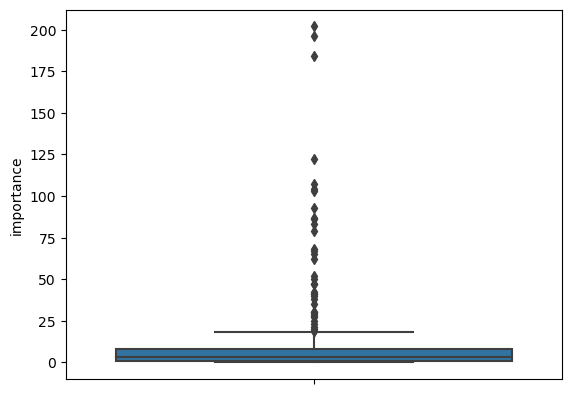

In [161]:
sns.boxplot(feature_importance_df,y='importance')

In [162]:
feature_importance_df.describe()

,importance
count,222.000000
mean,13.513514
std,30.426639
min,0.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,202.000000


In [163]:
feature_importance_df['importance'].median()

3.0

In [173]:
#filtro=feature_importance_df['importance']>feature_importance_df['importance'].median()
filtro=feature_importance_df['importance']>8

important_features=feature_importance_df.loc[filtro,'features']

In [170]:
len(important_features)

54

In [171]:
results_less_features=train_baseline(x_pre_processed.loc[:,important_features],y_train,models,RandomOverSampler())

Models: 100%|█████████████████████████████████████| 1/1 [01:02<00:00, 62.38s/it]


In [172]:
results_less_features


{'model': ['LGBM'],
 'scores': [{'accuracy': [0.6488831766672547,
    0.6446242114194031,
    0.6513247425278473,
    0.6467801280220427,
    0.6490314342836981],
   'precision': [0.0552560966922328,
    0.055287447875181556,
    0.055702981185302064,
    0.055936315033326266,
    0.05578625157202857],
   'recall': [0.5362986863332565,
    0.5439041253745103,
    0.53711387736284,
    0.5473611431205346,
    0.5418299147268956],
   'roc_auc': [0.6328248309562203,
    0.6344839316426378,
    0.6386419888317104,
    0.6366400426869143,
    0.6402139499858908]}]}

In [185]:
y_train_cat=one_hot_encoder.fit_transform(pd.DataFrame(y_train))

In [184]:
inputs=tf.keras.layers.Input(shape=len(important_features))
filters=[100,100,100]
x=inputs
for i in filters:
    x=tf.keras.layers.Dense(units=i,activation='relu')(x)
x=tf.keras.layers.Dense(units=2,activation='softmax')(x)
neural_model=tf.keras.Model(inputs=inputs,outputs=x)

In [186]:
neural_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 54)]              0         
                                                                 
 dense_10 (Dense)            (None, 100)               5500      
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 2)                 202       
                                                                 
Total params: 25902 (101.18 KB)
Trainable params: 25902 (101.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
neural_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [201]:
neural_model.fit(x=x_pre_processed.loc[:,important_features],
                y=y_train_cat,epochs=100,validation_split=0.2)

Epoch 1/100


2023-11-27 06:22:07.770812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205705008 exceeds 10% of free system memory.


14881/14881 [==============================] - 51s 3ms/step - loss: 0.1567 - accuracy: 0.9636 - val_loss: 0.1551 - val_accuracy: 0.9634
Epoch 2/100
14881/14881 [==============================] - 53s 4ms/step - loss: 0.1557 - accuracy: 0.9636 - val_loss: 0.1547 - val_accuracy: 0.9634
Epoch 3/100
14881/14881 [==============================] - 44s 3ms/step - loss: 0.1564 - accuracy: 0.9636 - val_loss: 0.1542 - val_accuracy: 0.9634
Epoch 4/100
14881/14881 [==============================] - 45s 3ms/step - loss: 0.1570 - accuracy: 0.9636 - val_loss: 0.1564 - val_accuracy: 0.9634
Epoch 5/100
 2371/14881 [===>..........................] - ETA: 44s - loss: 0.1574 - accuracy: 0.9631

KeyboardInterrupt: 

# - Redução Dimensionalidade

## - PCA


In [ ]:
pca = PCA(n_components=0.99)

In [ ]:
x_pre_processed_train, x_pre_processed_valid, y_train_ae, y_test_ae = train_test_split(x_pre_processed, 
                                                         y_train, test_size=0.33, random_state=42)

In [ ]:
pca.fit(x_pre_processed_train)

In [ ]:
x_pre_processed_train_pca=pca.transform(x_pre_processed_train)


In [ ]:
np.shape(x_pre_processed)

In [ ]:
np.shape(x_pre_processed_train_pca)

In [ ]:
results_pca_over=train_baseline(x_pre_processed_train_pca,y_train_ae,models,RandomUnderSampler())

In [ ]:
results_pca_over

## - AutoEncoder


In [ ]:
#Uso de autoencoder para reduzir dimensionalidade dos dados

In [ ]:
n_dimension=25
num_camadas=3

In [ ]:
final_n_neurons=np.shape(x_pre_processed)[-1]
final_n_neurons

In [ ]:
neurons_encoder=np.linspace(final_n_neurons,n_dimension,num_camadas).astype('int')
neurons_encoder

In [ ]:
neurons_decoder=neurons_encoder[-1::-1]

In [ ]:
neurons_decoder


In [ ]:
neurons_encoder=[80,50,30]
neurons_decoder=[50,80,94]

In [ ]:
patience     =50     #number of epochs with no improvement after which tranning will stop
lr_factor    =0.1    #factor by which the learning rate will be reduced. new_lr = lr * factor
lr_patience  =15     #number of epochs with no improvement after which learning rate will be reduced.
lr_min_delta =0.0001 #threshold for measuring the new optimum, to only focus on significant changes (min_delta).
lr_cooldown  =4     #number of epochs to wait before resuming normal operation after lr has been reduced.
lr_minimum   =0     #lower bound on the learning rate.

early_stop=EarlyStopping(monitor='val_loss',patience=patience,verbose=1,restore_best_weights=True) #early stopping

#Save the best model
#checkpoint = ModelCheckpoint(filepath_baseline,save_weights_only=False, monitor='mse', verbose=1,
#                             save_best_only=True, mode='max')

#Reduce the learning rate when the results are not improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=lr_factor, patience=lr_patience,
                                mode='auto', verbose=1, min_delta=lr_min_delta,
                                 cooldown=lr_cooldown, min_lr=lr_minimum)

callbacks_list=[early_stop,reduce_lr]


In [ ]:
stacked_encoder=tf.keras.Sequential(
#[tf.keras.layers.BatchNormalization()]+
    [tf.keras.layers.Dense(n_neuron,activation='relu') for n_neuron in neurons_encoder])


stacked_decoder=tf.keras.Sequential(
[tf.keras.layers.Dense(n_neuron,activation='relu') for n_neuron in neurons_decoder])


stacked_ae=tf.keras.Sequential([stacked_encoder,stacked_decoder])
stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

history=stacked_ae.fit(x_pre_processed_train,x_pre_processed_train,epochs=500,callbacks=callbacks_list,
                      validation_data=(x_pre_processed_valid,x_pre_processed_valid))

In [ ]:
pd.DataFrame(history.history).plot(xlabel='epoch')


# - Sampling

## - OverSampling

In [ ]:
#Aplicação de técnicas de oversampling para balancear o dataset. Através dessas técnicas serão criadas 
#novas amostras da classe minoritária


In [ ]:
#Técnicas de oversampling que serão testadas

#Random
os_random=RandomOverSampler()

#Smote
os_smote=SMOTE(sampling_strategy='auto',
                random_state=29,
                  k_neighbors=5)

#ADASYN
os_adasyn=ADASYN(sampling_strategy='auto',
                random_state=0,
                n_neighbors=5,
                n_jobs=4)

#BorderLine Smote
os_borderline_smote=BorderlineSMOTE(sampling_strategy='auto',
                                   k_neighbors=5,
                                   random_state=0,
                                    m_neighbors=10
                   )

#SVM SMOTE
os_svm_smote=SVMSMOTE(sampling_strategy='auto',
            random_state=0,
            k_neighbors=5,
            m_neighbors=10,
            svm_estimator=SVC(kernel='linear')
            )

oversampling_techniques={'Random' :os_random
                         ,'Smote'  :os_smote
                         ,'Adasyn':os_adasyn
                         ,'Borderline Smote':os_borderline_smote
                          #'SVM_Smote':os_svm_smote
                        }

results_over_sampling={}

In [ ]:
'''
for key in tqdm(oversampling_techniques.keys(),desc='Technique'):
    results_over_sampling[key]=train_model(LGBMClassifier(),x_pre_processed,y_train,scoring,
                                           sampler=oversampling_techniques[key])
'''

In [ ]:
#Salvar resultados
'''
with open('results_over_sampling.pkl', 'wb') as fp:
    pickle.dump(results_over_sampling, fp)
    print('dictionary saved successfully to file')
'''

In [ ]:
# Carregar resultados obtidos
'''
with open('results_over_sampling.pkl', 'rb') as fp:
    results_over_sampling = pickle.load(fp)
'''

In [ ]:
#results_over_sampling

In [ ]:
#O balanceamento do dataset com o uso de técnicas de oversampling não produziu melhioria nos
#resultados

## - UnderSampling

In [ ]:
#Balanceamento do dataset com o uso de diferentes técnicas de undersampling

In [ ]:
#Técnicas de undeersampling que serão testadas

#Random
us_random=RandomUnderSampler()

#Condensed Nearest Neighbours
us_cnn=CondensedNearestNeighbour(sampling_strategy='auto',
                random_state=29,
                n_neighbors =1)

#Tomek Links
us_tomek=TomekLinks(sampling_strategy='auto')

#One-Sided Selection
us_onesideselection=OneSidedSelection(sampling_strategy='auto',
                                   n_neighbors=1,
                                   random_state=0,
                   )

#Edited Nearest NEighbours
us_enn=EditedNearestNeighbours(
            sampling_strategy='auto',
            n_neighbors=3,
            kind_sel='all')

#Repeated Edited Nearest NEighbours
us_renn=RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='auto',
        max_iter=100)

#All KNN
us_allknn=AllKNN(sampling_strategy='auto',
                n_neighbors=3,
                kind_sel='all')

#Neighbourhood Cleaning Rule (NCR)
us_ncr=NeighbourhoodCleaningRule(
                sampling_strategy='auto',
                n_neighbors=3,
                kind_sel='all',
                threshold_cleaning=0.5)

undersampling_techniques={'Random' :us_random
                         #,'Condensed Nearest Neighbours':us_cnn
                         ,'Tomek Links':us_tomek
                         ,'One-Sided Selection':us_onesideselection
                         #,'Edited Nearest NEighbours':us_enn
                         ,'Repeated Edited Nearest NEighbours':us_renn
                         ,'All KNN':us_allknn
                         ,'Neighbourhood Cleaning Rule':us_ncr
                        }

results_under_sampling={}

In [ ]:
#for key in tqdm(undersampling_techniques.keys(),desc=key):
#    results_under_sampling[key]=train_model(LGBMClassifier(),x_pre_processed,y_train,scoring,
#                                           sampler=undersampling_techniques[key])

In [ ]:
#results_under_sampling

In [ ]:
#The application of different undersampling techniques did not improve the results.

## - Variational Autoencoders

In [ ]:
#Variational autoencoder será outra técnica que será empregada para gerar novas amostras para a classe minoritária

In [ ]:
class Sampling(tf.keras.layers.Layer):
    #This function will sample from a normal distribution (mean,var).
    #It returns s sample that has the same shape of log_var
    def call(self,inputs):
        mean,log_var=inputs
        return tf.random.normal(tf.shape(log_var))*tf.exp(log_var/2)+mean

In [ ]:
#Encoder
codings_size=10

n_neurons=np.arange(45,codings_size,-10)
input_shape=[np.shape(x_pre_processed)[1]]

inputs=tf.keras.layers.Input(shape=input_shape)
z=inputs
for i in n_neurons:
    z=tf.keras.layers.Dense(i,activation='relu')(z)
codings_mean=tf.keras.layers.Dense(codings_size)(z) #mean
codings_log_var=tf.keras.layers.Dense(codings_size)(z) #log_var
codings=Sampling()([codings_mean,codings_log_var])
variational_encoder=tf.keras.Model(inputs=[inputs],outputs=[codings_mean,codings_log_var,codings])

In [ ]:
variational_encoder.summary()

In [ ]:
#Decoder

decoder_inputs=tf.keras.layers.Input(shape=[codings_size])
z=decoder_inputs
for i in n_neurons[-1::-1]:
    z=tf.keras.layers.Dense(i,activation='relu')(z)
outputs=tf.keras.layers.Dense(input_shape[0])(z)
variational_decoder=tf.keras.Model(inputs=[decoder_inputs],outputs=[outputs])

In [ ]:
#Variational auto encoder model

_,_,codings=variational_encoder(inputs)
reconstructions=variational_decoder(codings)
variational_ae=tf.keras.Model(inputs=[inputs],outputs=[reconstructions])

In [ ]:
#Latent loss and reconstruction loss

latent_loss=-0.5*tf.reduce_sum( 1+codings_log_var-tf.exp(codings_log_var)-tf.square(codings_mean),axis=-1)
# tf.reduce_mean calculates the mean loss over all the instances in the batch
#The division by input_shape[0] is to garantee that the result has the appropriate 
#scale compared to the reconstruction loss
variational_ae.add_loss(tf.reduce_mean(latent_loss)/input_shape[0])

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
#Compiling the model

variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])


In [ ]:
#Separating samples from different classes.
#Getting all samples from the minority 
indexes_class_1=np.where(y_train==1)[0]

x_class_1=x_pre_processed.iloc[indexes_class_1]


In [ ]:
x_train_class_1,x_test_class_1=train_test_split(x_class_1,test_size=0.33,random_state=42)

In [ ]:
#Training the autoencoder using the samples from the minority class.
history=variational_ae.fit(x_train_class_1,x_train_class_1,epochs=500,batch_size=128,validation_data=[x_test_class_1,
                                                                                                    x_test_class_1])

In [ ]:
pd.DataFrame(history.history).plot(xlabel='epoch')

In [ ]:
n_splits=5
scores={'accuracy':[],'precision':[],'recall':[],'roc_auc':[]}
model_classifier=LGBMClassifier()
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
for train_index, test_index in skf.split(x_pre_processed, y_train):
    x_train,x_test=x_pre_processed.iloc[train_index],x_pre_processed.iloc[test_index]
    y_train_kfold,y_test=y_train.iloc[train_index],y_train.iloc[test_index]
    #A função generating_new_samples vai ser usada para criar novas samples da classe minoritária
    x_train,y_train_kfold=generating_new_samples(x_train,y_train_kfold,codings_size=codings_size,
                                                 auto_encoder=variational_ae,decoder=variational_decoder)
    model_classifier.fit(x_train,y_train_kfold)
    y_pred_proba=model_classifier.predict_proba(x_test)
    y_pred=np.argmax(y_pred_proba,axis=1)
    scores['accuracy']=scores['accuracy']  +[accuracy_score(y_test,y_pred)]
    scores['precision']=scores['precision']+[precision_score(y_test,y_pred)]
    scores['recall']=scores['recall']      +[recall_score(y_test,y_pred)]
    scores['roc_auc']=scores['roc_auc']    +[roc_auc_score(y_test,y_pred_proba[:,1])]

In [ ]:
scores


In [ ]:
#The creation of new samples using an autoencoder did not improve the results.